# NBaIoT SOM HYPEROPT CLASSIFY

## Device 1

- Training on device 1 (using both Mirai and Gafgyt).
- Testing on device 1 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 1

In [8]:
train_index

1

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((49548, 115), (49548,)),
 ((316650, 115), (316650,)),
 ((652100, 115), (652100,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((34683, 115), (14865, 115), (34683,), (14865,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221655, 115), (94995, 115), (221655,), (94995,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((456470, 115), (195630, 115), (456470,), (195630,))

## Set ratio

In [16]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [17]:
ratio_1 = int(1.0*benign_size)

In [18]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [19]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [20]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [21]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [22]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [23]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get train data of benign and Mirai by ratio

In [24]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [25]:
print(data_mirai_1.shape, target_mirai_1.shape)

(10000, 115) (10000,)


In [26]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [27]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [28]:
benign_test_size = data_benign_test.shape[0]

In [29]:
benign_test_size

14865

### Gafgyt

In [30]:
data_gafgyt_test.shape

(94995, 115)

In [31]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [32]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(29730, 115) (29730,)


In [33]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((14865, 115), (14865, 115), (14865,), (14865,))

## Mirai

In [34]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [35]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(29730, 115) (29730,)


In [36]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [37]:
print(X_test_mirai.shape, y_test_mirai.shape)

(29730, 115) (29730,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [38]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.0089774131774902


### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00501782 0.01319303 0.01063272 ... 1.19915721 1.19915722 1.19915721]
Visualize quantization error


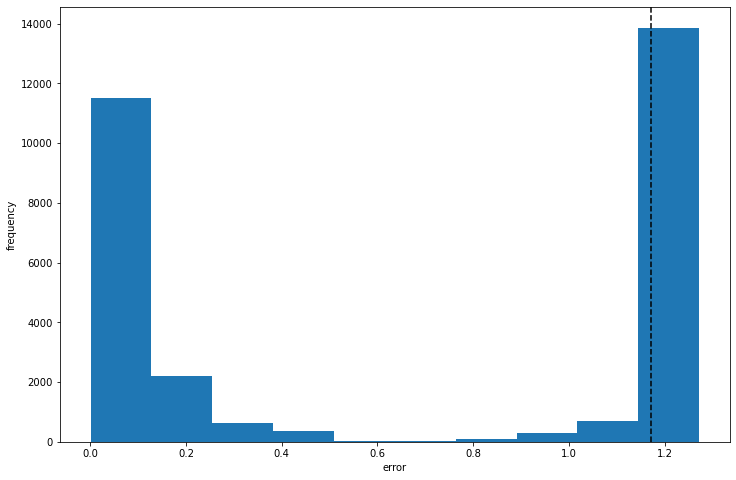

Outliers visualization


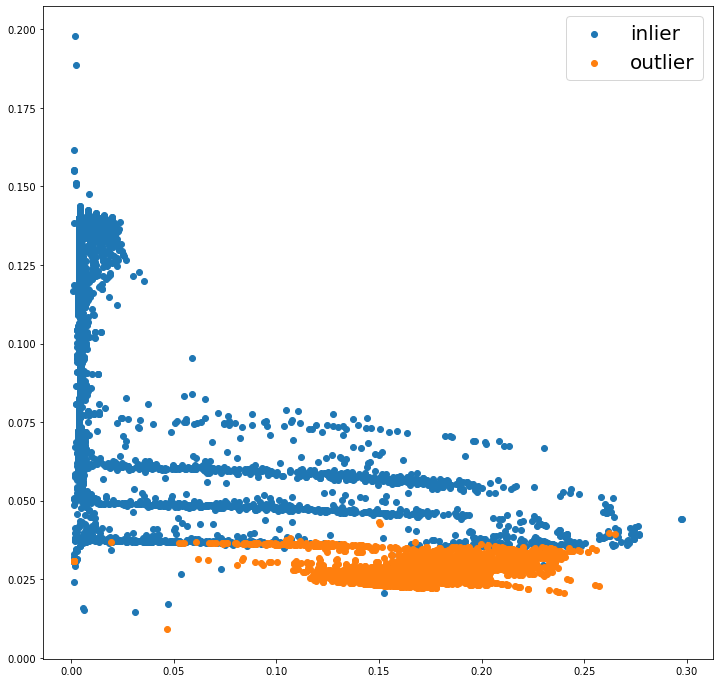

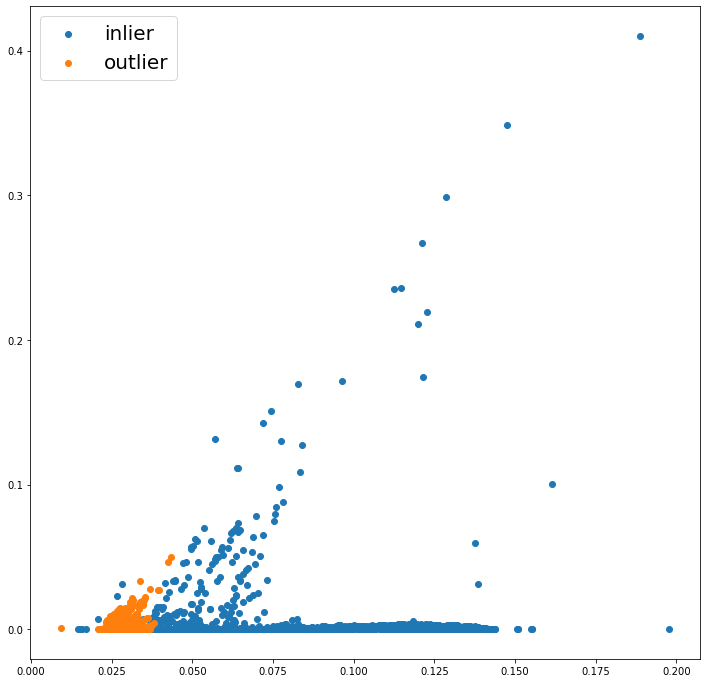

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.996     0.997     14865
           2      0.996     0.997     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



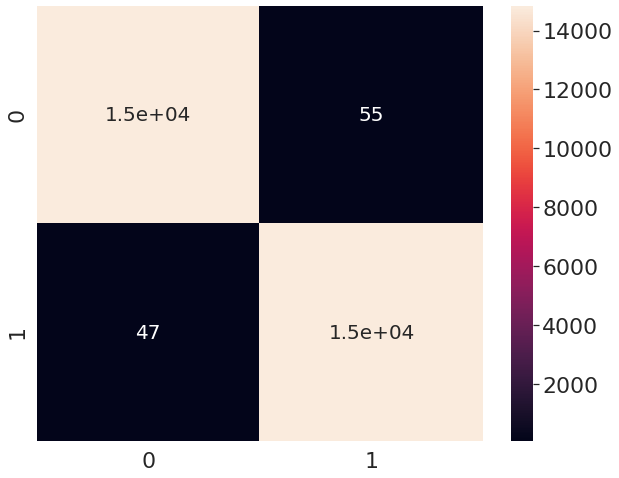

AUC score:  0.99656912209889


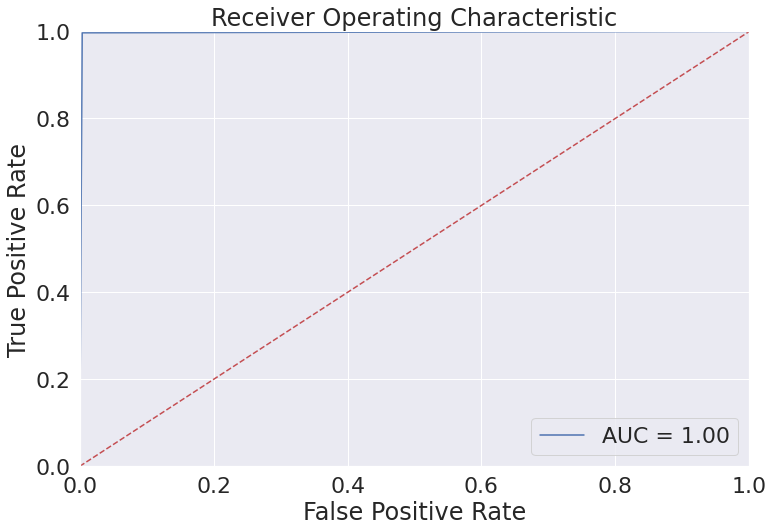

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00501782 0.01319303 0.01063272 ... 0.75081867 0.85516999 1.25228947]
Visualize quantization error


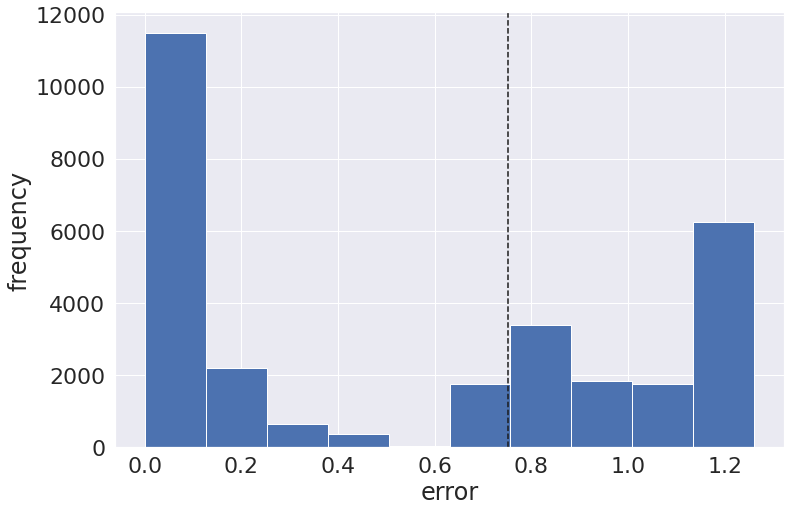

Outliers visualization


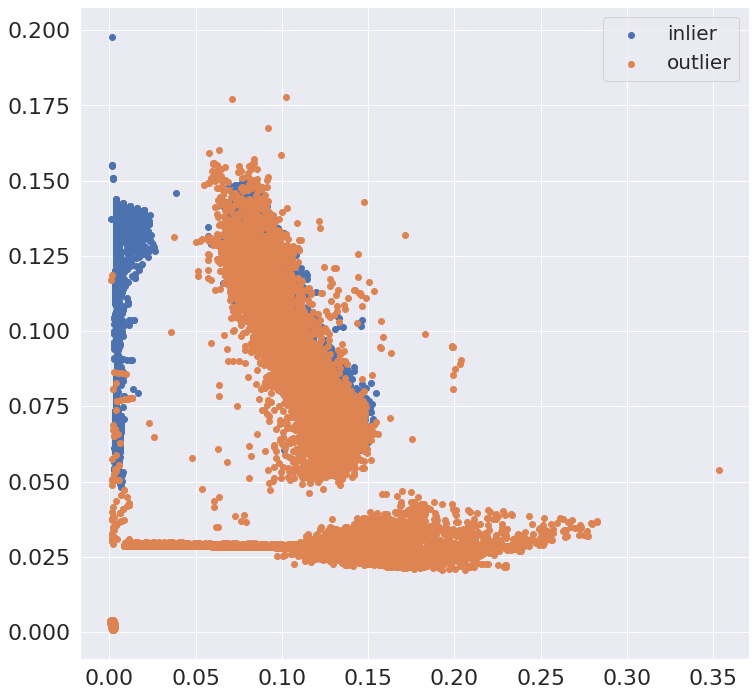

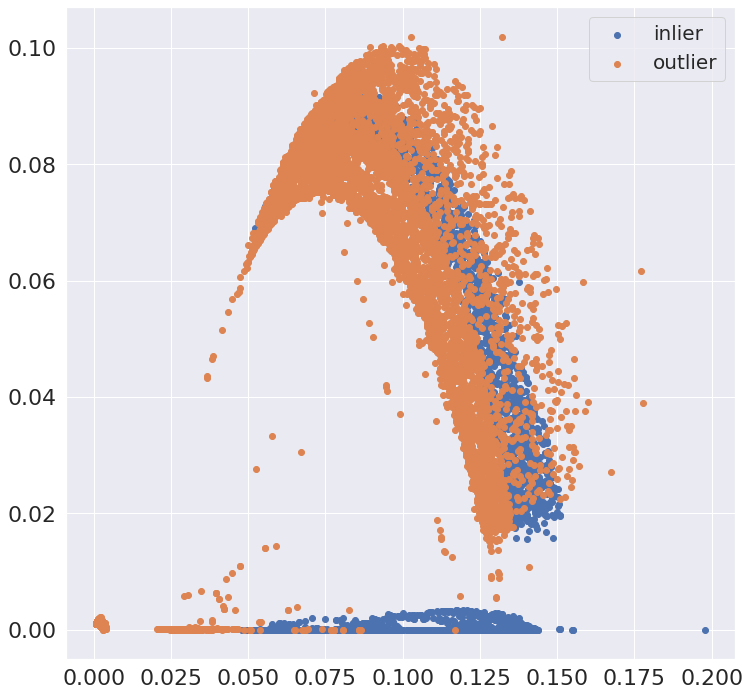

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.646     0.996     0.784     14865
           2      0.992     0.455     0.624     14865

    accuracy                          0.726     29730
   macro avg      0.819     0.726     0.704     29730
weighted avg      0.819     0.726     0.704     29730



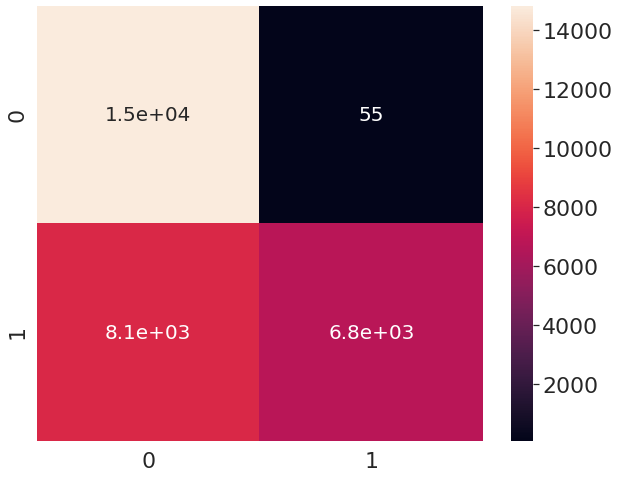

AUC score:  0.725697948200471


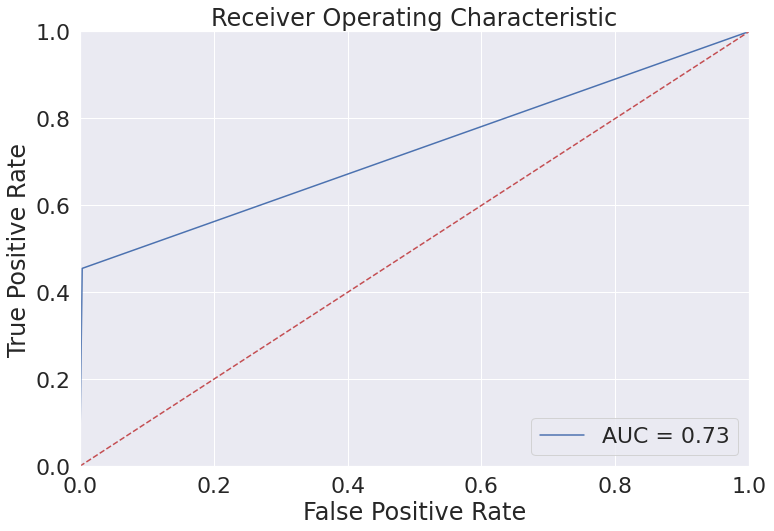

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.848121166229248


### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00581032 0.0025919  0.00775746 ... 0.64757751 0.64757752 0.64757751]
Visualize quantization error


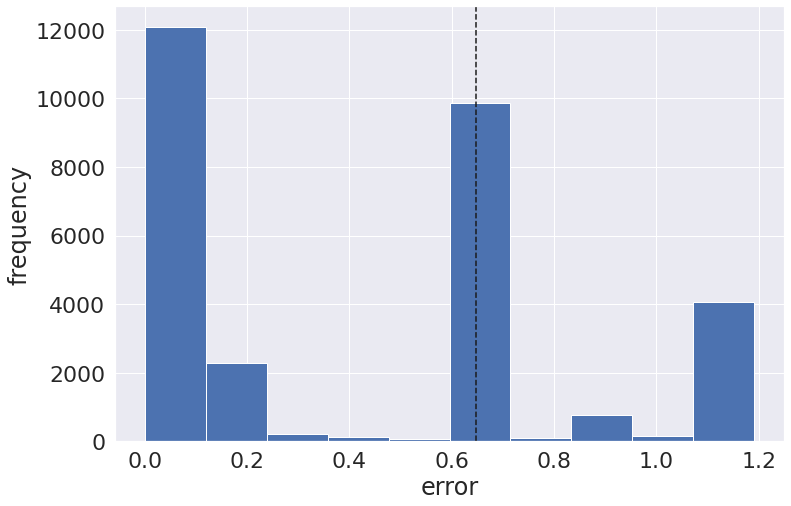

Outliers visualization


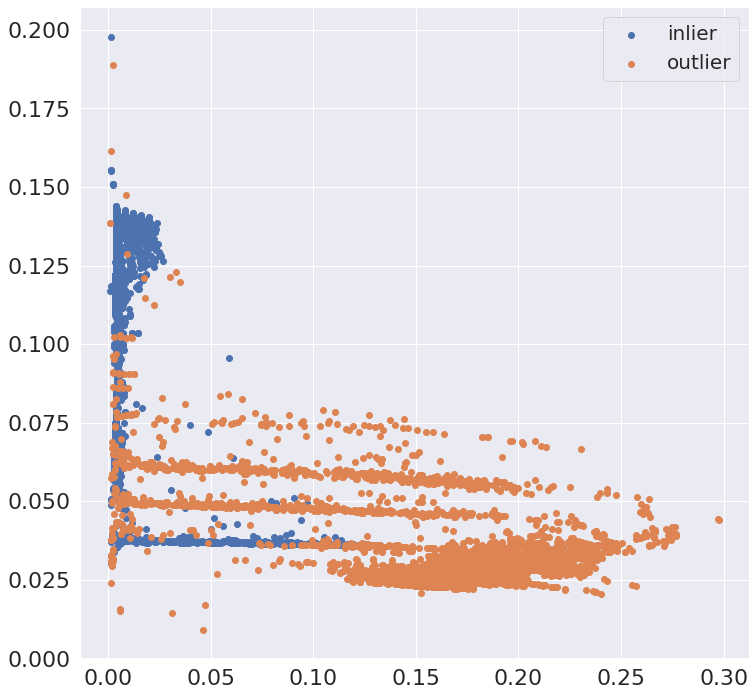

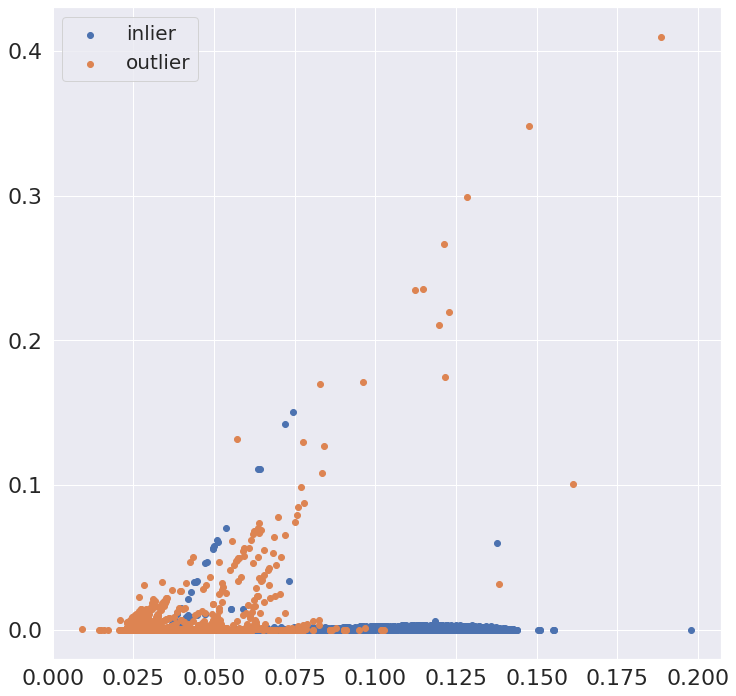

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.996     0.997     14865
           2      0.996     0.997     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



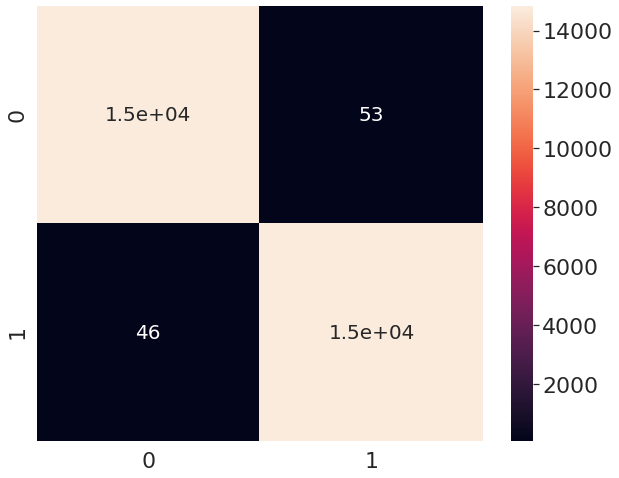

AUC score:  0.996670030272452


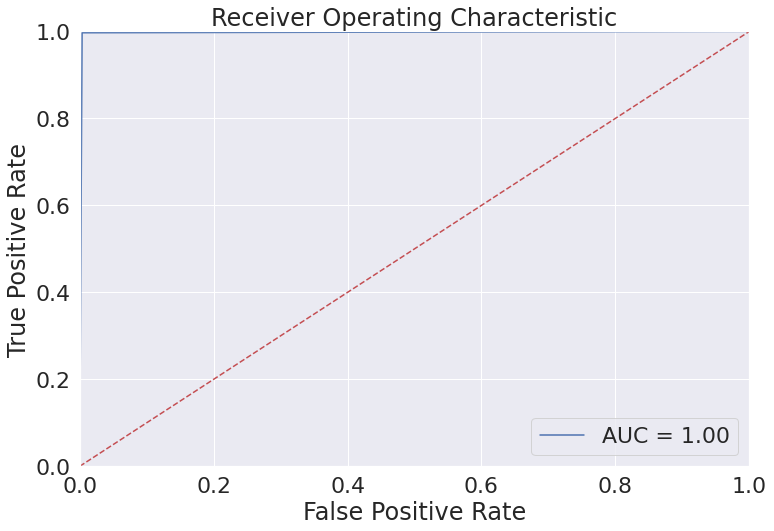

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00581032 0.0025919  0.00775746 ... 0.73285452 0.82853037 0.8940666 ]
Visualize quantization error


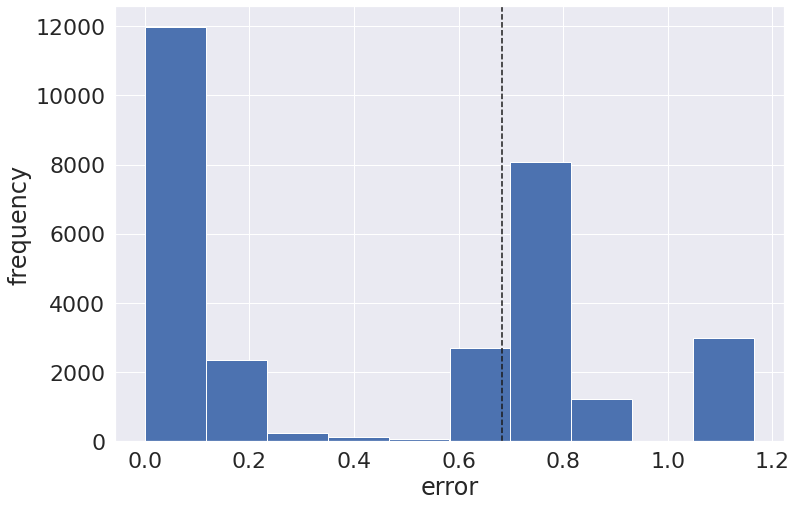

Outliers visualization


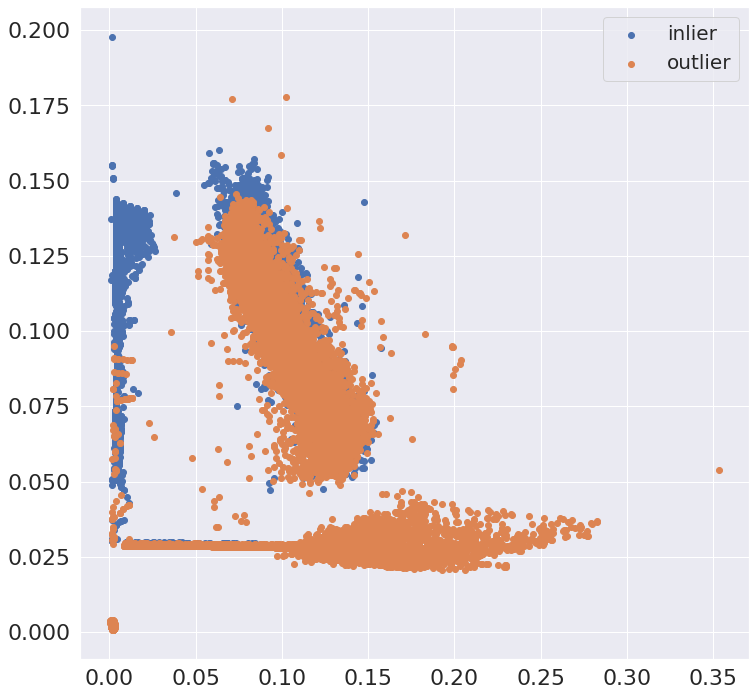

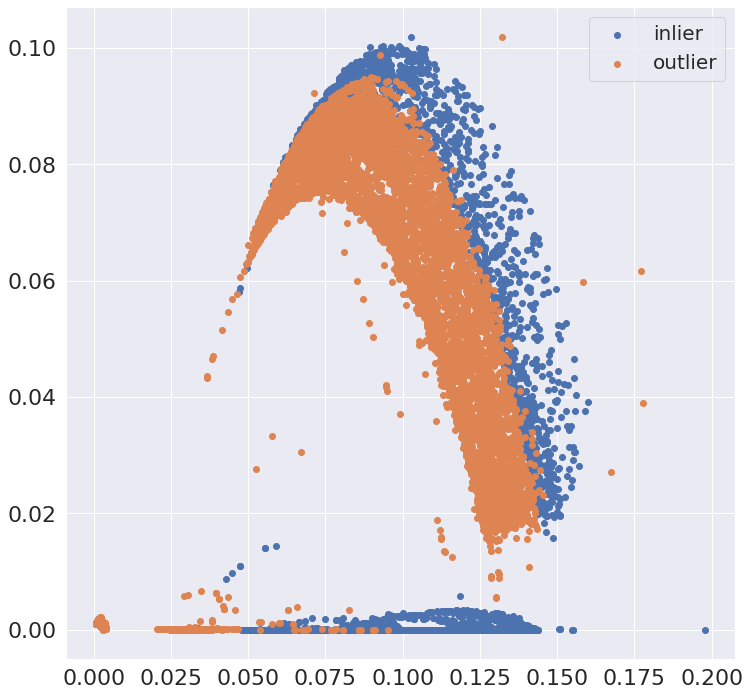

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.701     0.996     0.823     14865
           2      0.994     0.575     0.728     14865

    accuracy                          0.786     29730
   macro avg      0.847     0.786     0.776     29730
weighted avg      0.847     0.786     0.776     29730



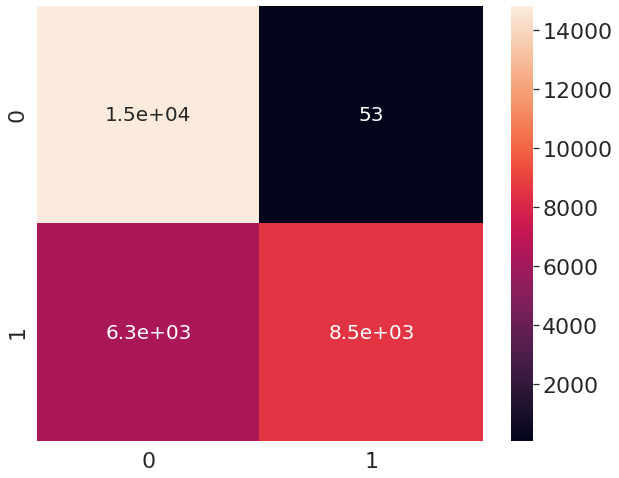

AUC score:  0.7856710393541877


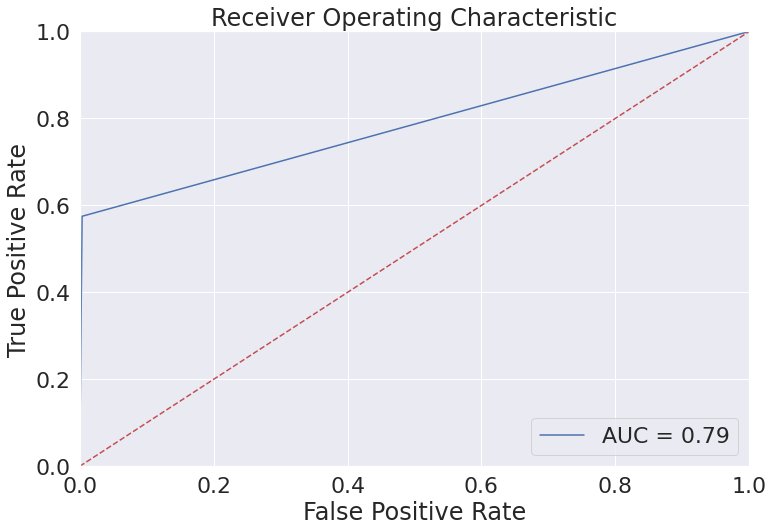

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [44]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 7.8170998096466064


### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00289161 0.00556496 0.00952683 ... 0.48754104 0.48754105 0.48754104]
Visualize quantization error


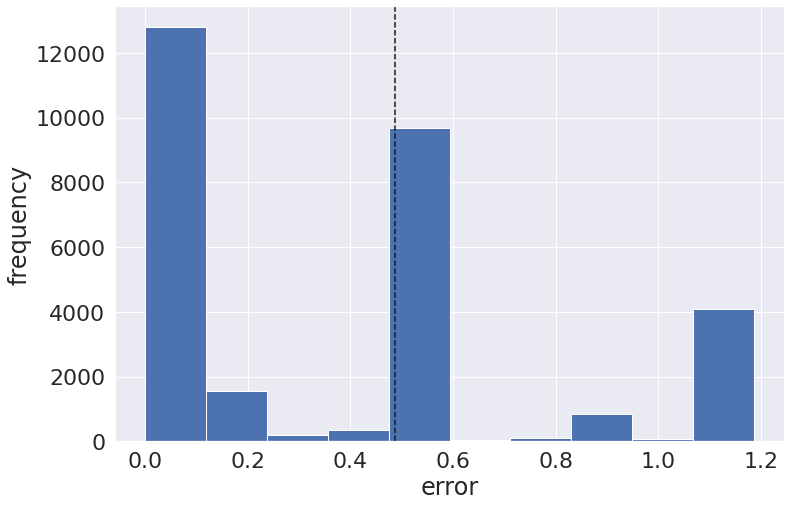

Outliers visualization


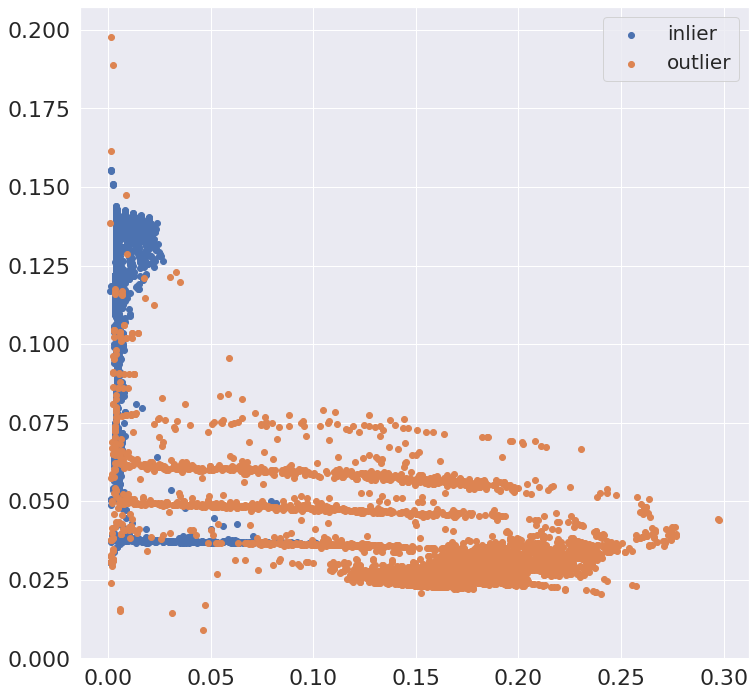

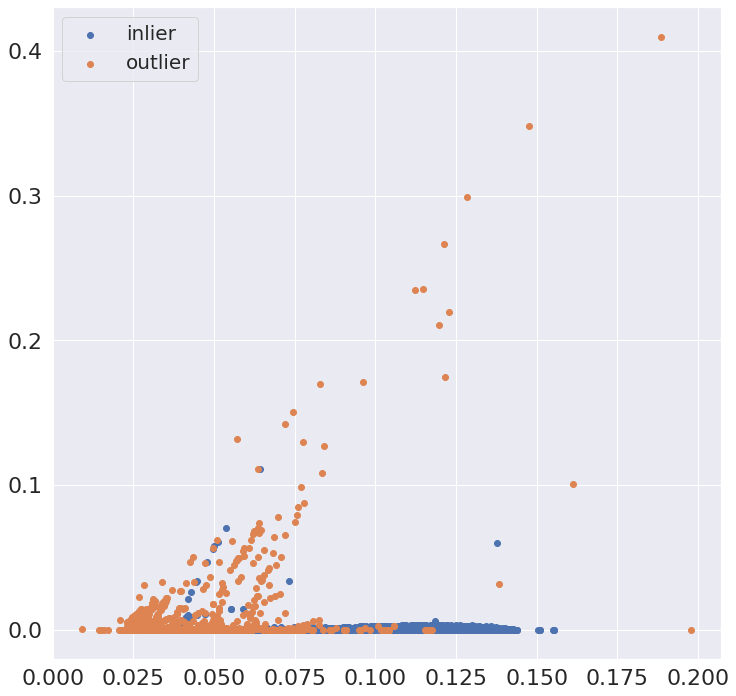

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.997     14865
           2      0.997     0.998     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



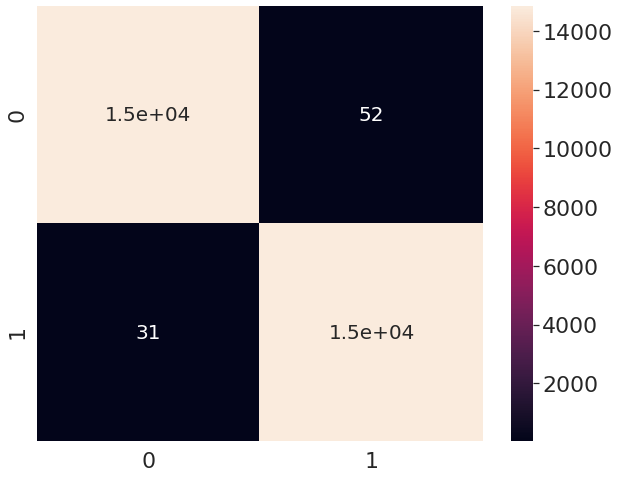

AUC score:  0.9972082071981163


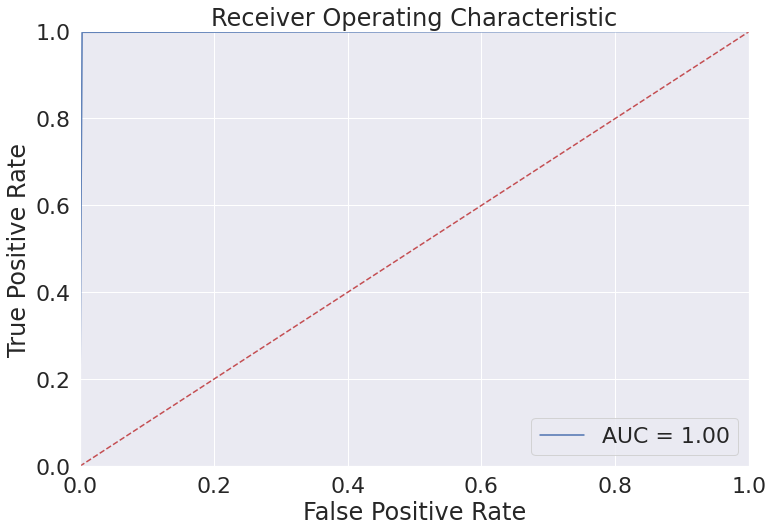

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00289161 0.00556496 0.00952683 ... 0.75105751 0.85455663 0.84099184]
Visualize quantization error


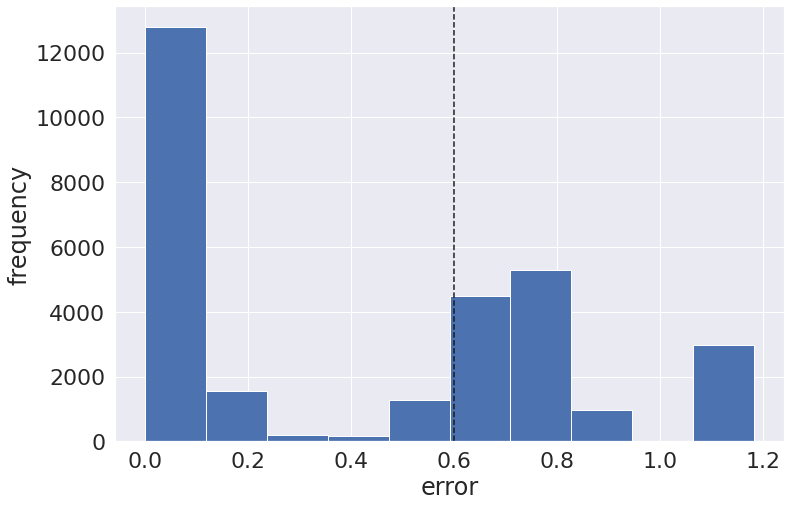

Outliers visualization


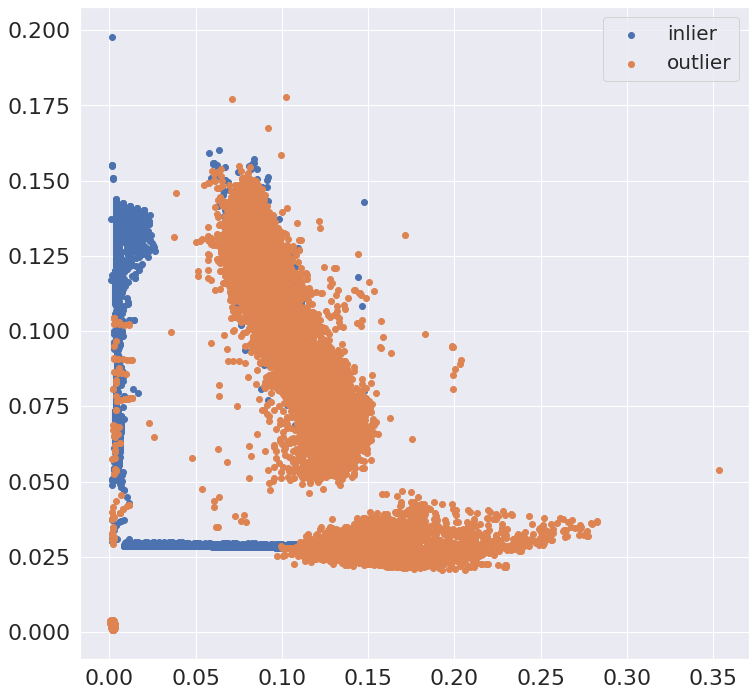

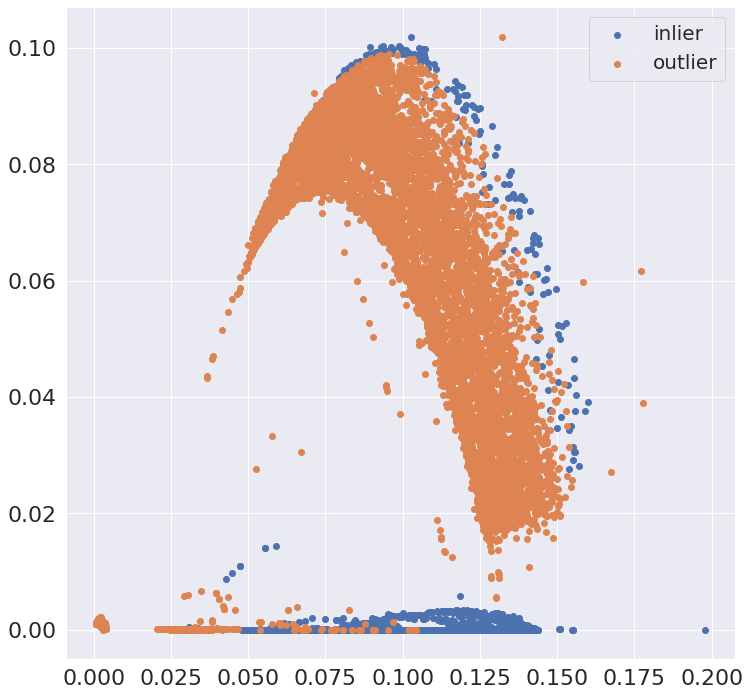

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.729     0.997     0.842     14865
           2      0.994     0.629     0.771     14865

    accuracy                          0.813     29730
   macro avg      0.862     0.813     0.806     29730
weighted avg      0.862     0.813     0.806     29730



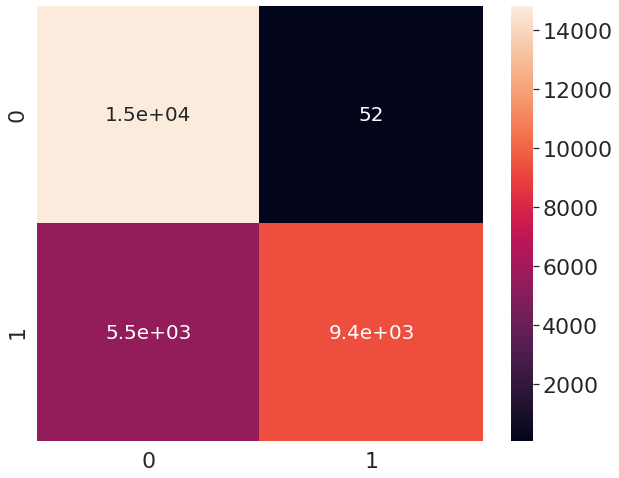

AUC score:  0.8128826101580895


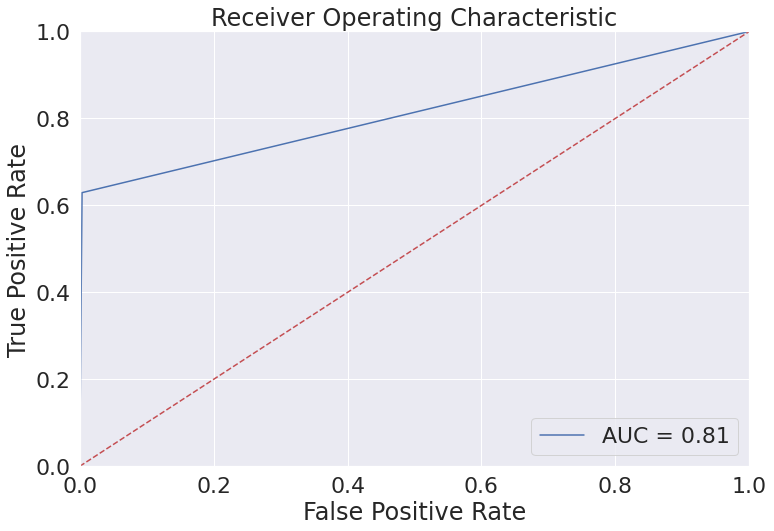

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [47]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 16.382565021514893


### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00266088 0.00454812 0.00946236 ... 0.38215021 0.38215023 0.38215021]
Visualize quantization error


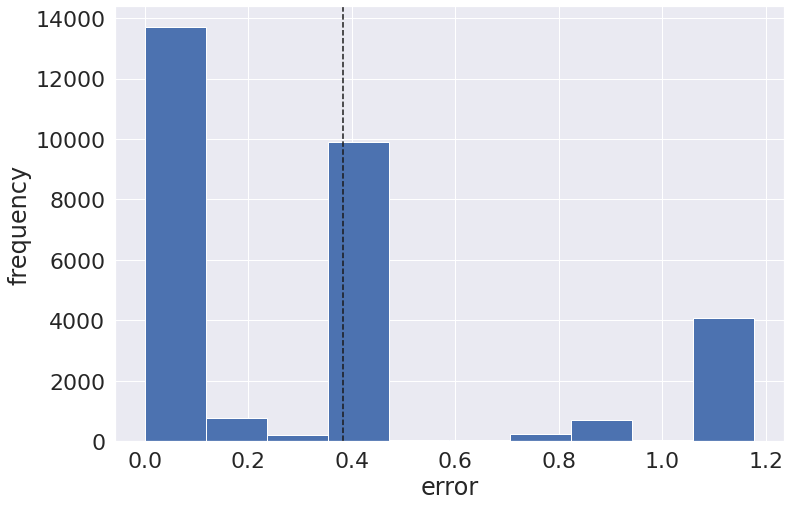

Outliers visualization


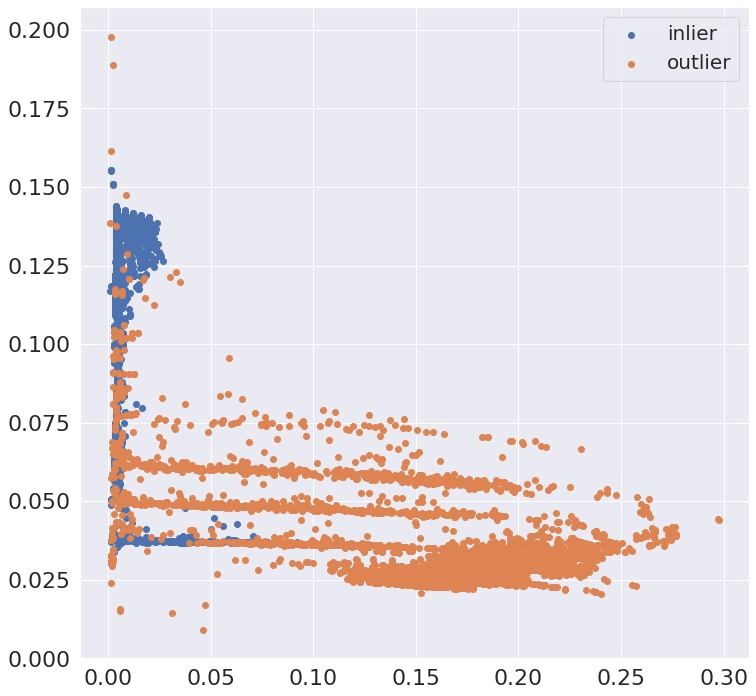

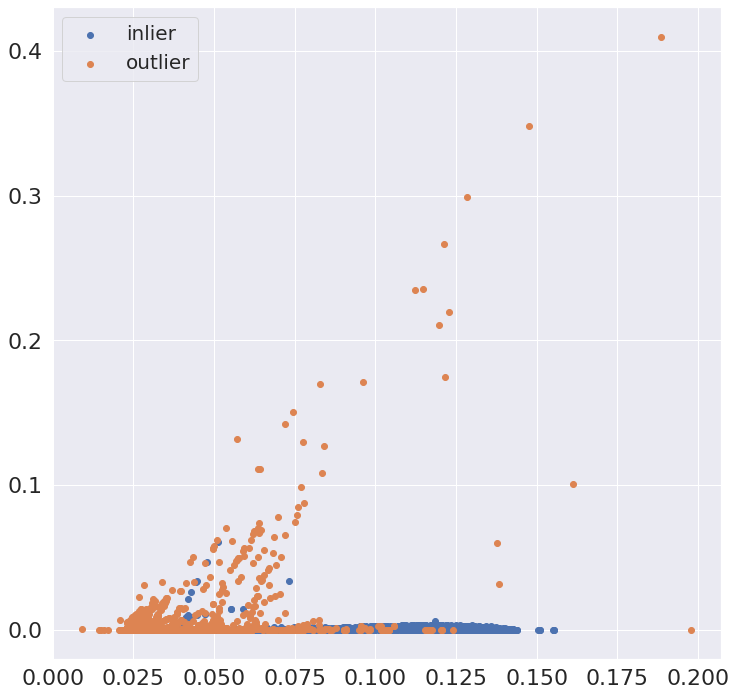

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.997     14865
           2      0.997     0.998     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



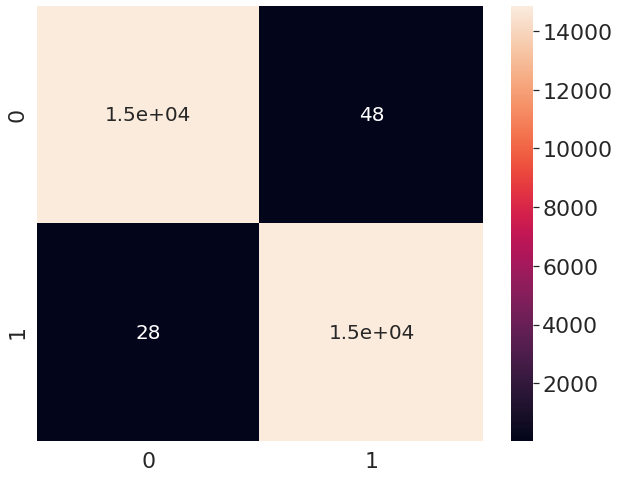

AUC score:  0.9974436596030946


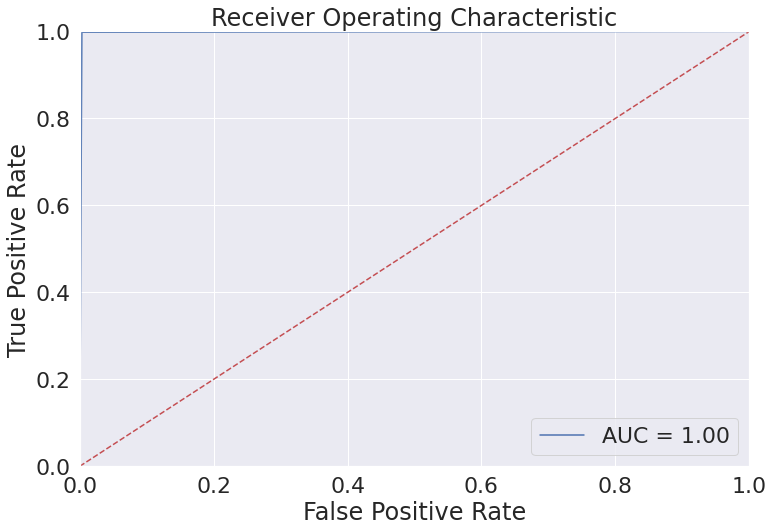

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00266088 0.00454812 0.00946236 ... 0.7494014  0.84181486 0.81275362]
Visualize quantization error


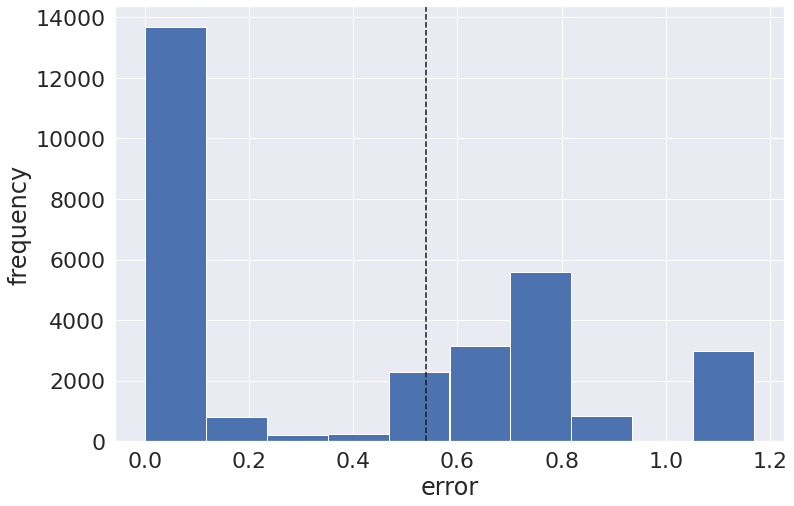

Outliers visualization


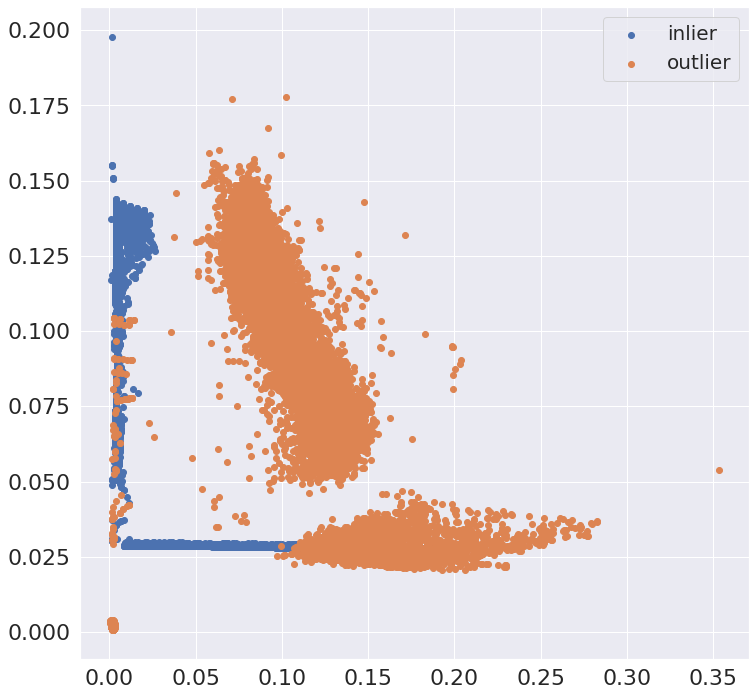

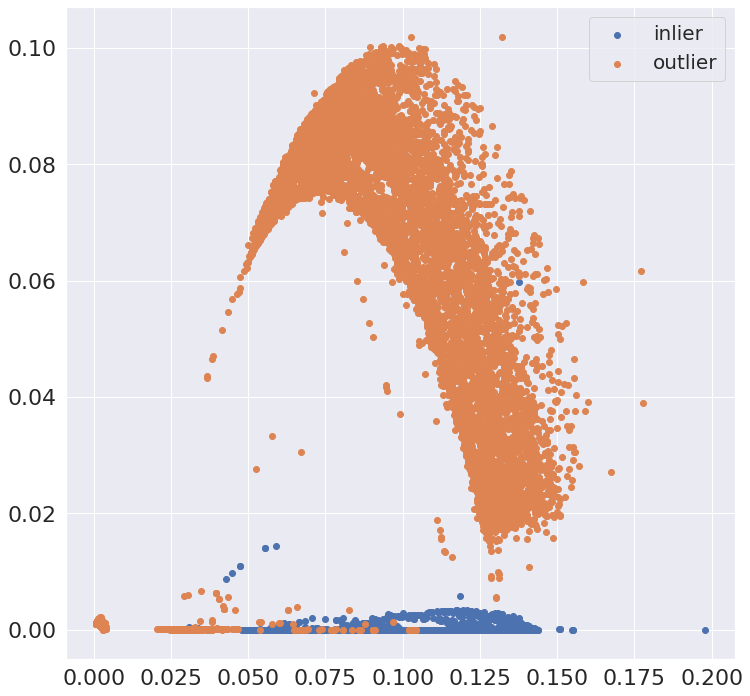

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.606     0.997     0.754     14865
           2      0.991     0.353     0.520     14865

    accuracy                          0.675     29730
   macro avg      0.799     0.675     0.637     29730
weighted avg      0.799     0.675     0.637     29730



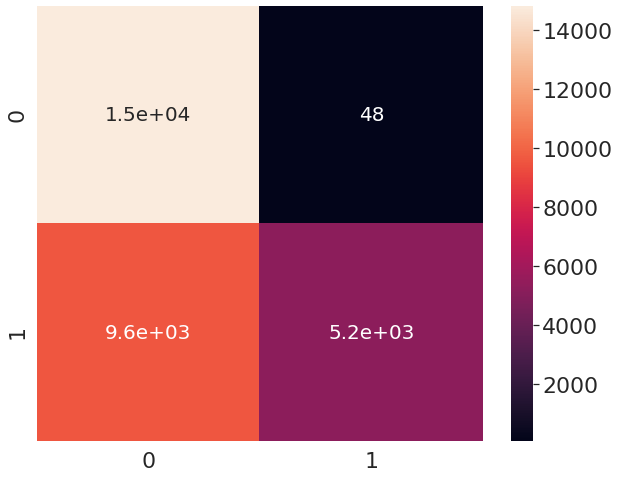

AUC score:  0.6748065926673394


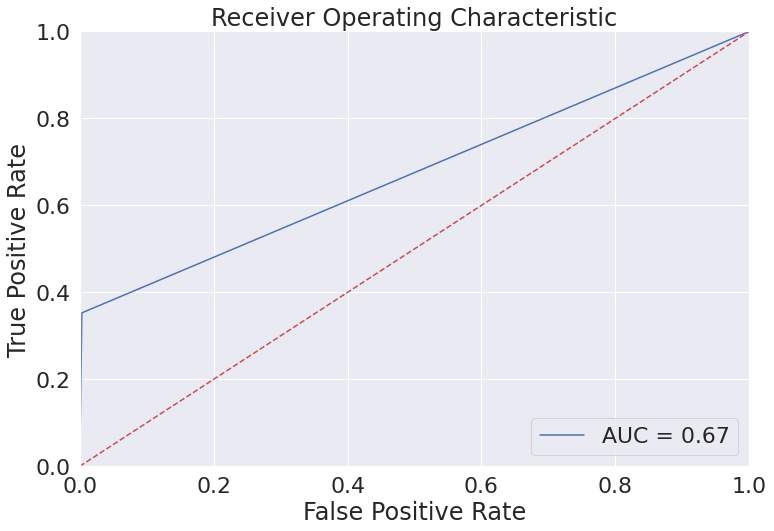

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [50]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 92.96781516075134


### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00191564 0.0023181  0.00766308 ... 0.24714181 0.24714182 0.2471418 ]
Visualize quantization error


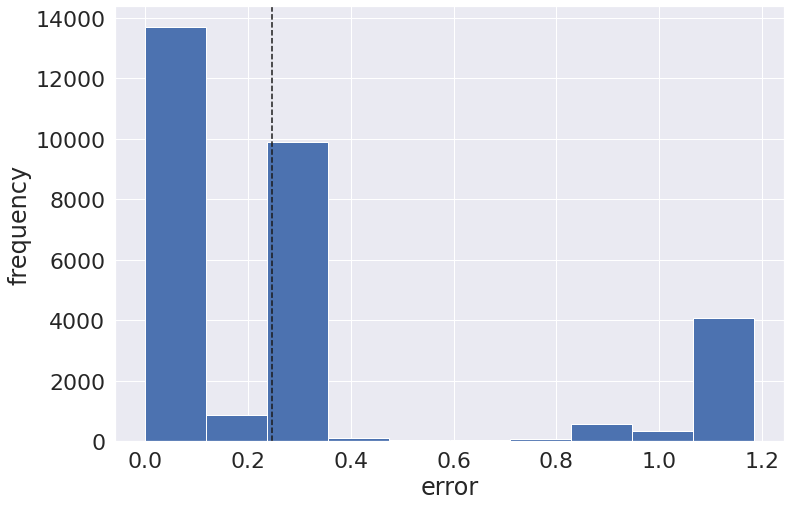

Outliers visualization


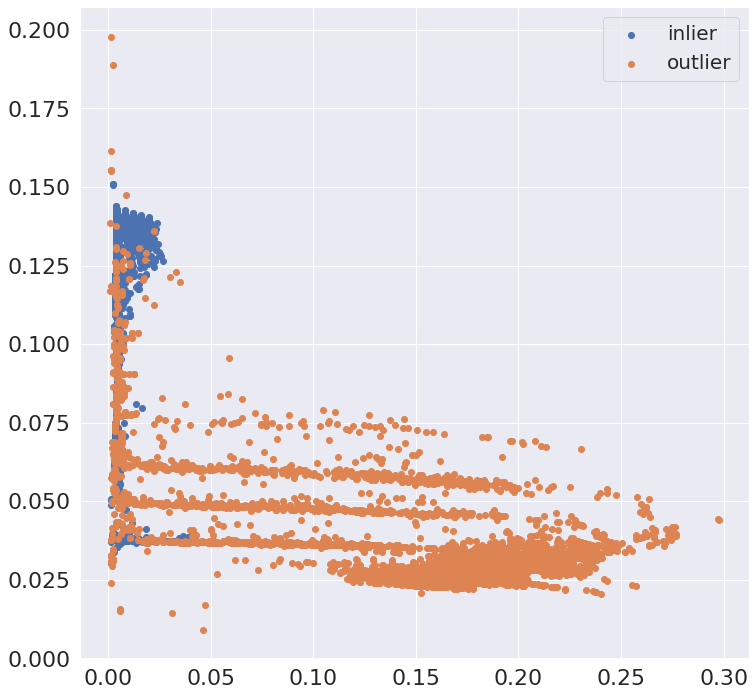

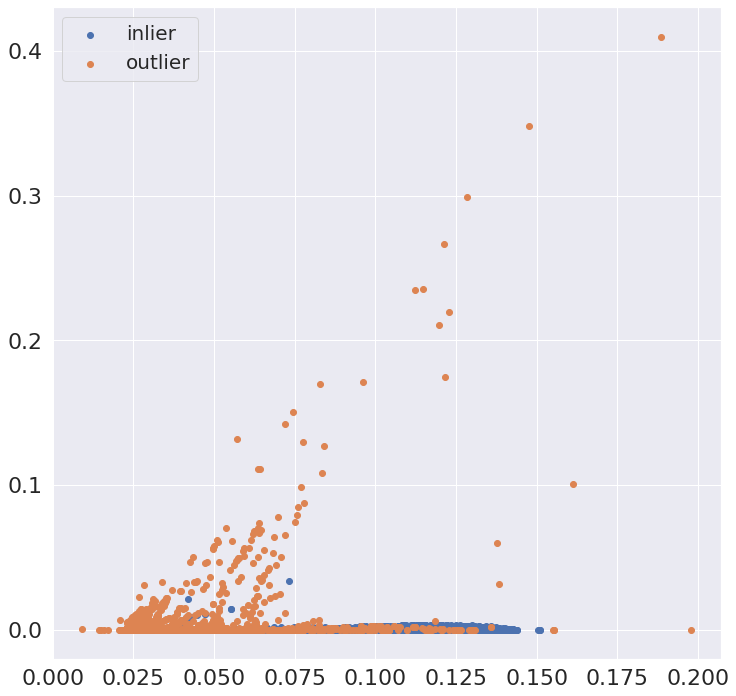

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     14865
           2      0.997     0.998     0.998     14865

    accuracy                          0.998     29730
   macro avg      0.998     0.998     0.998     29730
weighted avg      0.998     0.998     0.998     29730



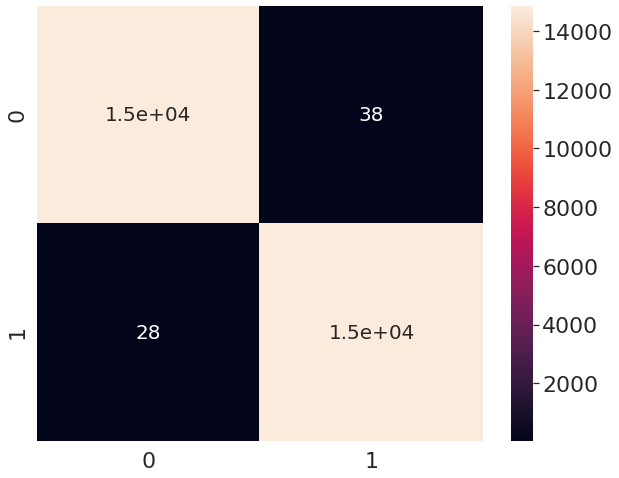

AUC score:  0.9977800201816348


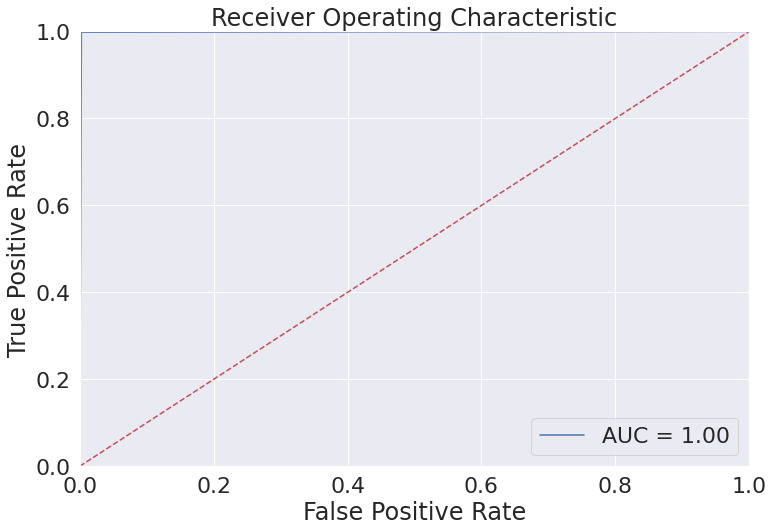

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00191564 0.0023181  0.00766308 ... 0.73218942 0.82942467 0.80692254]
Visualize quantization error


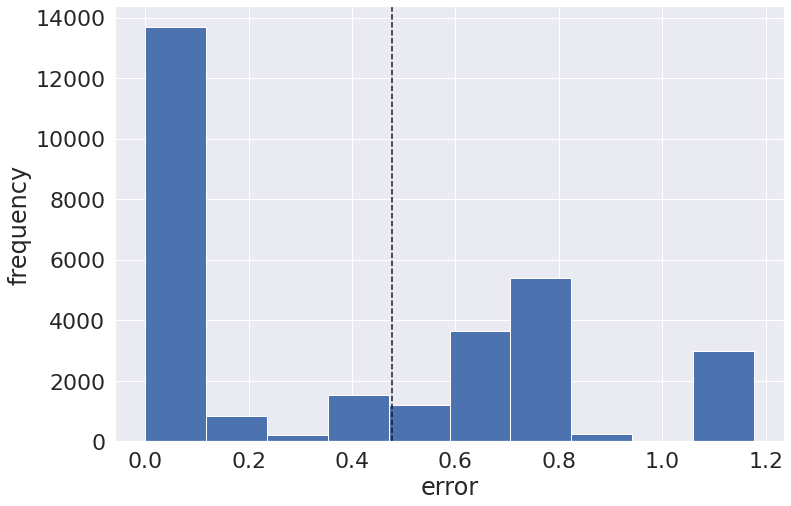

Outliers visualization


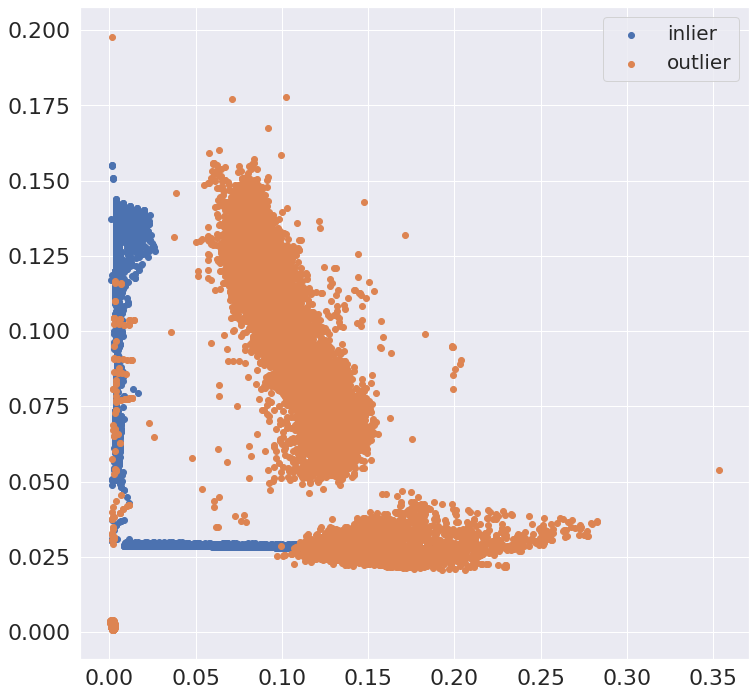

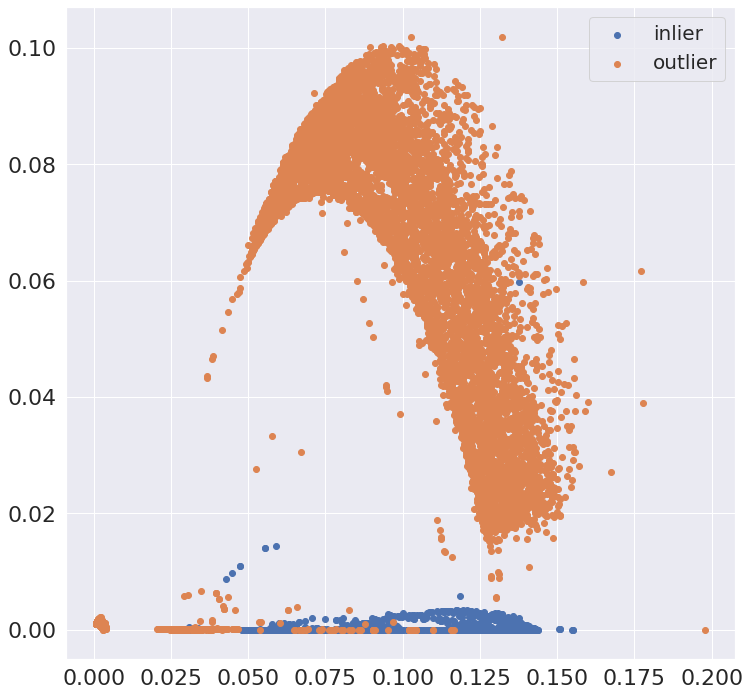

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.597     0.997     0.747     14865
           2      0.992     0.326     0.490     14865

    accuracy                          0.662     29730
   macro avg      0.794     0.662     0.619     29730
weighted avg      0.794     0.662     0.619     29730



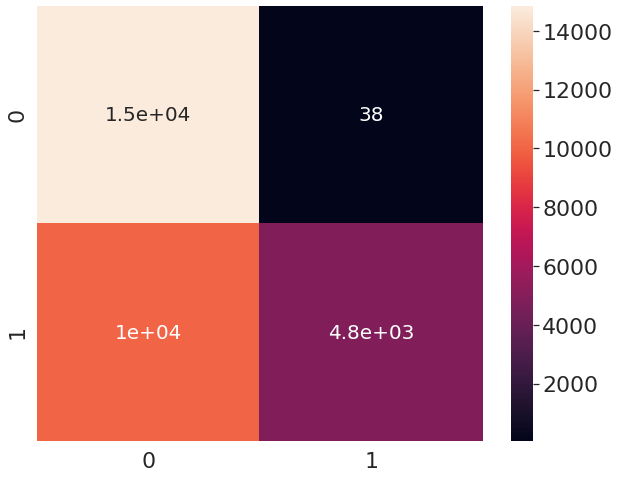

AUC score:  0.6615539858728556


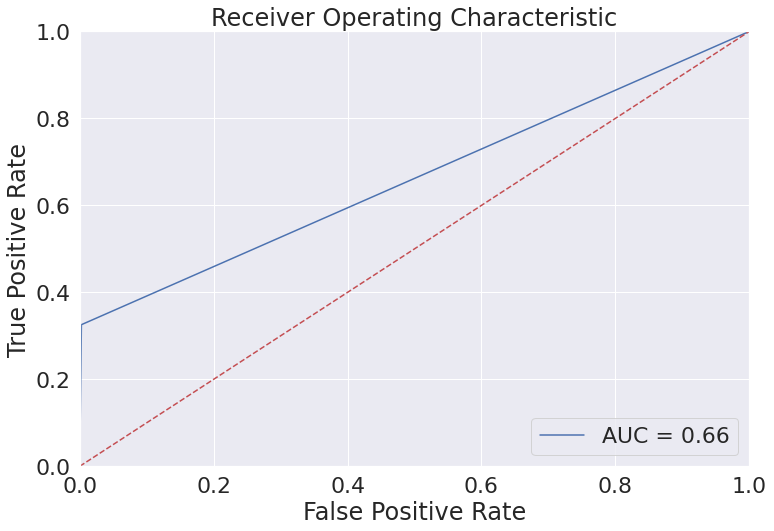

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [53]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 68.9631016254425


### Test Gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00627955 0.01675832 0.01509884 ... 1.2074598  1.20745981 1.2074598 ]
Visualize quantization error


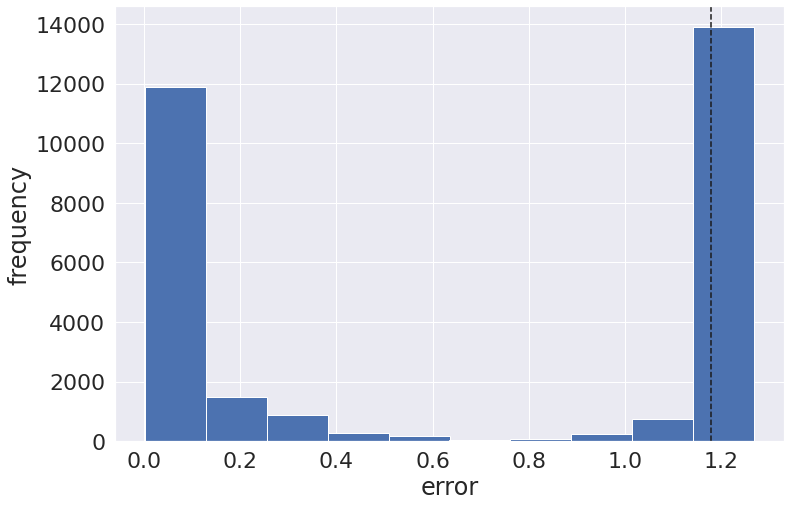

Outliers visualization


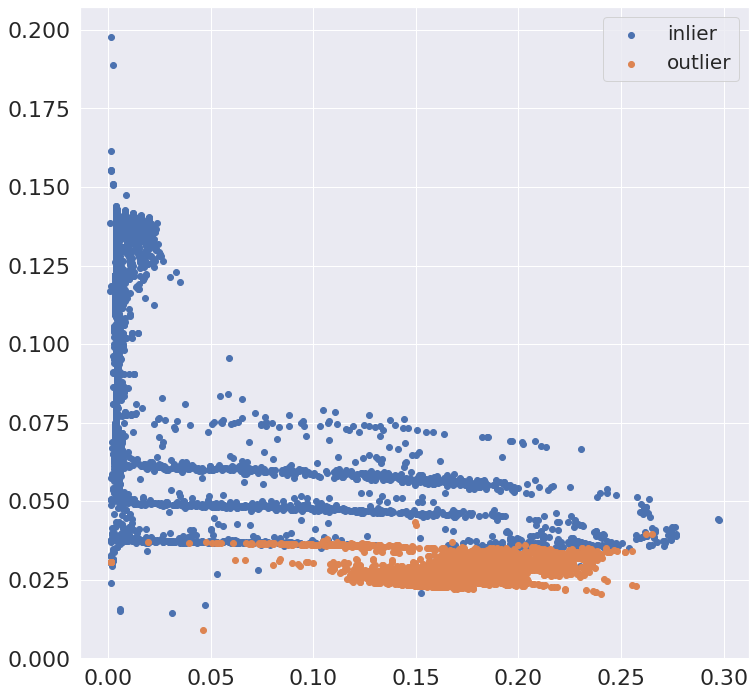

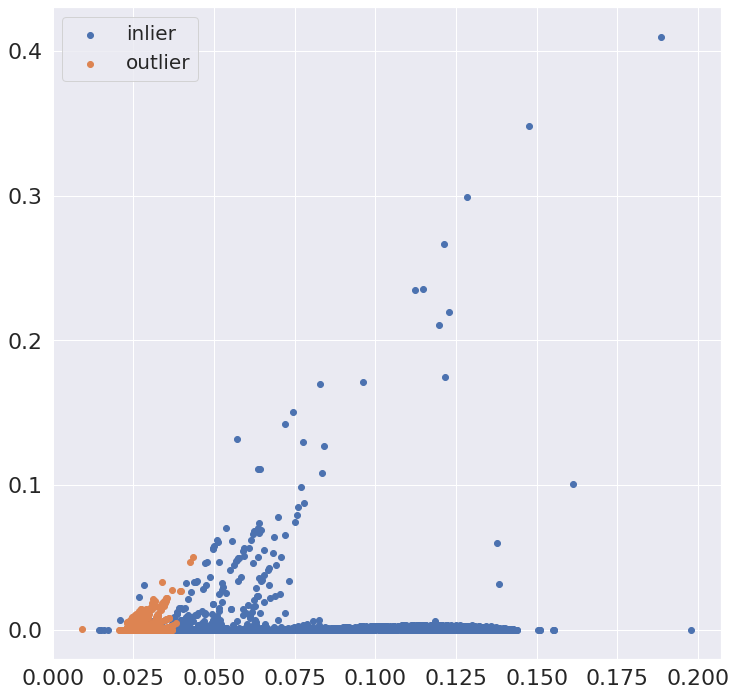

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.992     0.994     14865
           2      0.992     0.996     0.994     14865

    accuracy                          0.994     29730
   macro avg      0.994     0.994     0.994     29730
weighted avg      0.994     0.994     0.994     29730



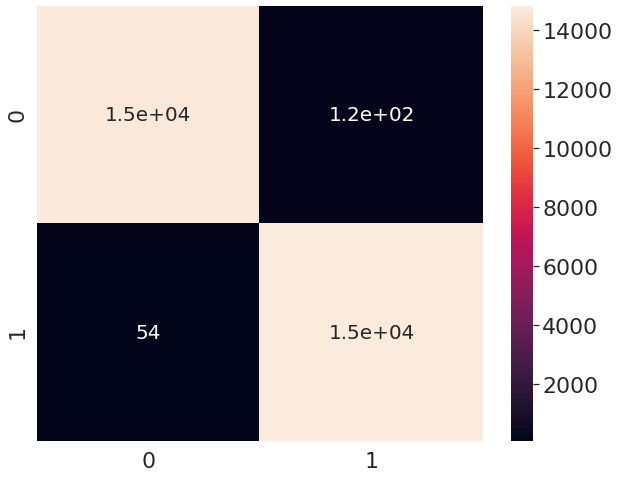

AUC score:  0.9940800538176926


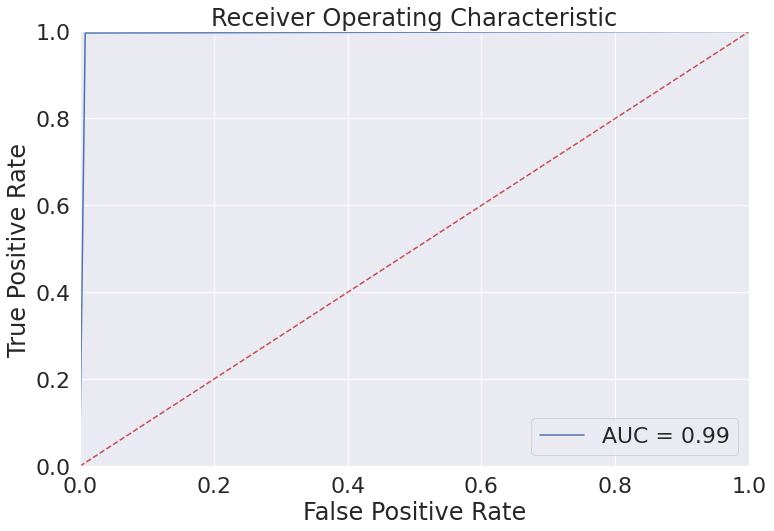

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00627955 0.01675832 0.01509884 ... 0.74919805 0.85414798 1.26119458]
Visualize quantization error


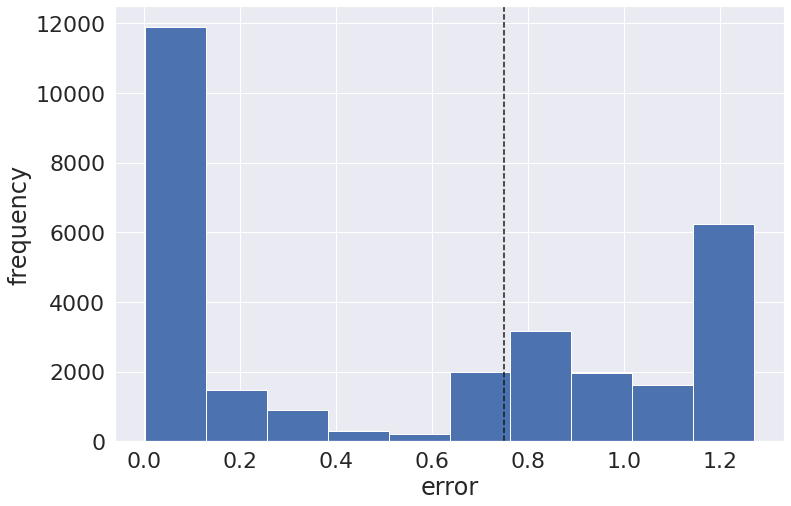

Outliers visualization


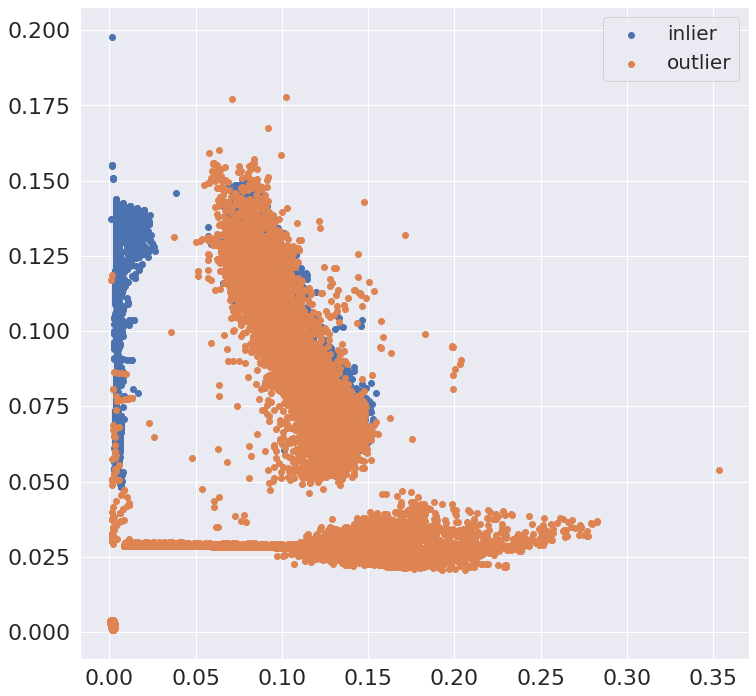

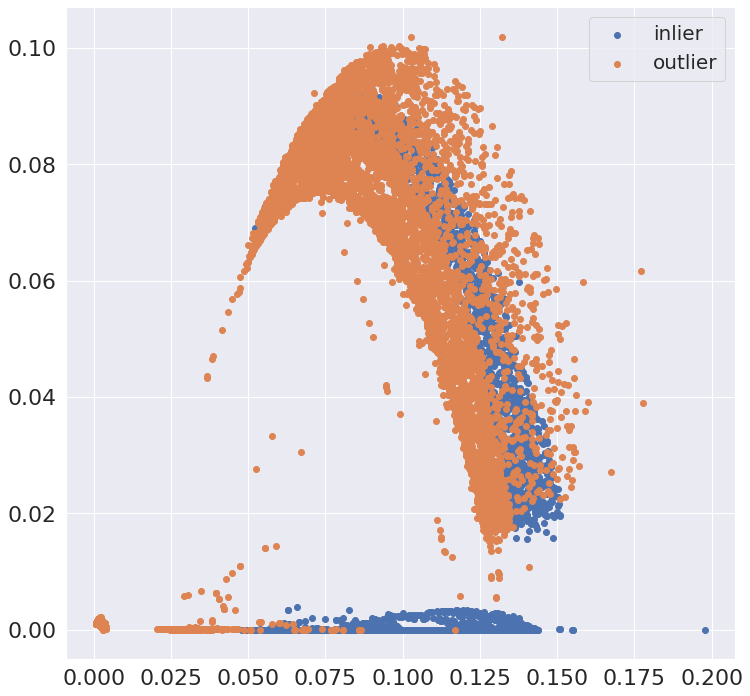

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.694     0.992     0.817     14865
           2      0.986     0.563     0.716     14865

    accuracy                          0.777     29730
   macro avg      0.840     0.777     0.766     29730
weighted avg      0.840     0.777     0.766     29730



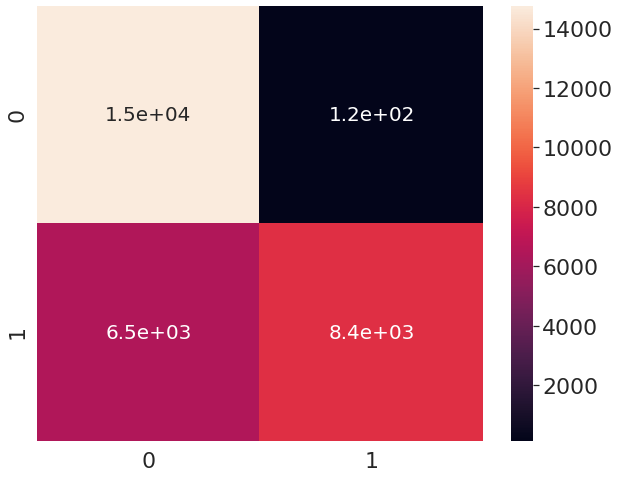

AUC score:  0.7771947527749747


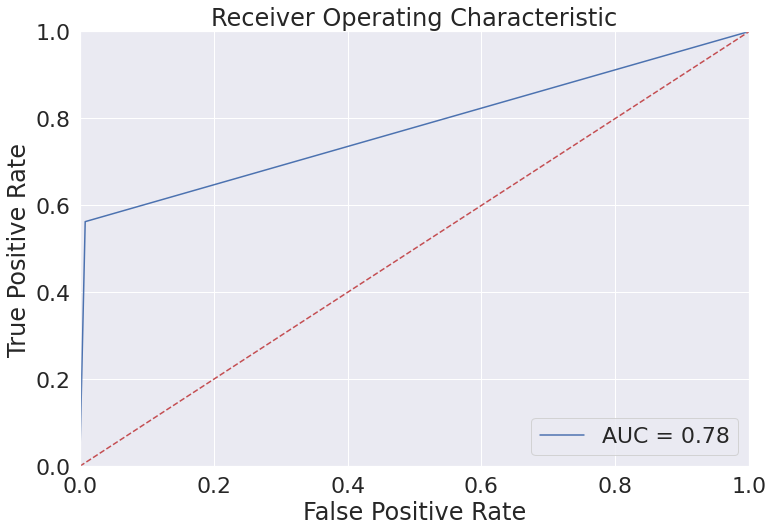

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [56]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00190246 0.01176058 0.00886369 ... 1.20683262 1.20683264 1.20683262]
Visualize quantization error


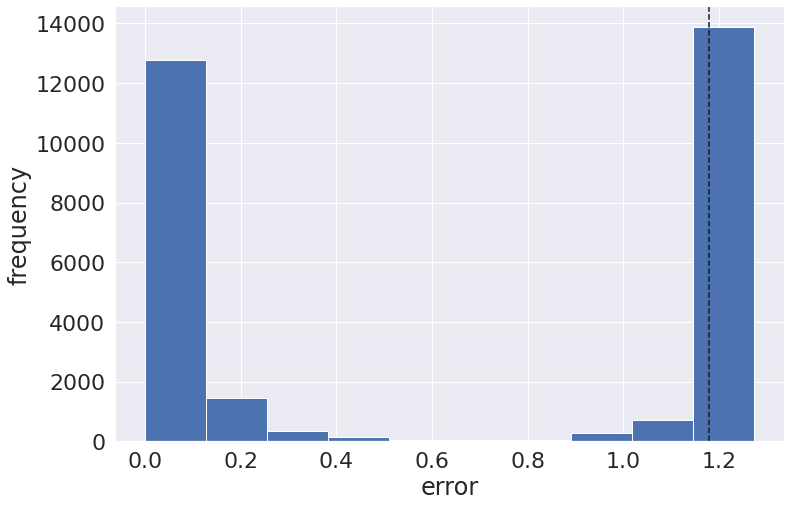

Outliers visualization


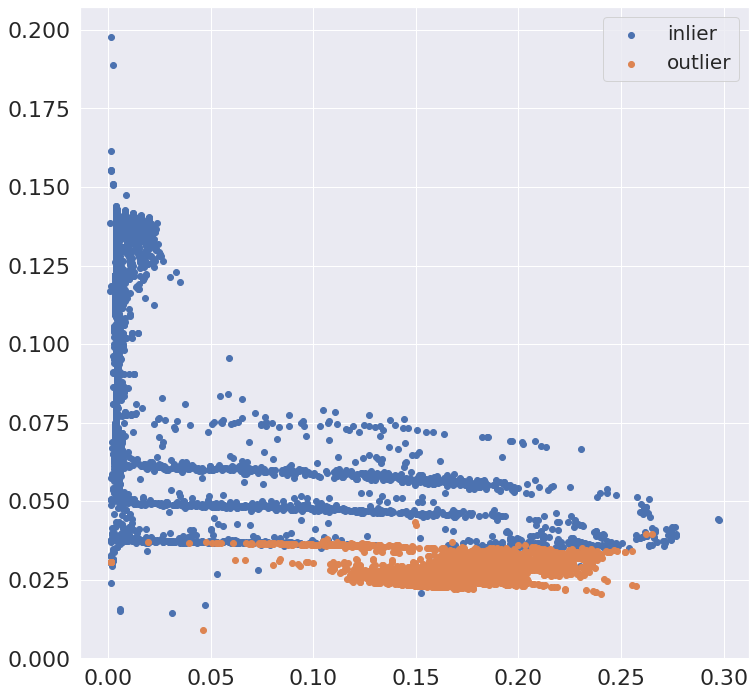

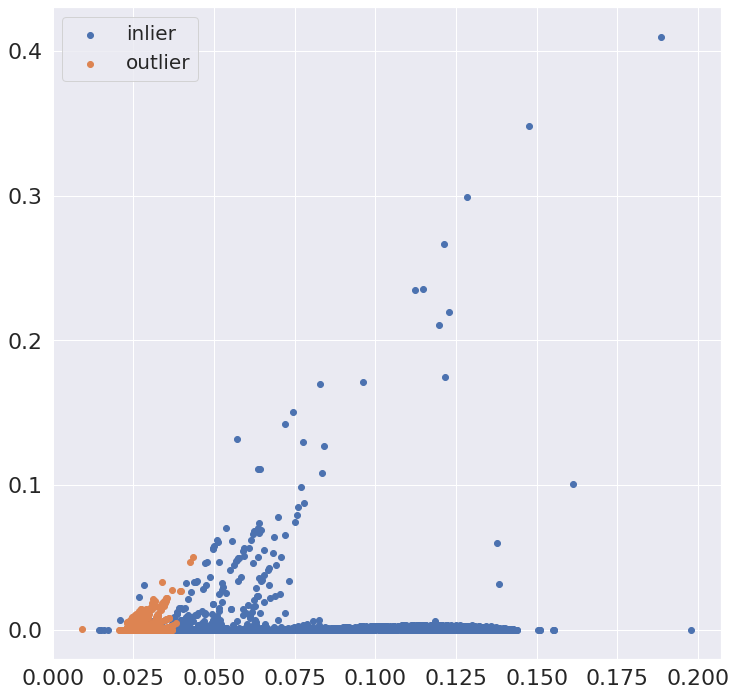

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.997     14865
           2      0.997     0.998     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



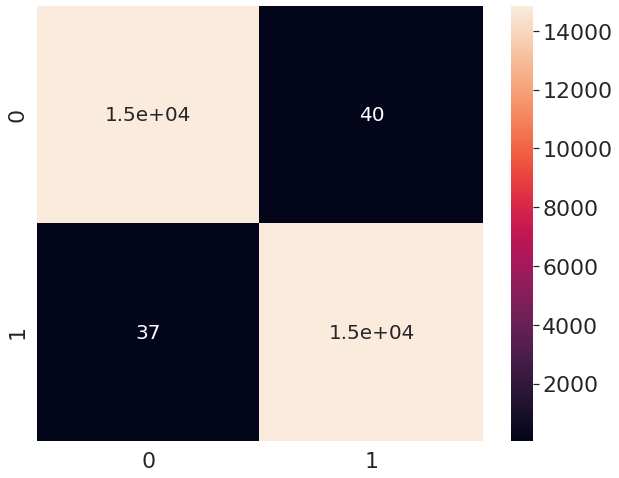

AUC score:  0.9974100235452406


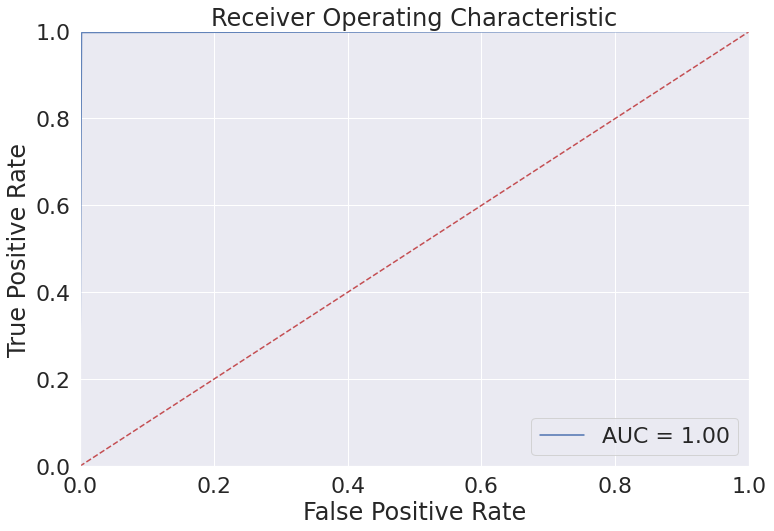

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00190246 0.01176058 0.00886369 ... 0.75042214 0.85207461 1.26014582]
Visualize quantization error


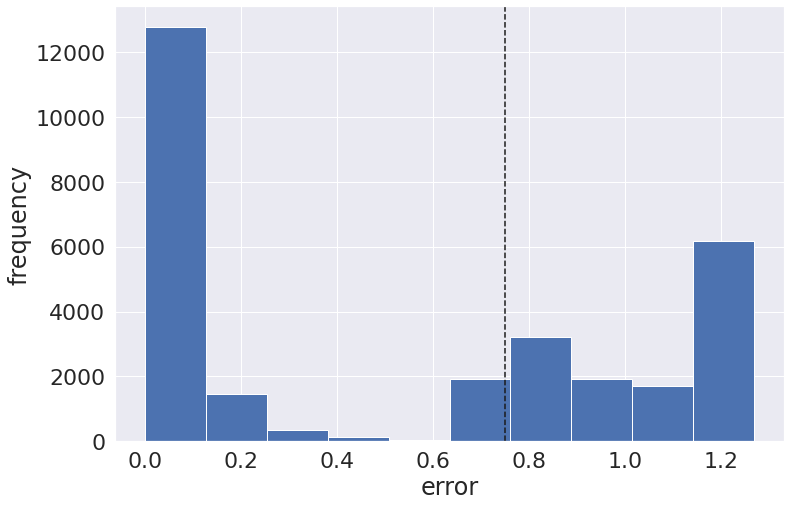

Outliers visualization


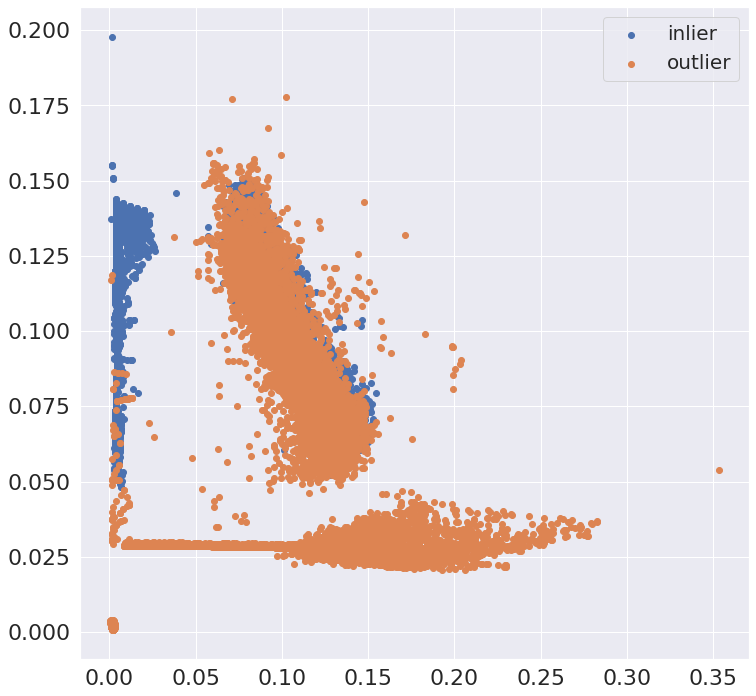

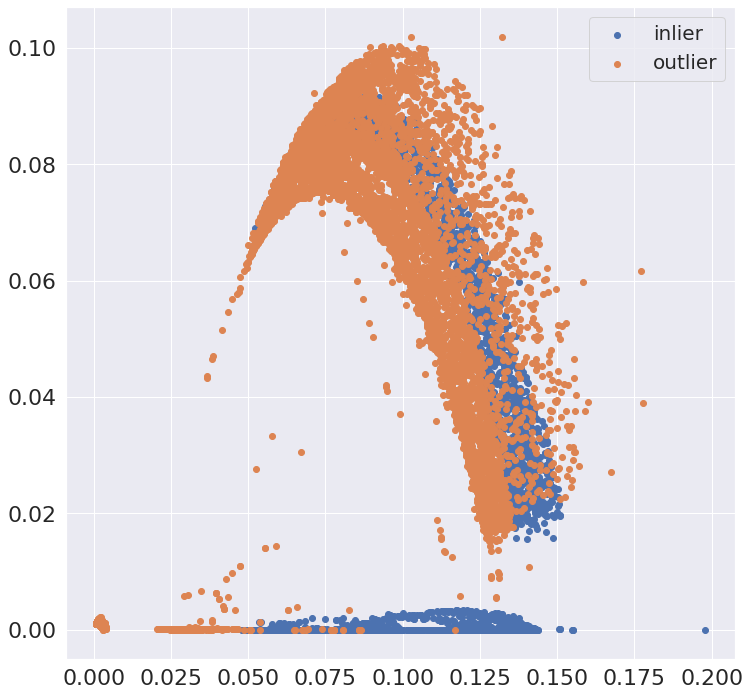

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.711     0.997     0.830     14865
           2      0.995     0.595     0.744     14865

    accuracy                          0.796     29730
   macro avg      0.853     0.796     0.787     29730
weighted avg      0.853     0.796     0.787     29730



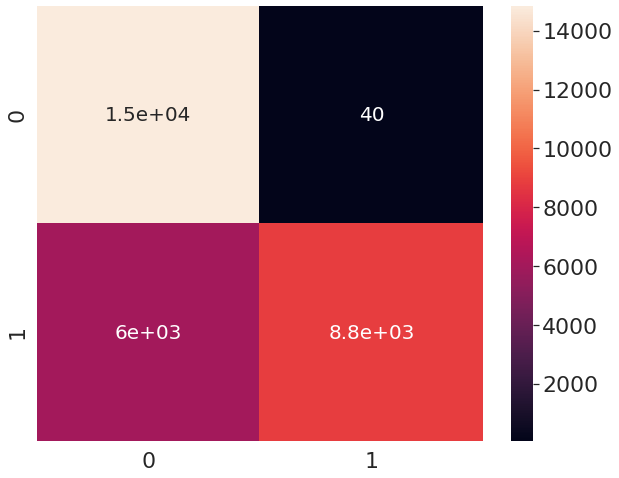

AUC score:  0.7959300369996636


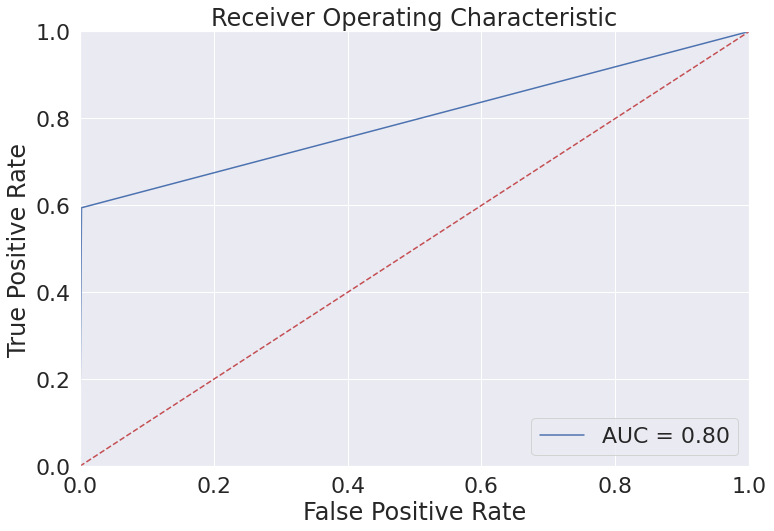

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [59]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.45256765e-03  7.13345663e-02  7.86089089e-10 ...  6.14953079e-18
  -3.15561174e-34 -1.87753709e-17]
 [ 1.71964723e-02  1.21268756e-01  3.33375776e-17 ...  0.00000000e+00
  -5.66476136e-36  0.00000000e+00]
 [ 3.45256770e-03  7.13345669e-02  9.14701311e-10 ...  4.61813012e-18
   2.03799925e-34  1.60594368e-17]
 ...
 [ 6.90273070e-03  1.21268756e-01  0.00000000e+00 ...  6.14953079e-18
  -1.54493492e-33 -9.16332569e-17]
 [ 3.45256791e-03  7.13345700e-02  1.59777362e-09 ...  3.25422641e-18
  -4.13078343e-35  0.00000000e+00]
 [ 3.45256740e-03  1.21268756e-01  0.00000000e+00 ...  0.00000000e+00
   1.44632205e-29  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00271369 0.00247065 0.0139352  ... 1.13787299 1.137873   1.13787299]
Visualize quantization error


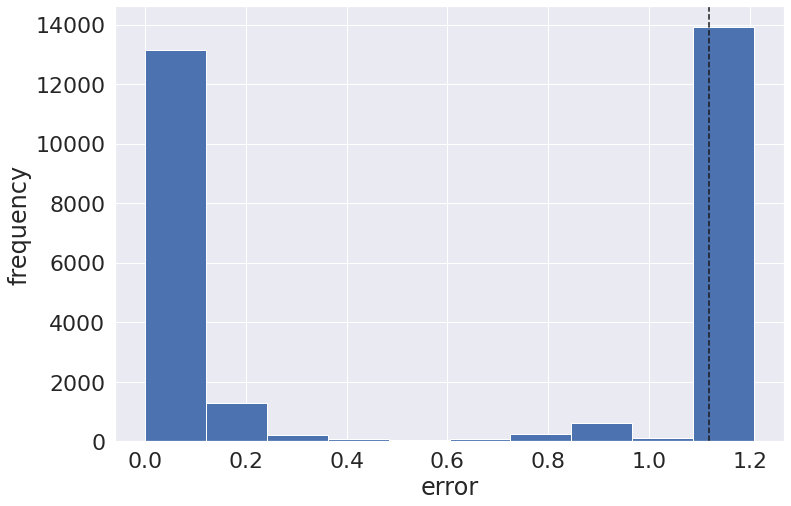

Outliers visualization


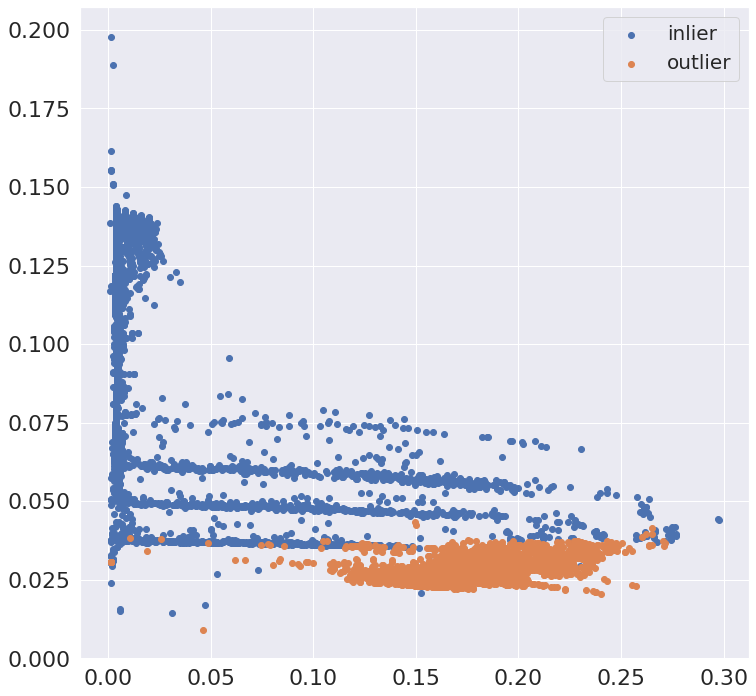

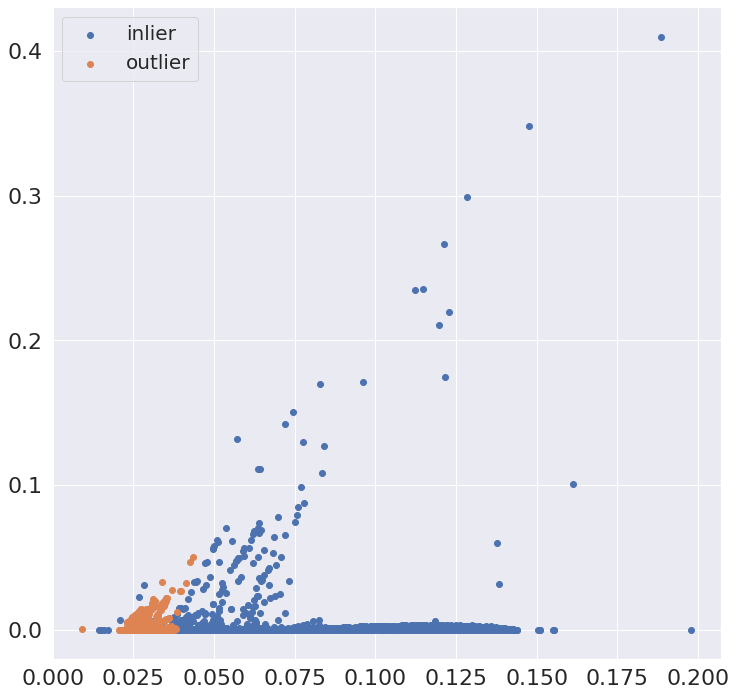

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.998     0.998     14865
           2      0.998     0.998     0.998     14865

    accuracy                          0.998     29730
   macro avg      0.998     0.998     0.998     29730
weighted avg      0.998     0.998     0.998     29730



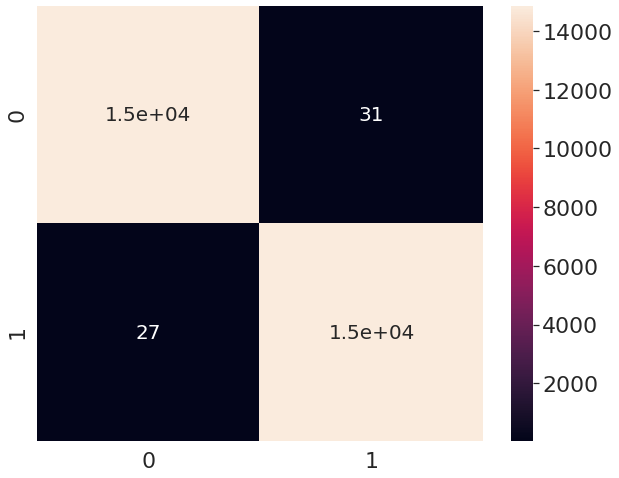

AUC score:  0.9980491086444668


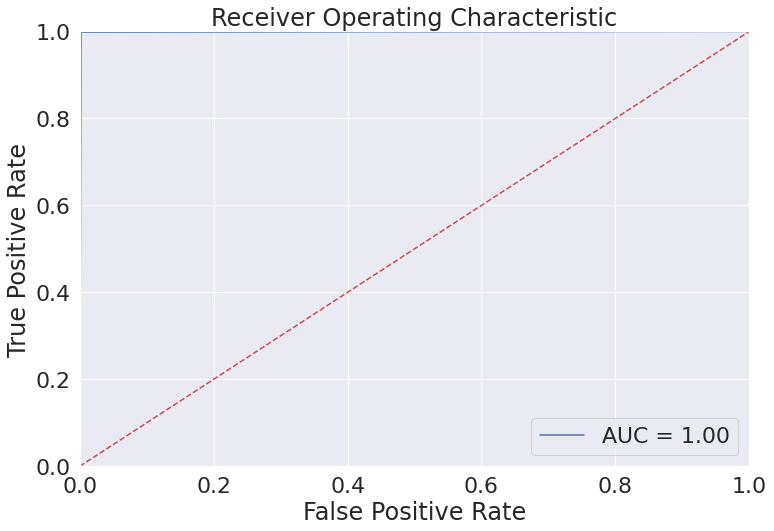

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [60]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00271369 0.00247065 0.0139352  ... 0.74945981 0.85318279 1.19308535]
Visualize quantization error


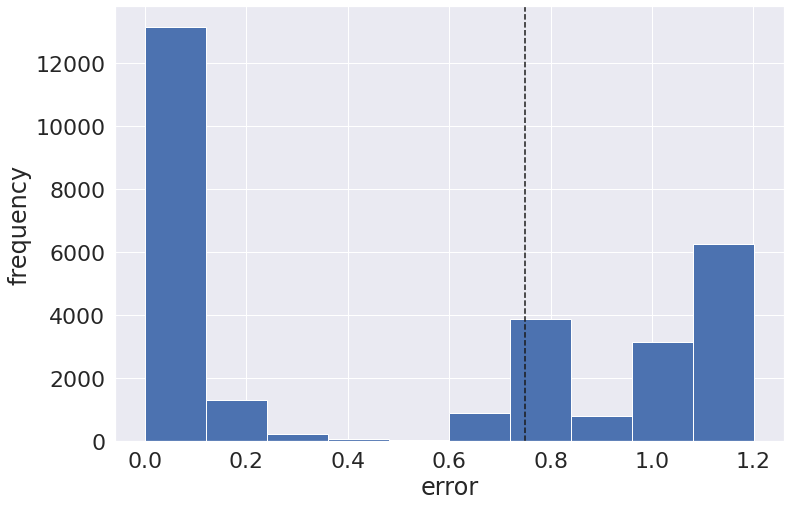

Outliers visualization


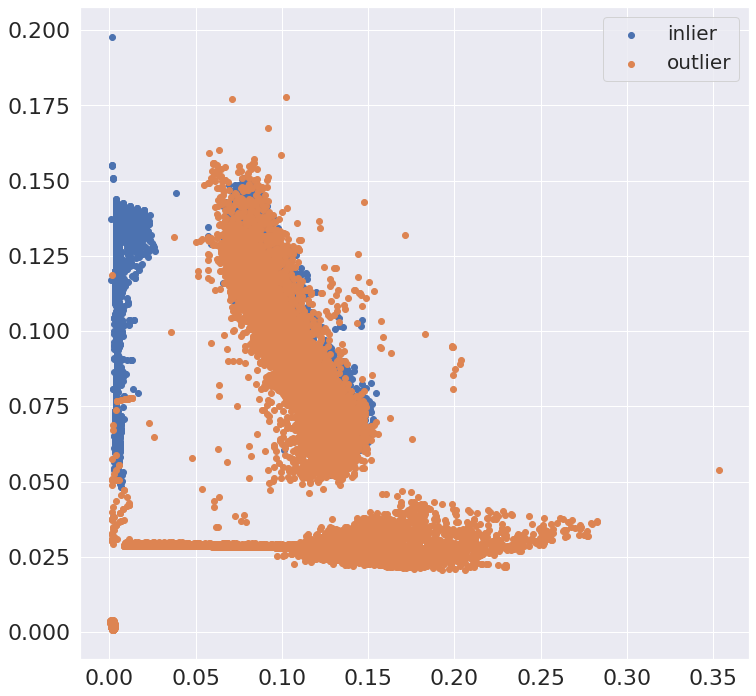

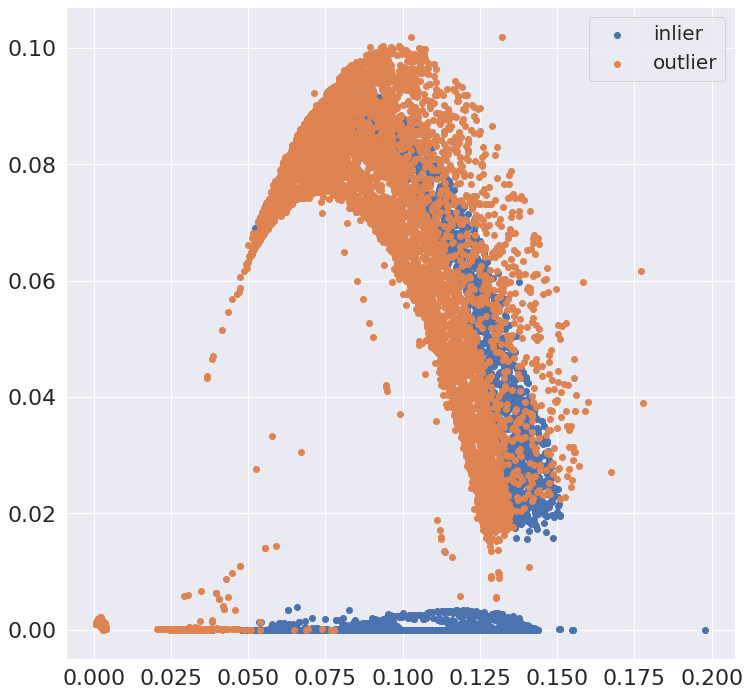

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.633     0.998     0.774     14865
           2      0.995     0.420     0.591     14865

    accuracy                          0.709     29730
   macro avg      0.814     0.709     0.683     29730
weighted avg      0.814     0.709     0.683     29730



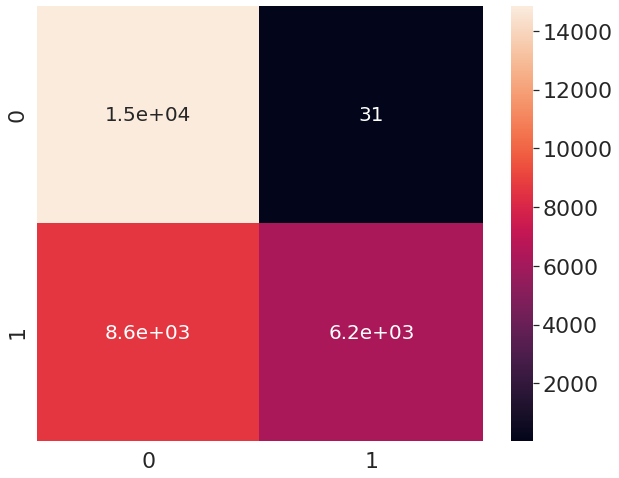

AUC score:  0.7090817356205853


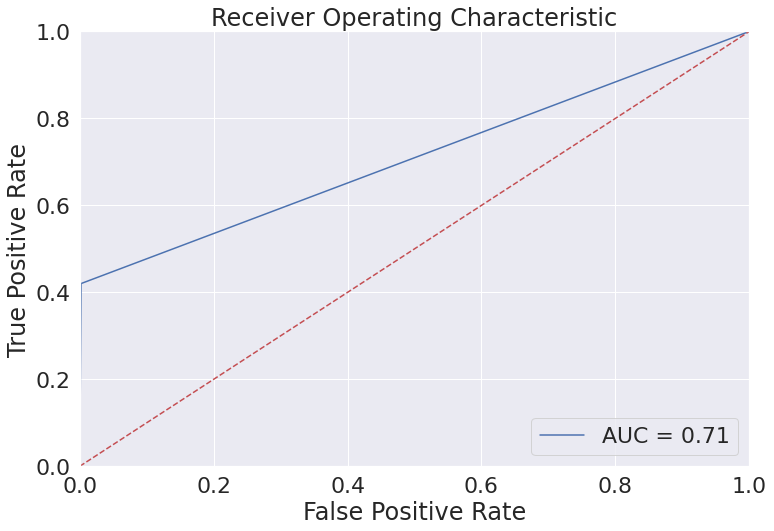

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [62]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00356007 0.01176078 0.01326036 ... 1.19024864 1.19024865 1.19024863]
Visualize quantization error


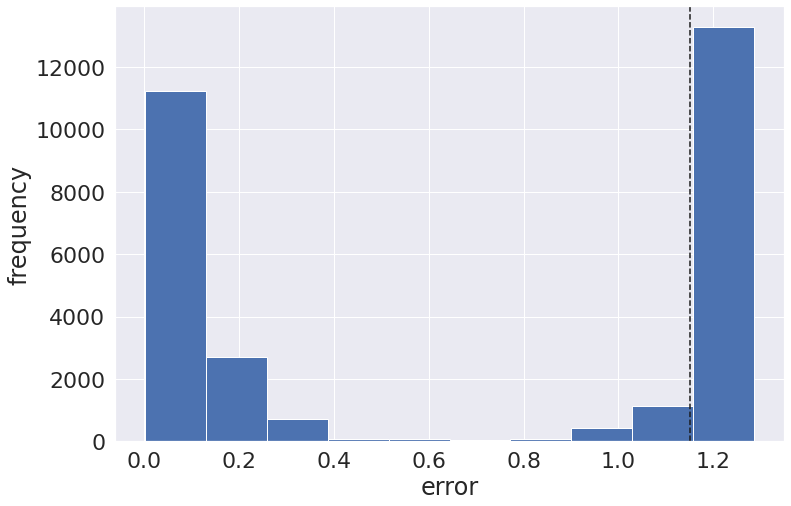

Outliers visualization


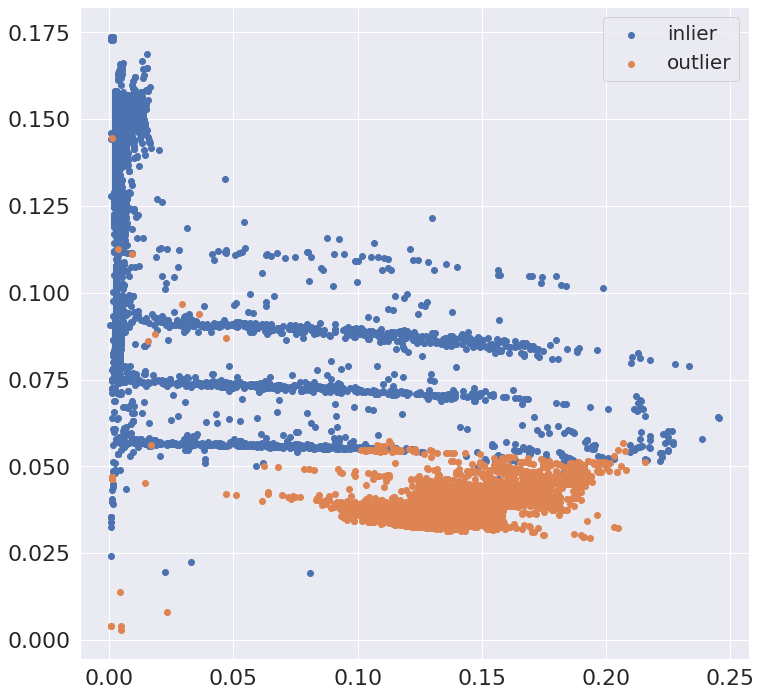

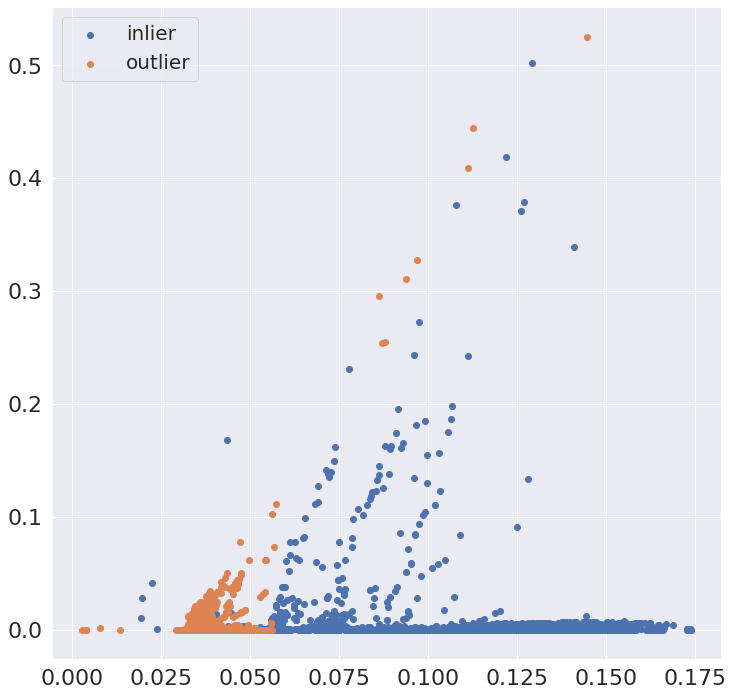

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.994     0.967     14865
           2      0.993     0.938     0.965     14865

    accuracy                          0.966     29730
   macro avg      0.967     0.966     0.966     29730
weighted avg      0.967     0.966     0.966     29730



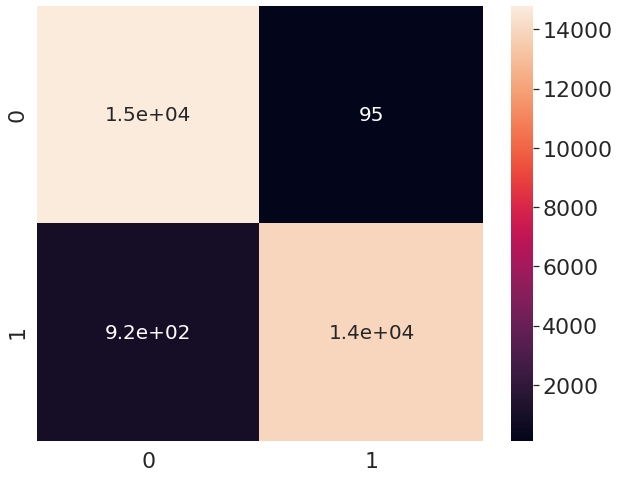

AUC score:  0.9656912209889003


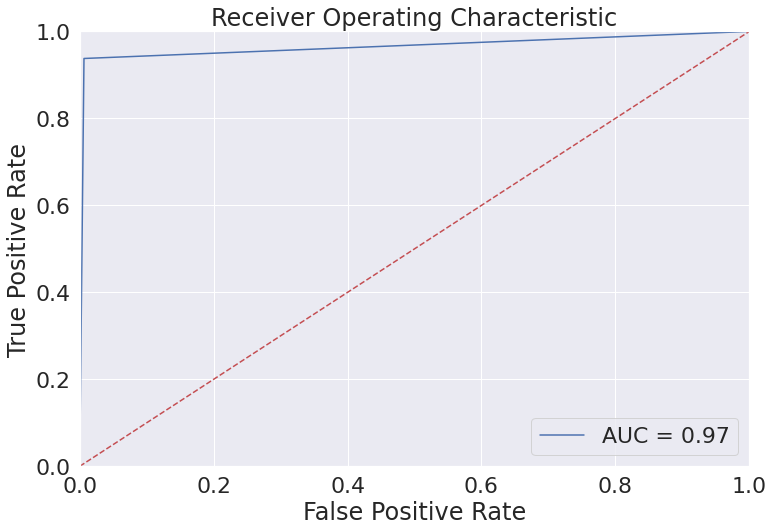

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00356007 0.01176078 0.01326036 ... 0.59653735 0.70326311 1.23944636]
Visualize quantization error


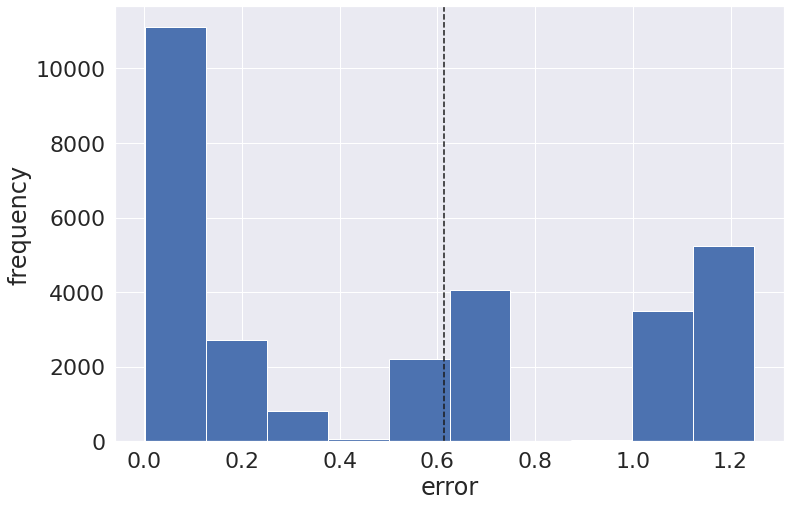

Outliers visualization


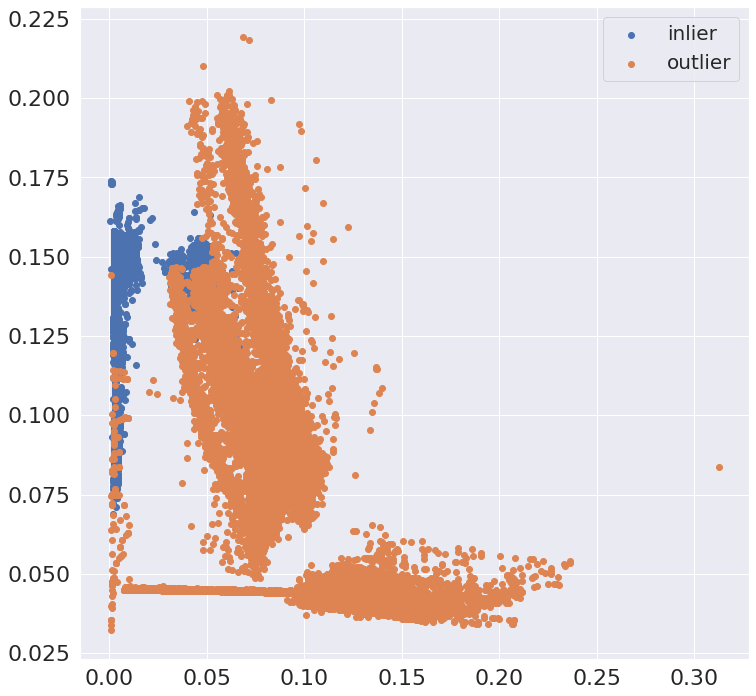

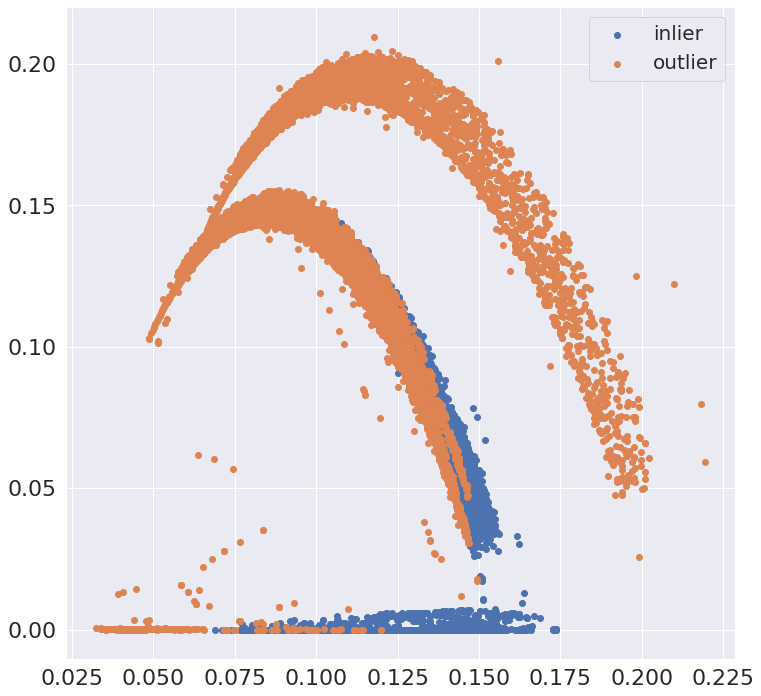

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.994     0.996     14865
           2      0.994     0.999     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



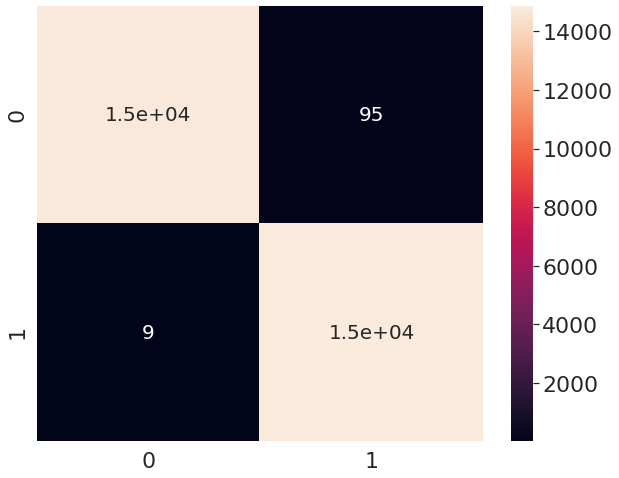

AUC score:  0.996501849983182


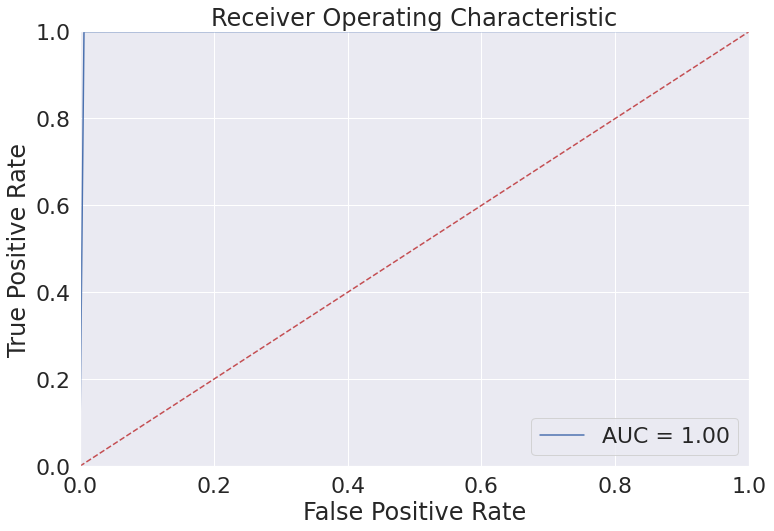

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00180247 0.00796093 0.01078949 ... 1.17449245 1.17449246 1.17449245]
Visualize quantization error


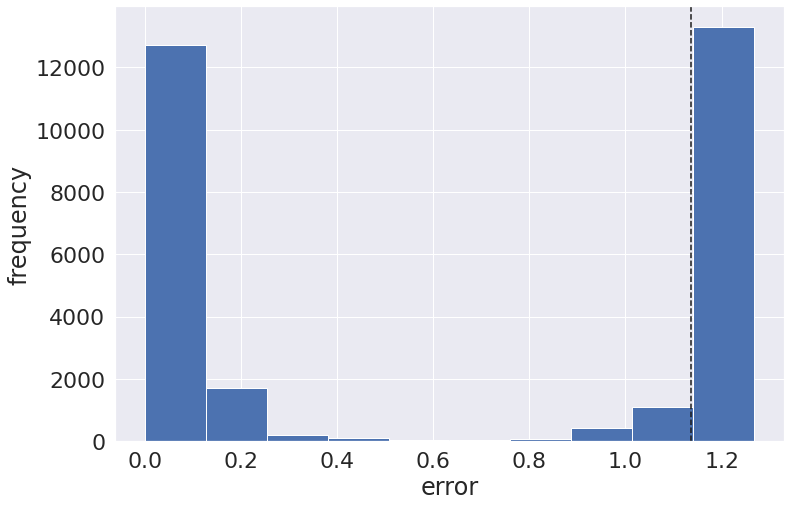

Outliers visualization


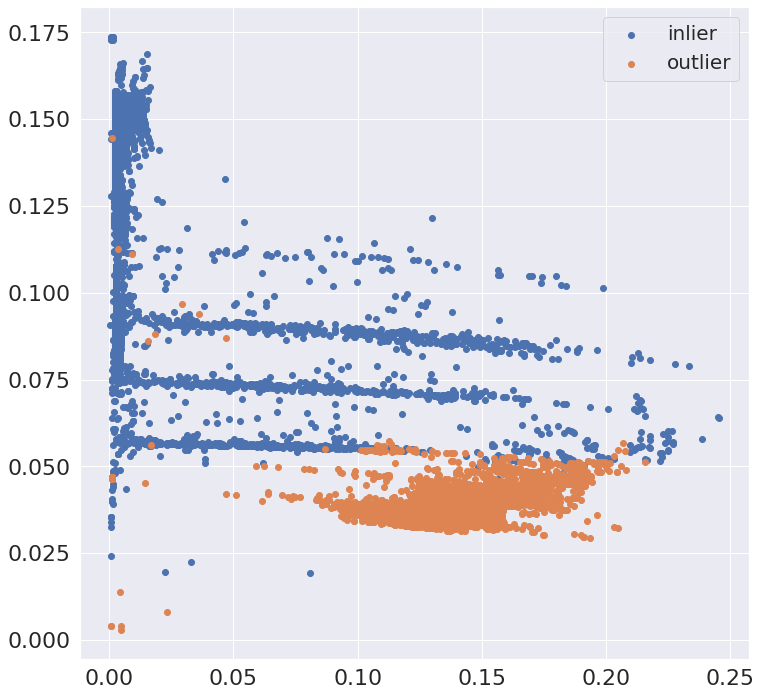

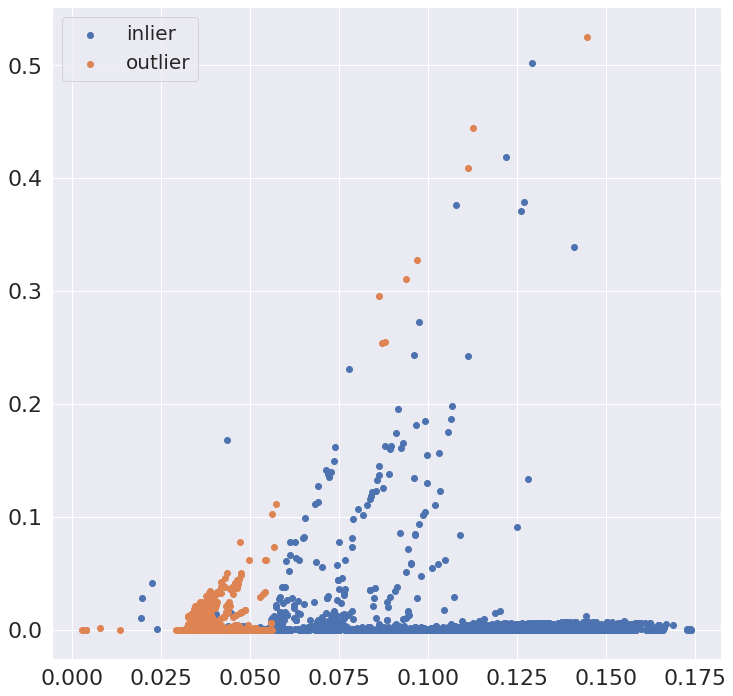

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.964     0.997     0.980     14865
           2      0.997     0.963     0.980     14865

    accuracy                          0.980     29730
   macro avg      0.981     0.980     0.980     29730
weighted avg      0.981     0.980     0.980     29730



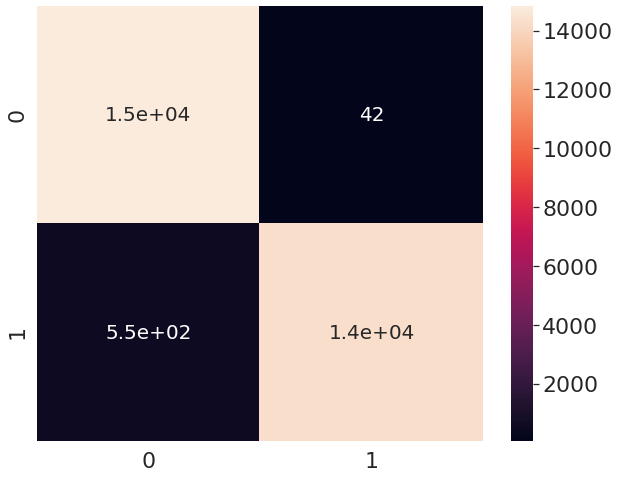

AUC score:  0.9801547258661284


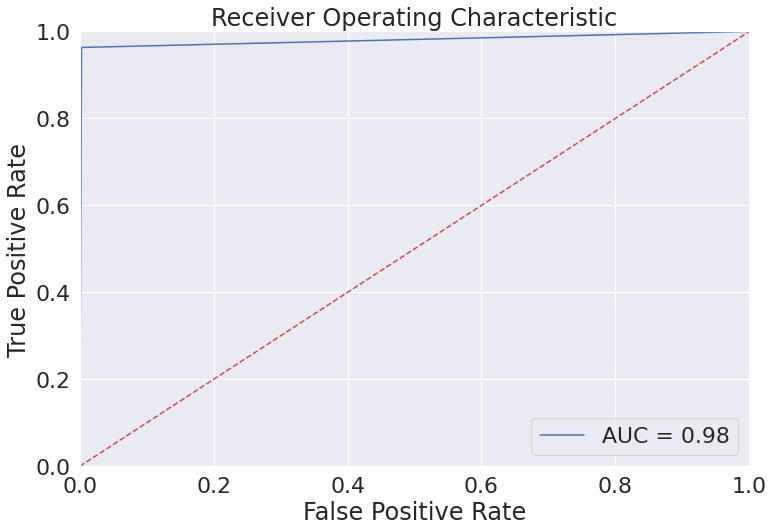

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00180247 0.00796093 0.01078949 ... 0.58941356 0.69342918 1.22180188]
Visualize quantization error


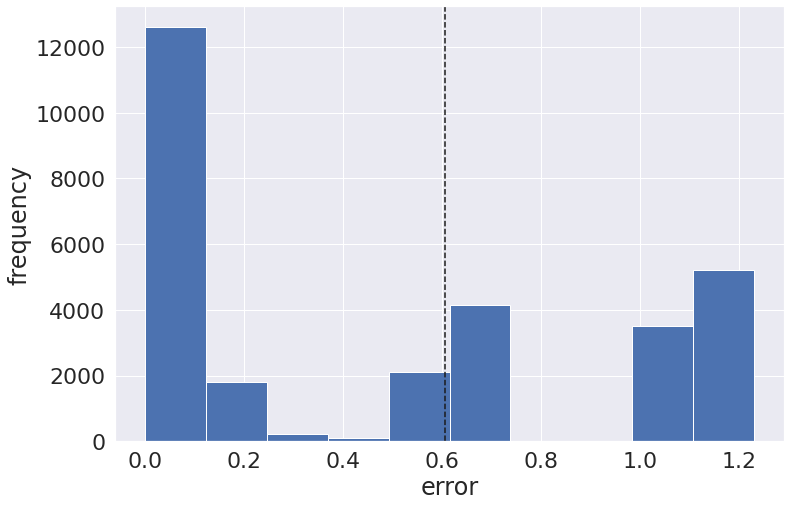

Outliers visualization


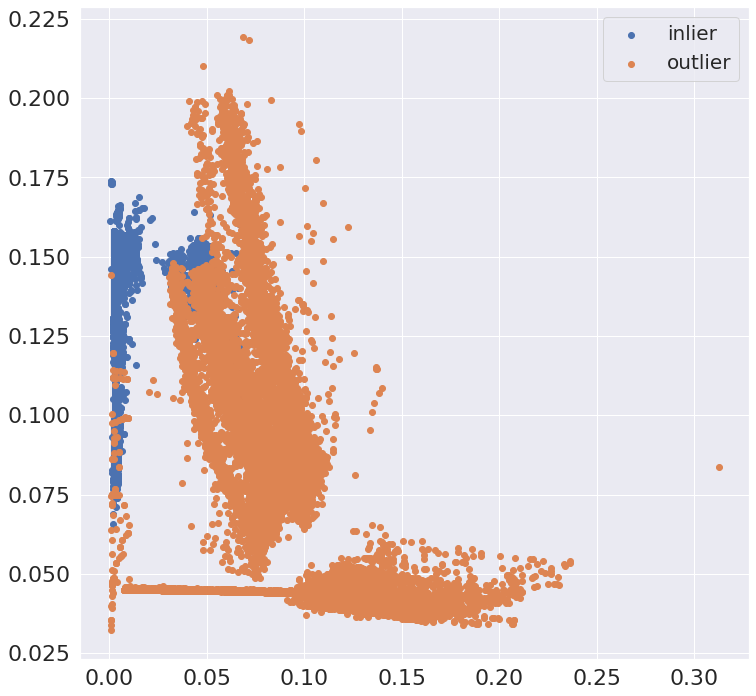

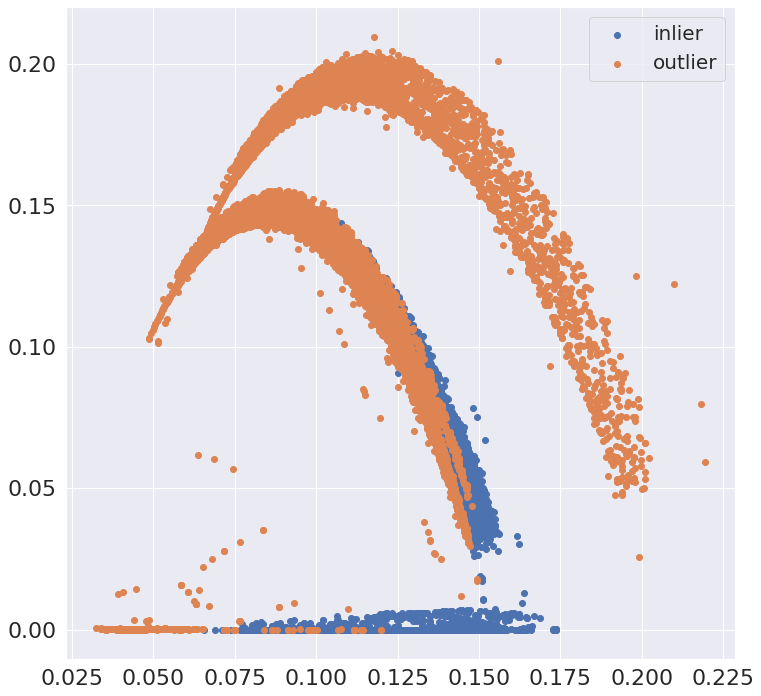

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.997     0.997     14865
           2      0.997     0.996     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



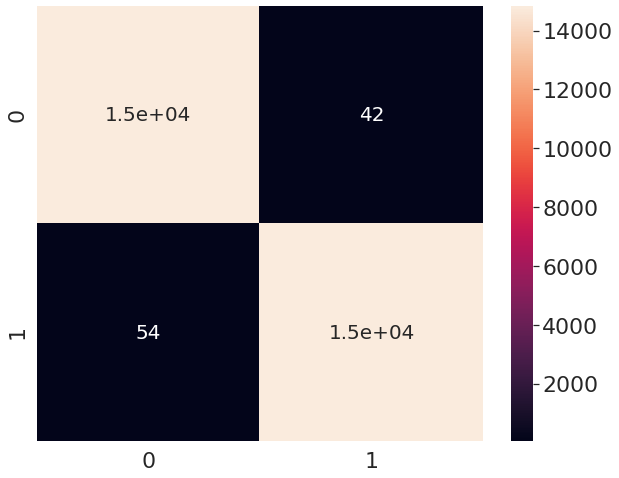

AUC score:  0.996770938446014


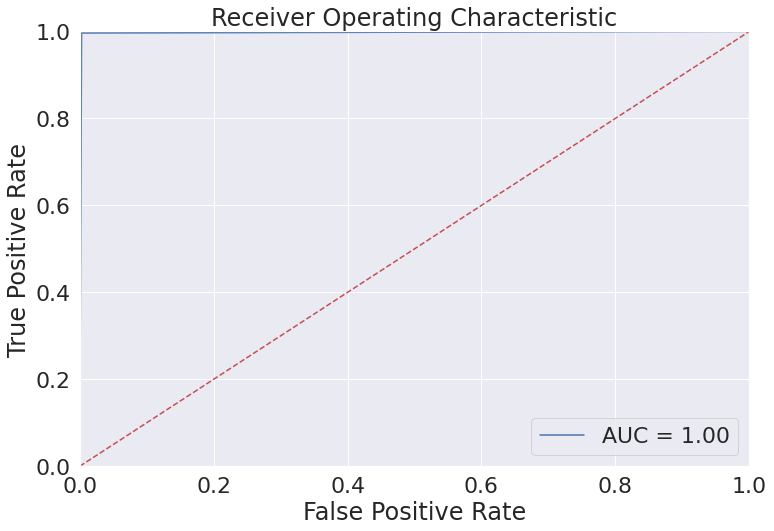

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [68]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00180531 0.0050116  0.00625819 ... 1.17061445 1.17061446 1.17061445]
Visualize quantization error


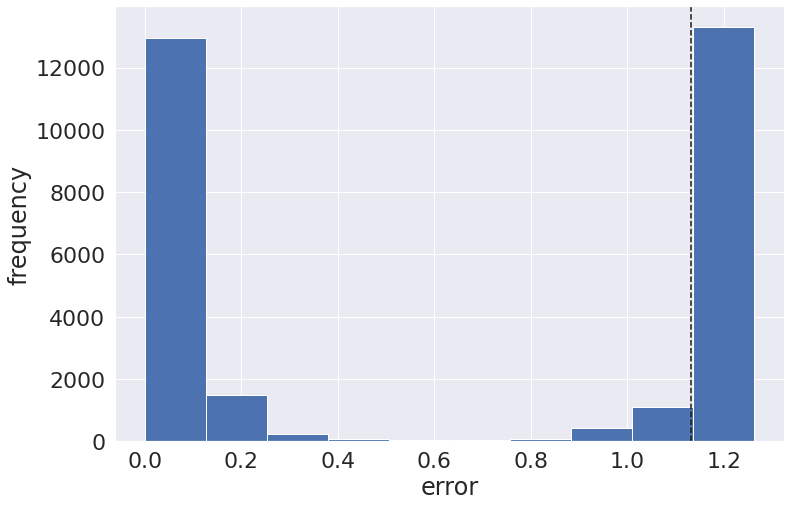

Outliers visualization


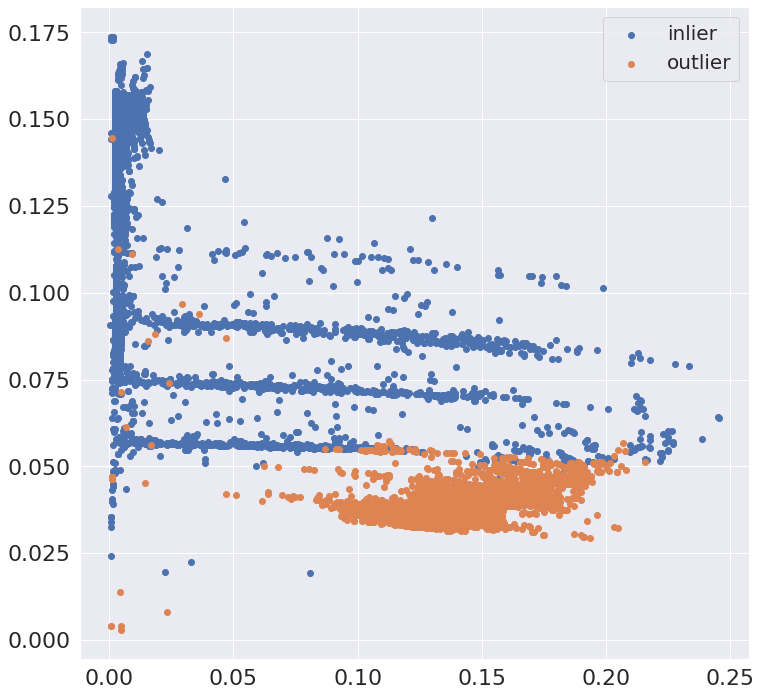

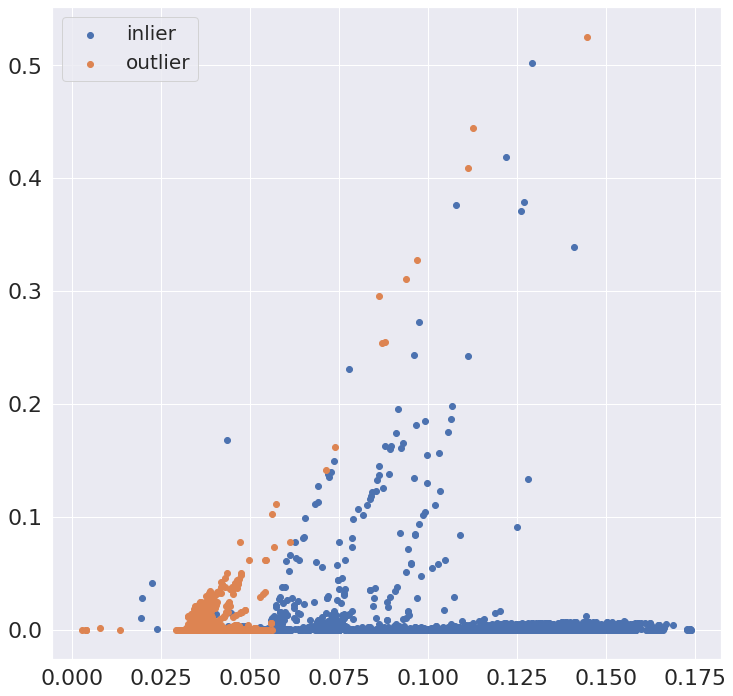

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.997     0.997     14865
           2      0.997     0.997     0.997     14865

    accuracy                          0.997     29730
   macro avg      0.997     0.997     0.997     29730
weighted avg      0.997     0.997     0.997     29730



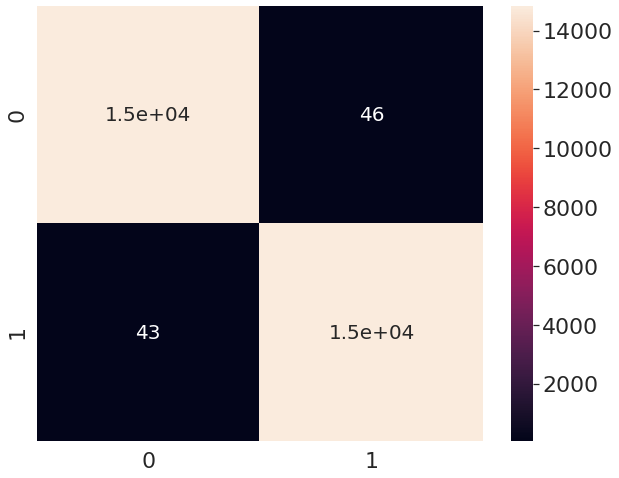

AUC score:  0.9970063908509922


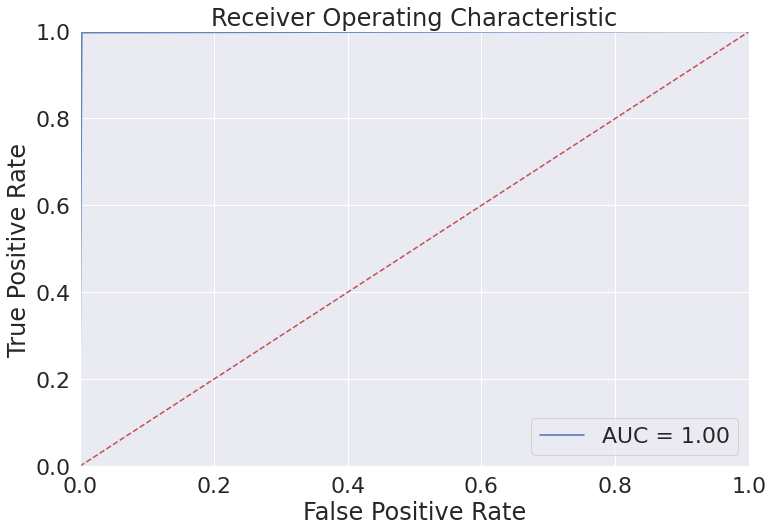

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00180531 0.0050116  0.00625819 ... 0.59494662 0.70040125 1.21891114]
Visualize quantization error


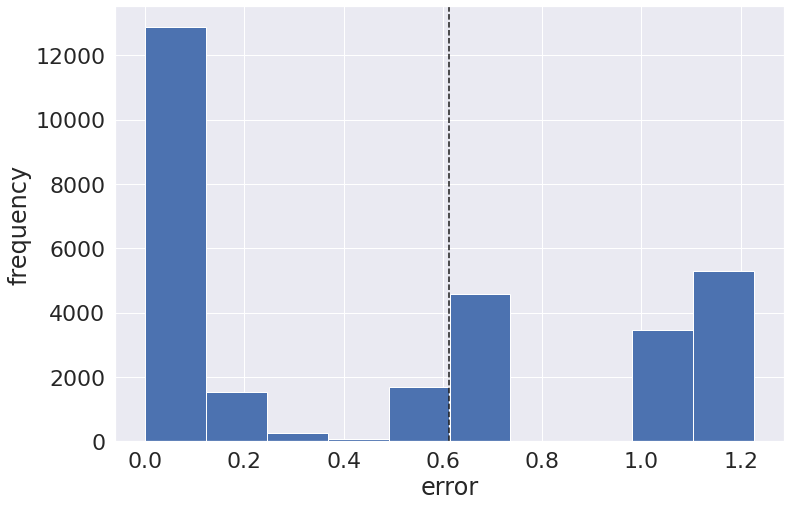

Outliers visualization


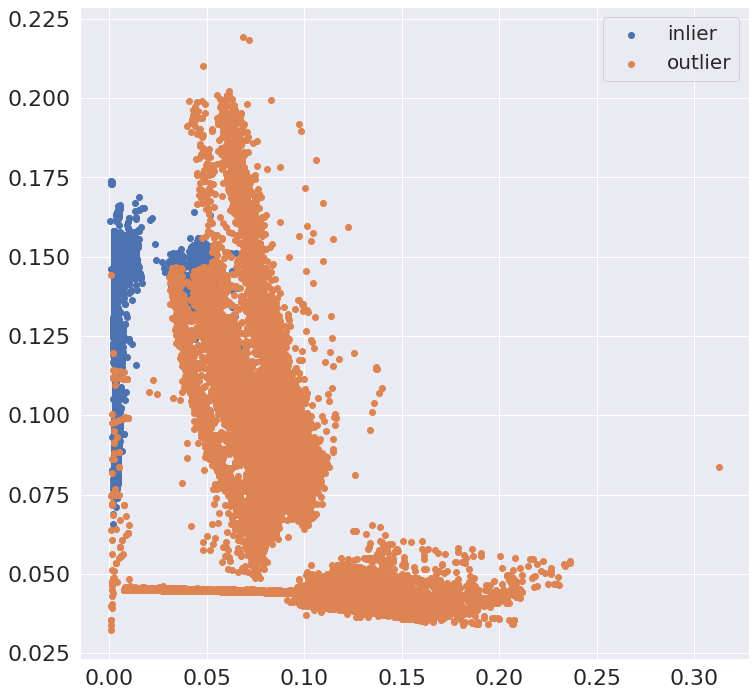

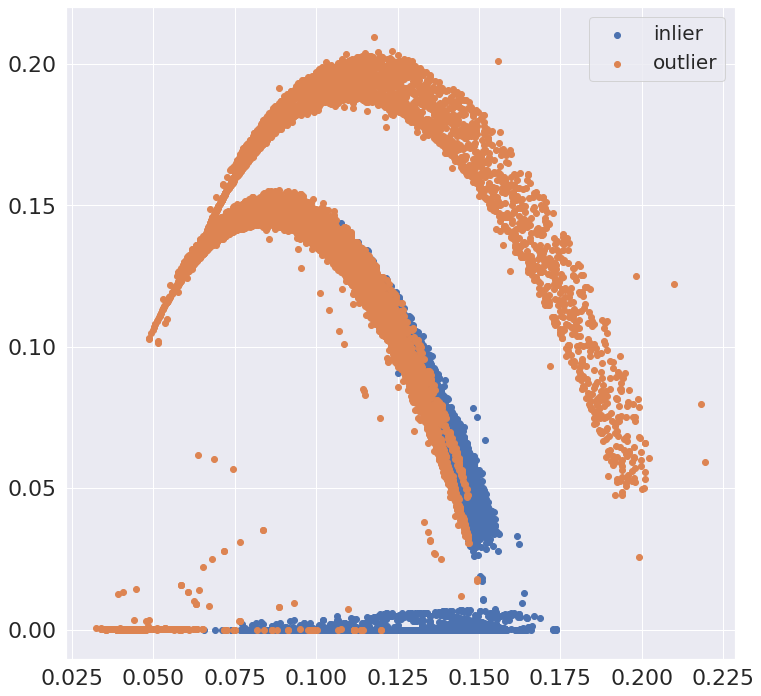

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.997     0.998     14865
           2      0.997     1.000     0.998     14865

    accuracy                          0.998     29730
   macro avg      0.998     0.998     0.998     29730
weighted avg      0.998     0.998     0.998     29730



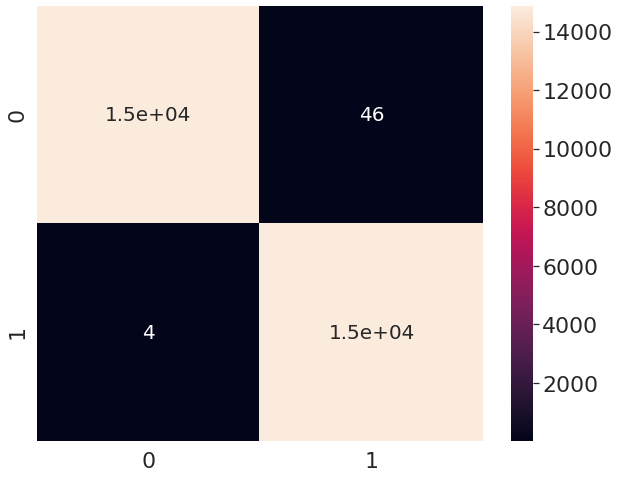

AUC score:  0.9983181971072991


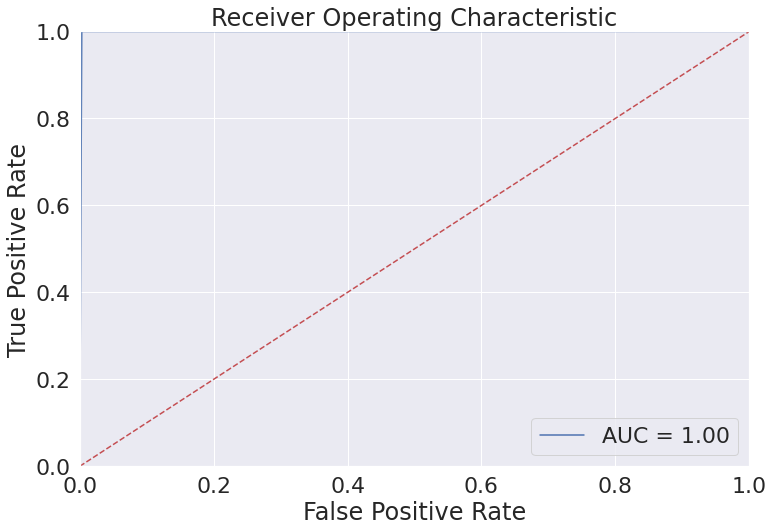

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [71]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00213163 0.00175748 0.00732904 ... 1.19619636 1.19619637 1.19619636]
Visualize quantization error


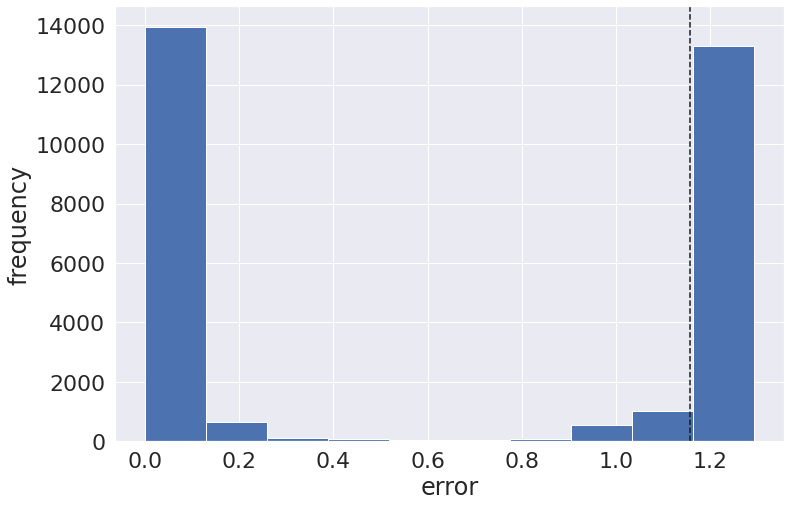

Outliers visualization


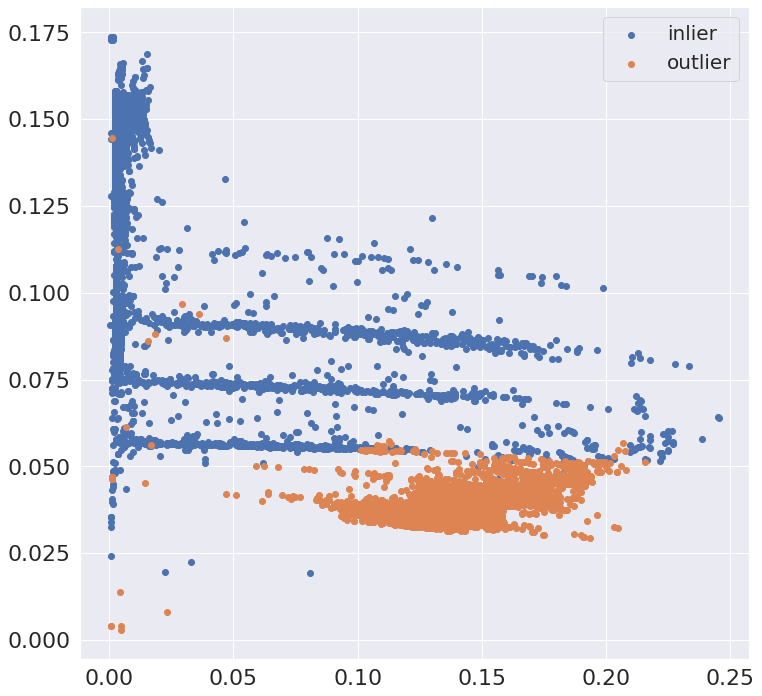

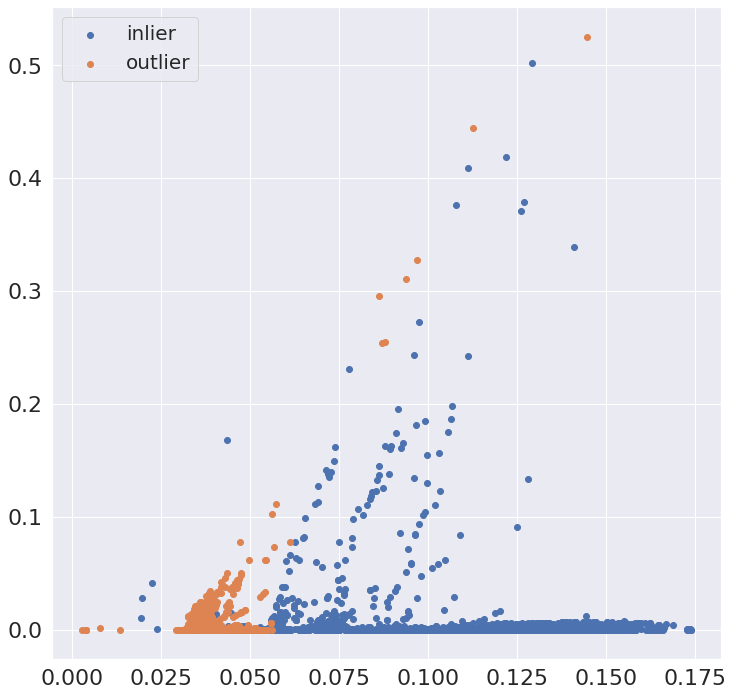

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.912     0.980     0.945     14865
           2      0.979     0.905     0.940     14865

    accuracy                          0.943     29730
   macro avg      0.945     0.943     0.943     29730
weighted avg      0.945     0.943     0.943     29730



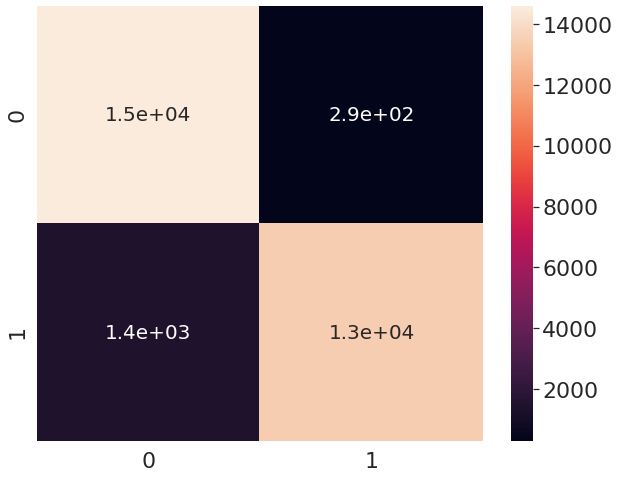

AUC score:  0.9426841574167507


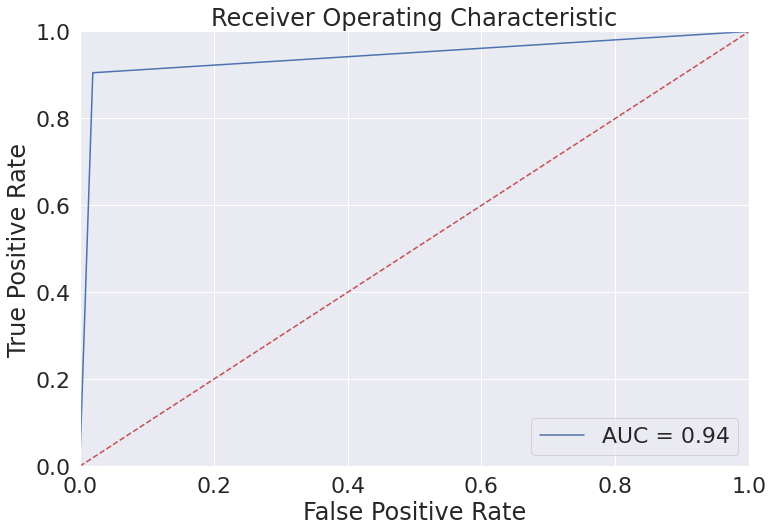

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00213163 0.00175748 0.00732904 ... 0.59466255 0.70113083 1.24785878]
Visualize quantization error


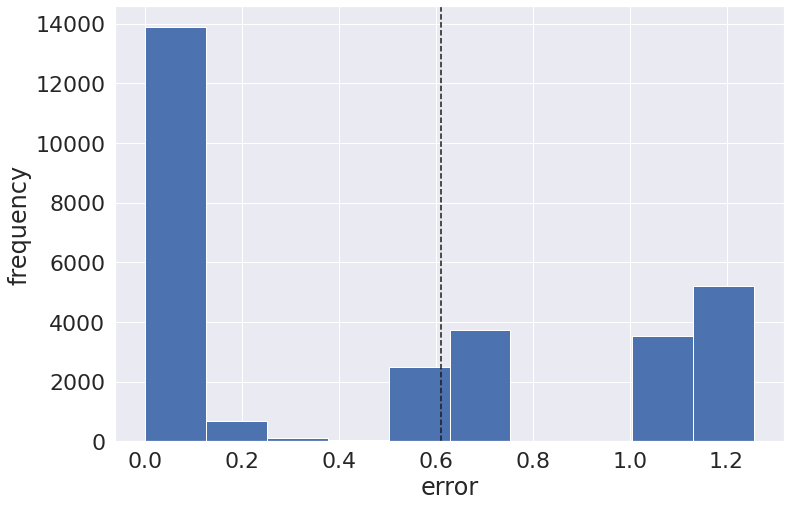

Outliers visualization


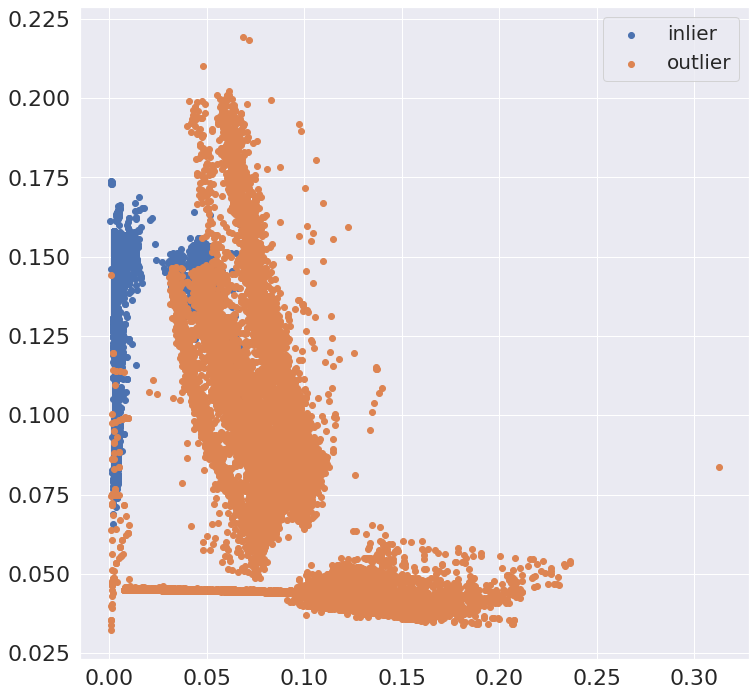

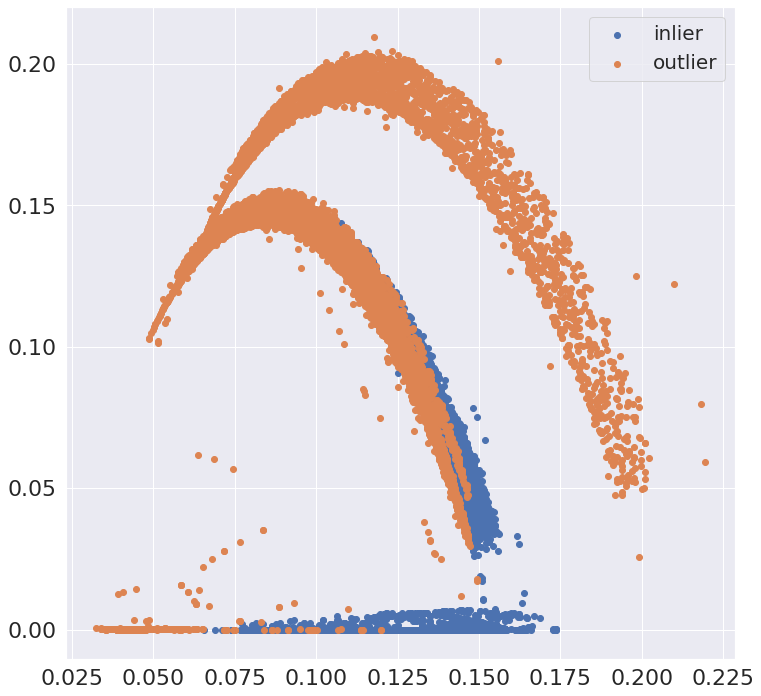

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.995     0.980     0.988     14865
           2      0.981     0.995     0.988     14865

    accuracy                          0.988     29730
   macro avg      0.988     0.988     0.988     29730
weighted avg      0.988     0.988     0.988     29730



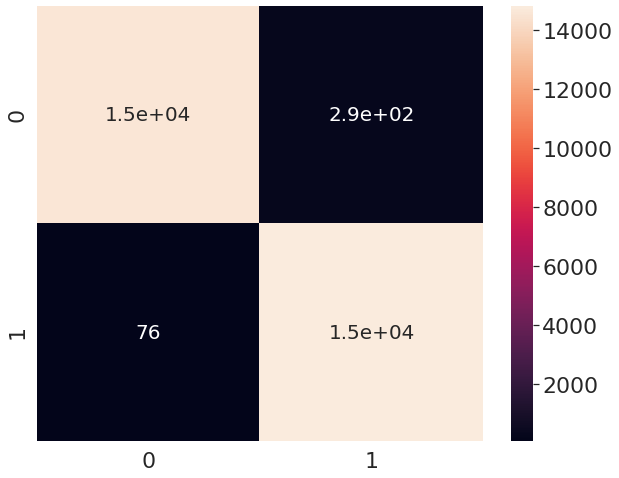

AUC score:  0.9876555667675747


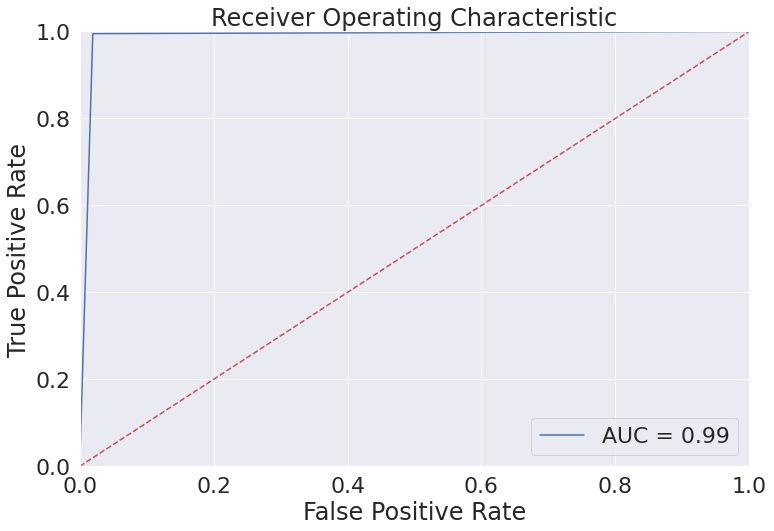

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[7.44212945e-04 2.44684193e-03 4.76343818e-03 ... 1.05602753e+00
 1.05602754e+00 1.05602753e+00]
Visualize quantization error


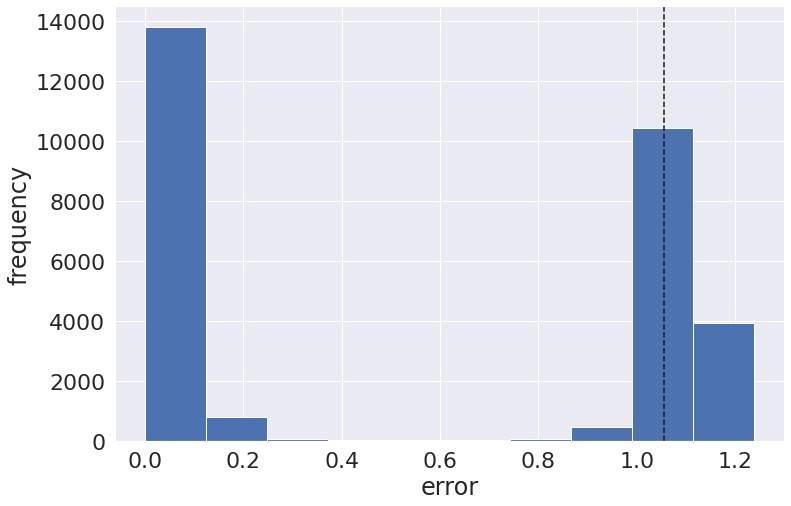

Outliers visualization


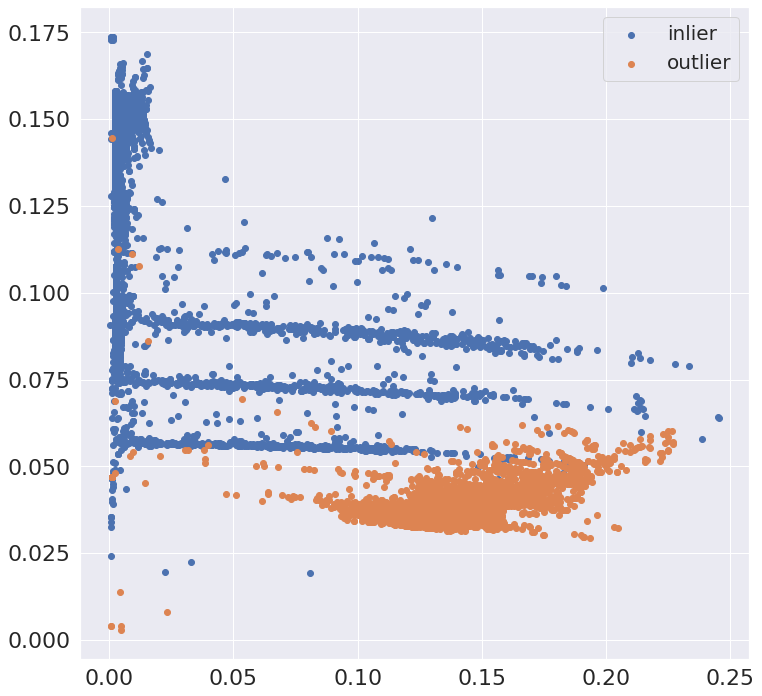

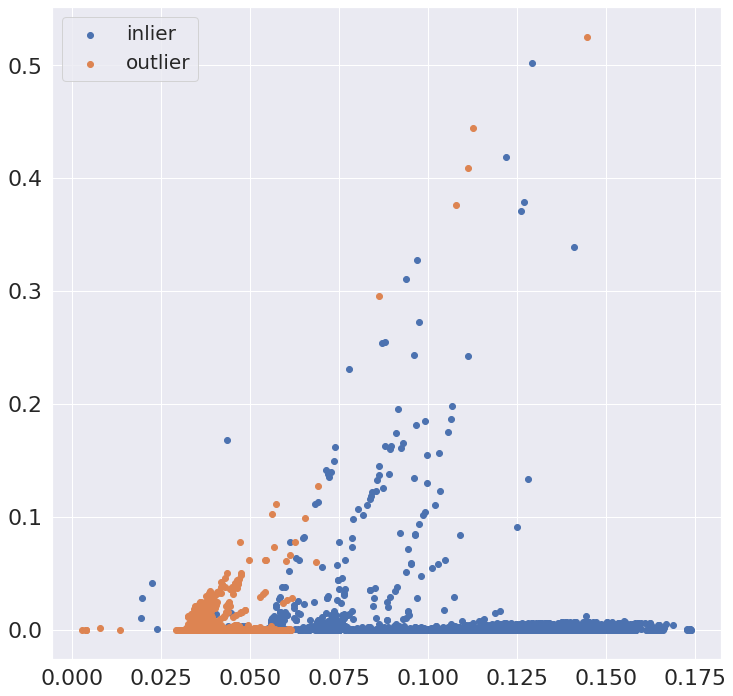

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.995     0.996     14865
           2      0.996     0.997     0.996     14865

    accuracy                          0.996     29730
   macro avg      0.996     0.996     0.996     29730
weighted avg      0.996     0.996     0.996     29730



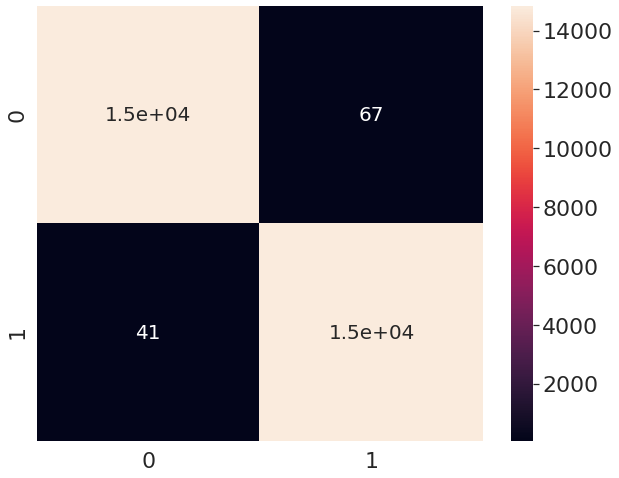

AUC score:  0.9963673057517659


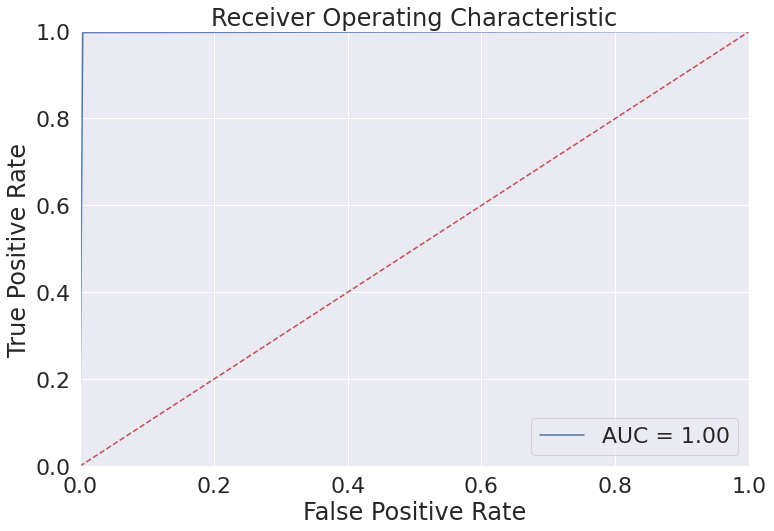

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[7.44212945e-04 2.44684193e-03 4.76343818e-03 ... 5.83167274e-01
 6.87936492e-01 1.13132879e+00]
Visualize quantization error


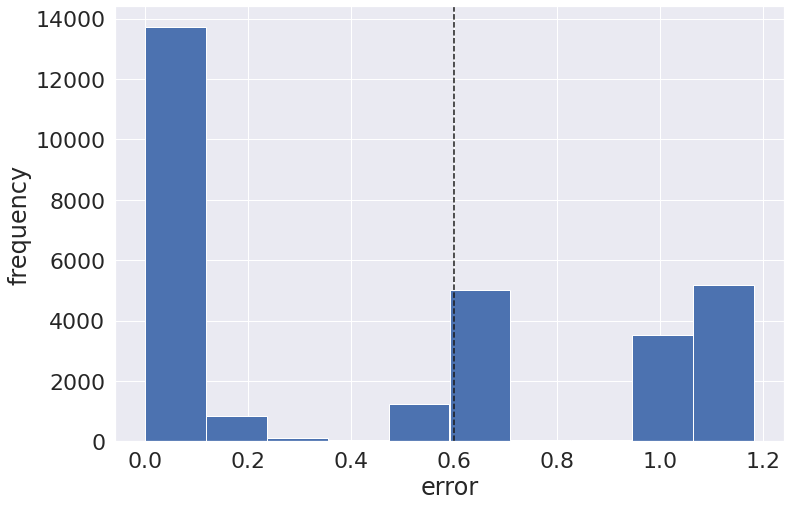

Outliers visualization


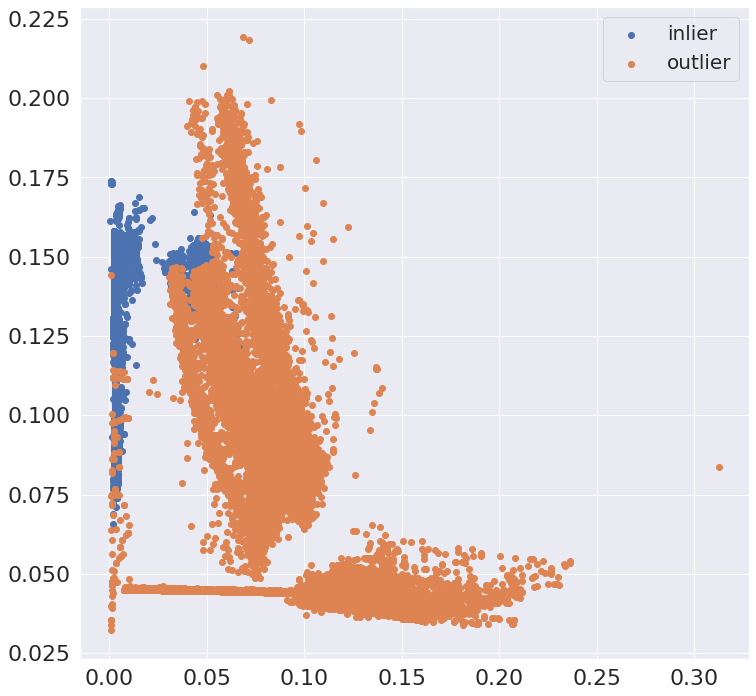

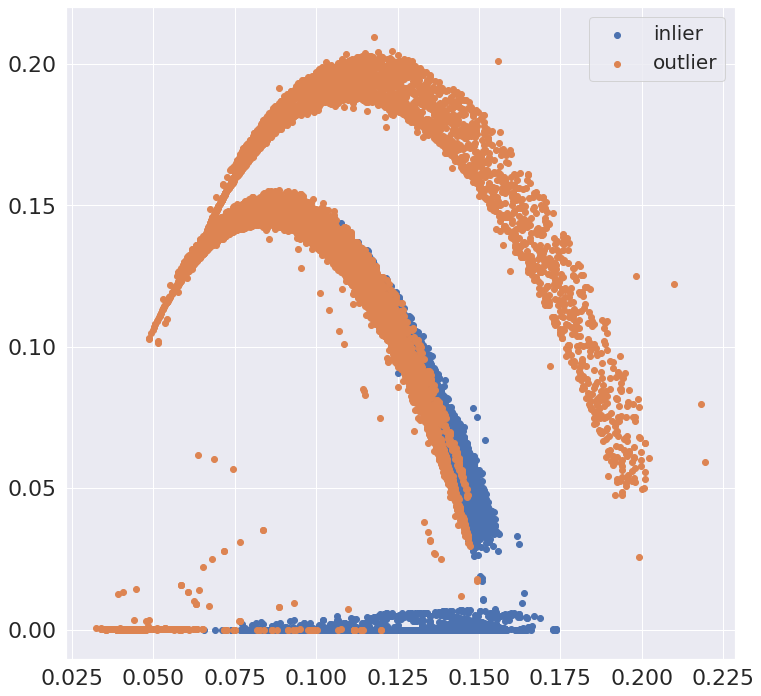

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.995     0.998     14865
           2      0.996     1.000     0.998     14865

    accuracy                          0.998     29730
   macro avg      0.998     0.998     0.998     29730
weighted avg      0.998     0.998     0.998     29730



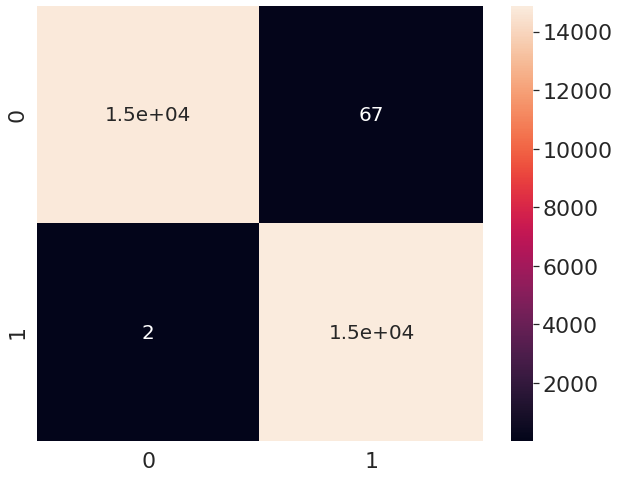

AUC score:  0.9976791120080727


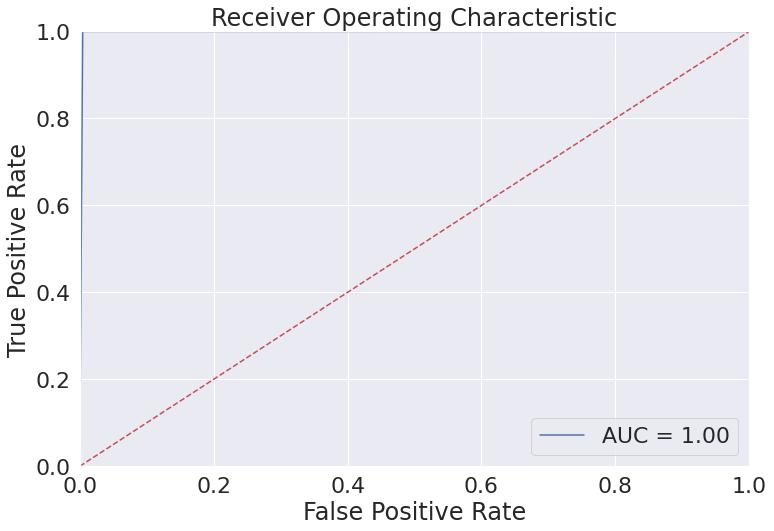

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [77]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00273693 0.00861436 0.00930335 ... 1.18591939 1.1859194  1.18591939]
Visualize quantization error


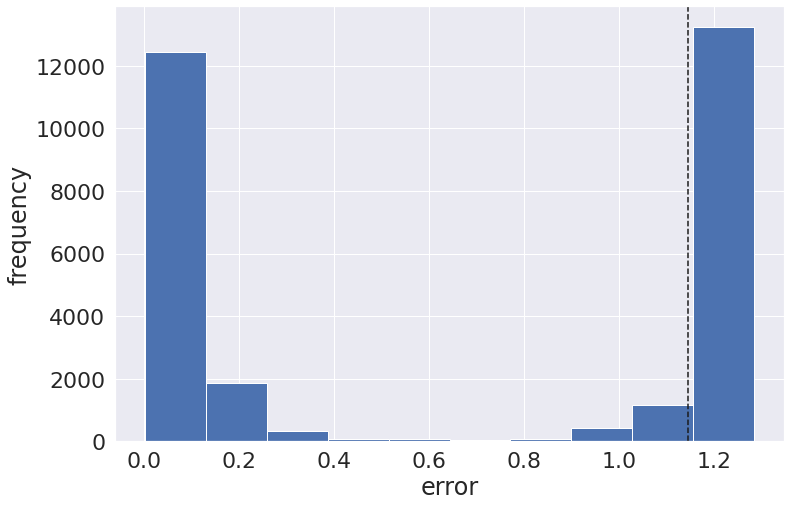

Outliers visualization


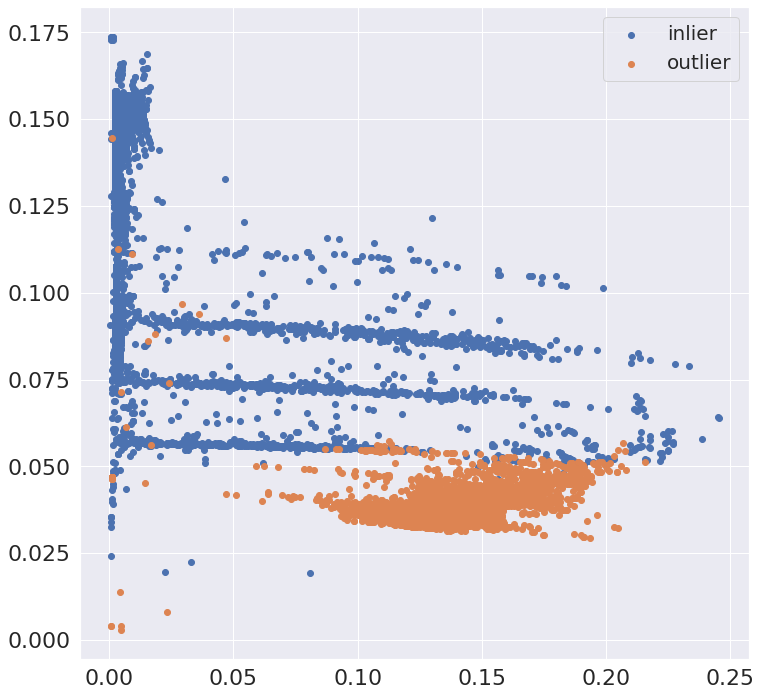

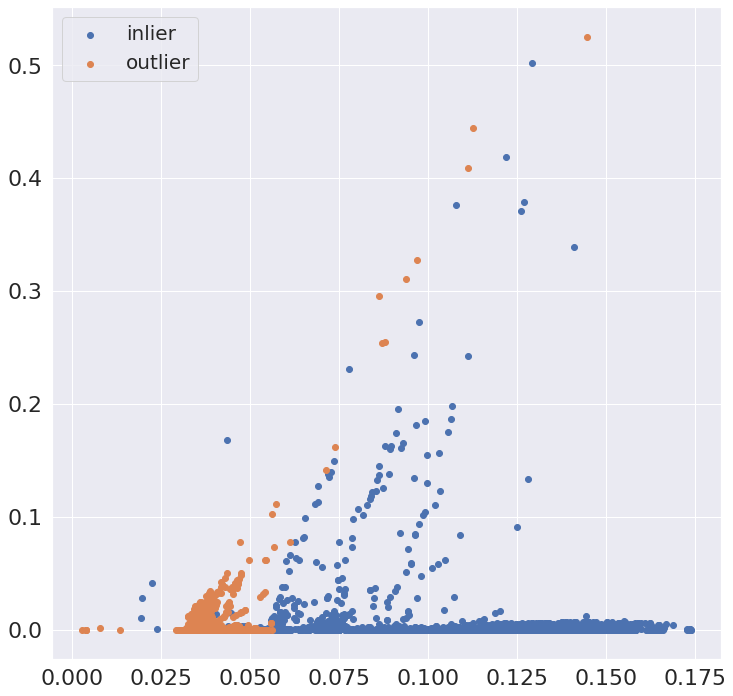

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.990     0.978     14865
           2      0.990     0.966     0.977     14865

    accuracy                          0.978     29730
   macro avg      0.978     0.978     0.978     29730
weighted avg      0.978     0.978     0.978     29730



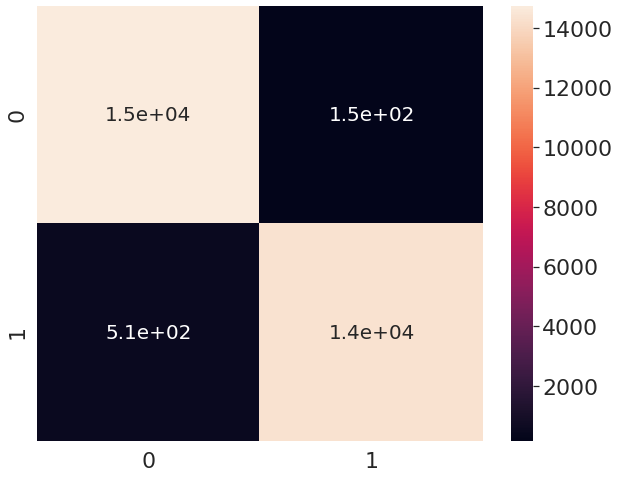

AUC score:  0.9777665657584931


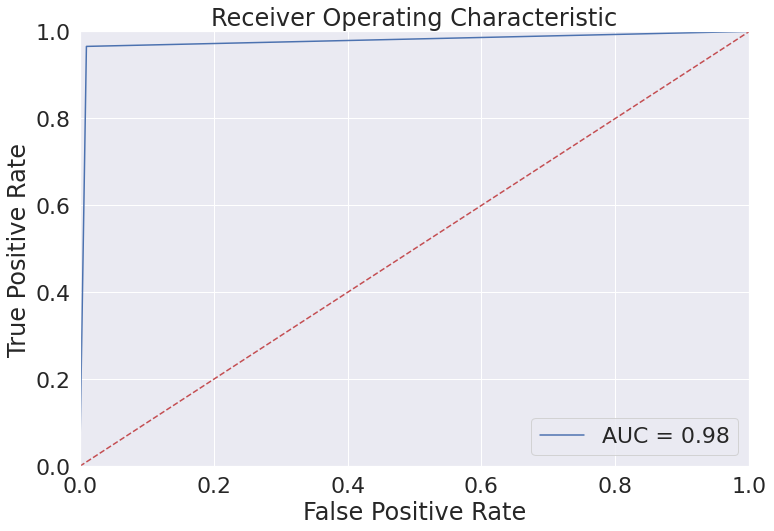

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00273693 0.00861436 0.00930335 ... 0.59518373 0.70133767 1.23395042]
Visualize quantization error


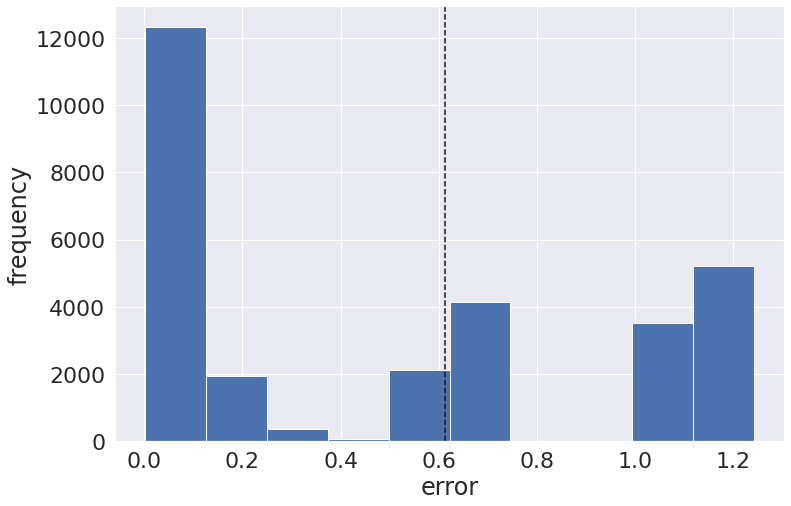

Outliers visualization


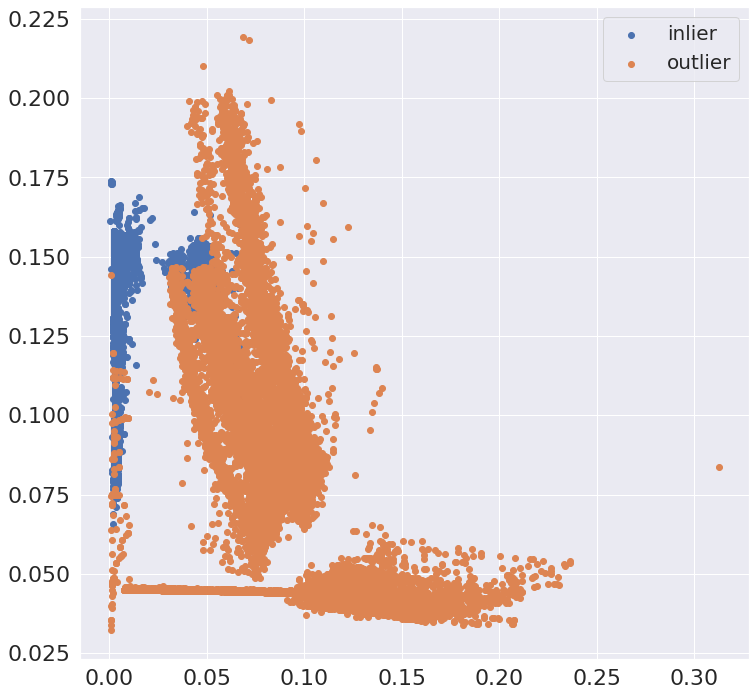

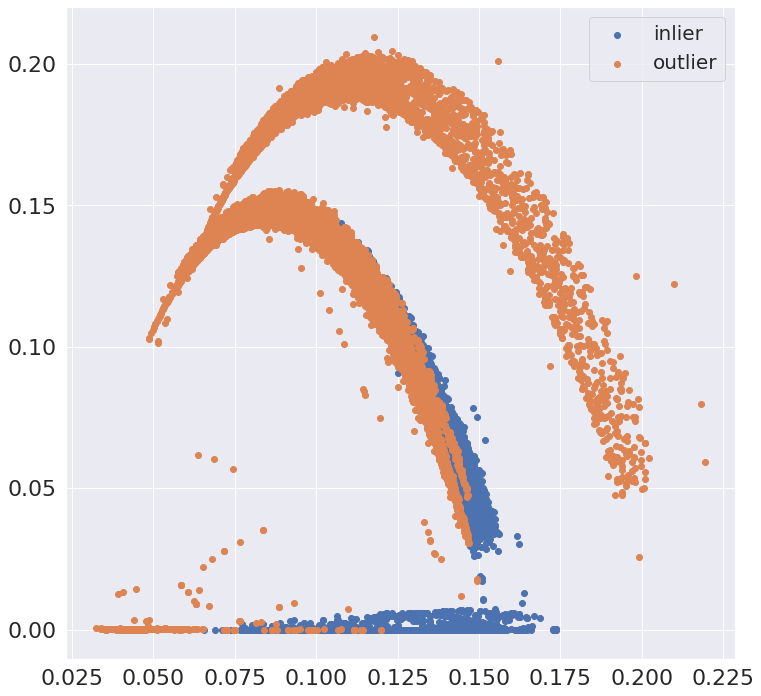

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.990     0.995     14865
           2      0.990     1.000     0.995     14865

    accuracy                          0.995     29730
   macro avg      0.995     0.995     0.995     29730
weighted avg      0.995     0.995     0.995     29730



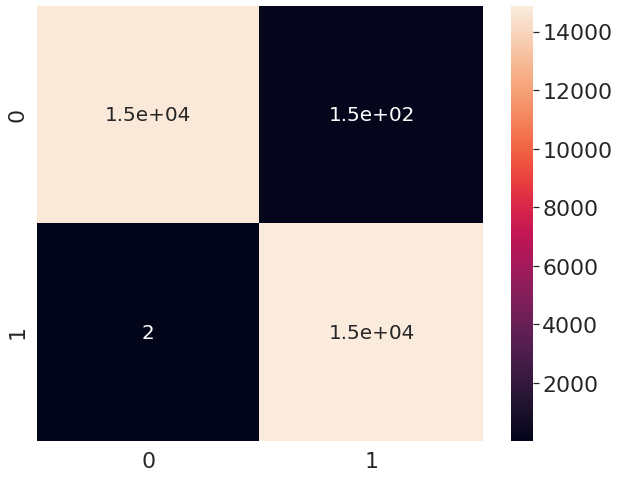

AUC score:  0.994920955264043


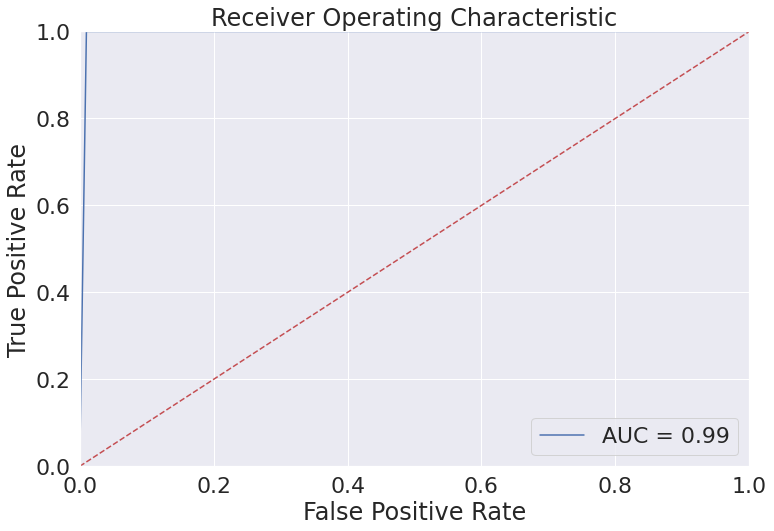

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [80]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00211374 0.00207365 0.00620241 ... 1.02246973 1.02246974 1.02246973]
Visualize quantization error


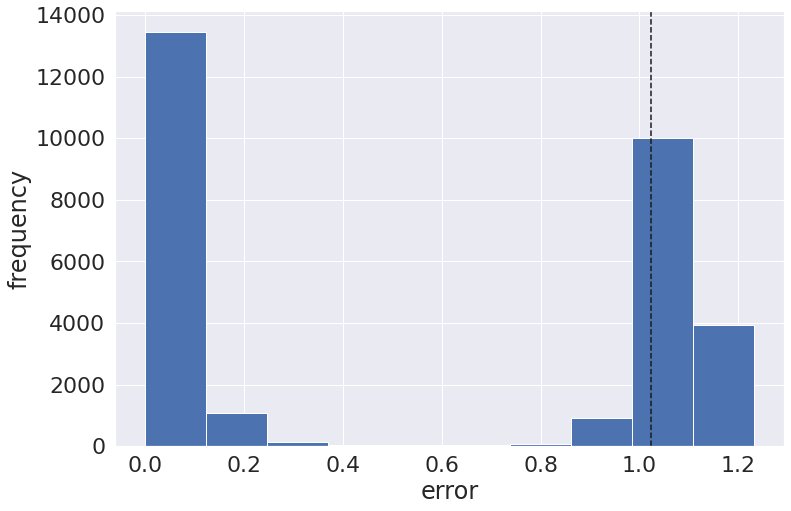

Outliers visualization


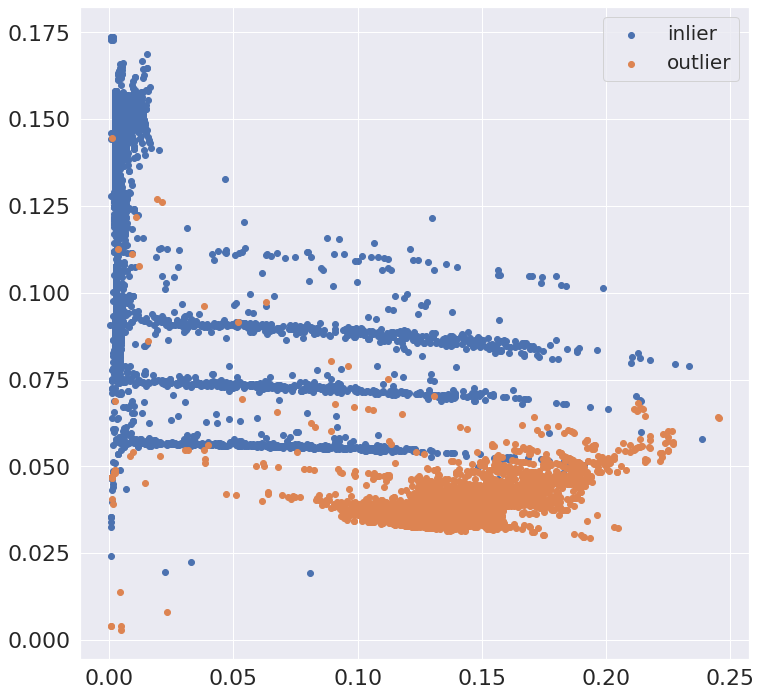

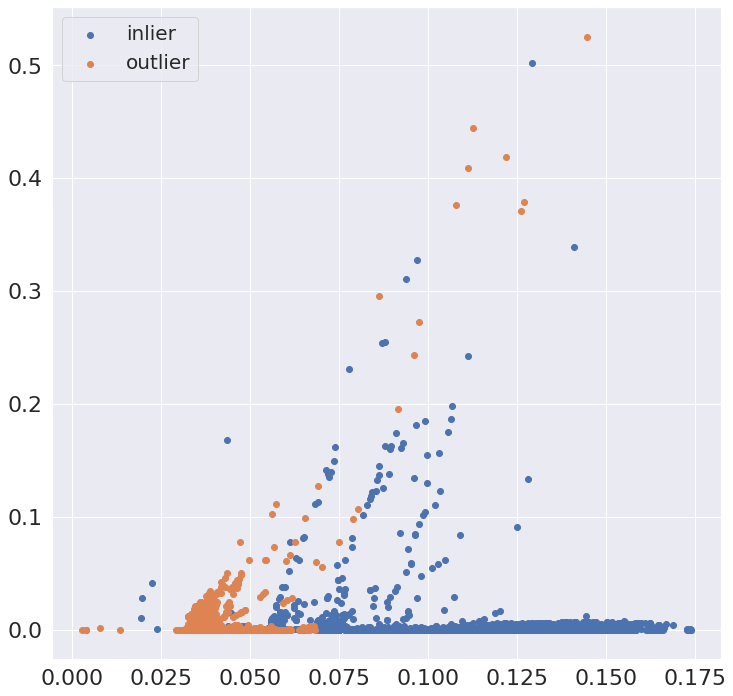

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.993     0.996     0.994     14865
           2      0.996     0.993     0.994     14865

    accuracy                          0.994     29730
   macro avg      0.994     0.994     0.994     29730
weighted avg      0.994     0.994     0.994     29730



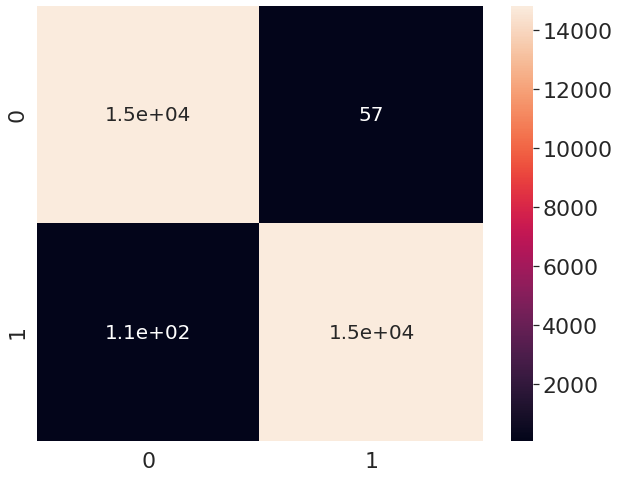

AUC score:  0.9943827783383787


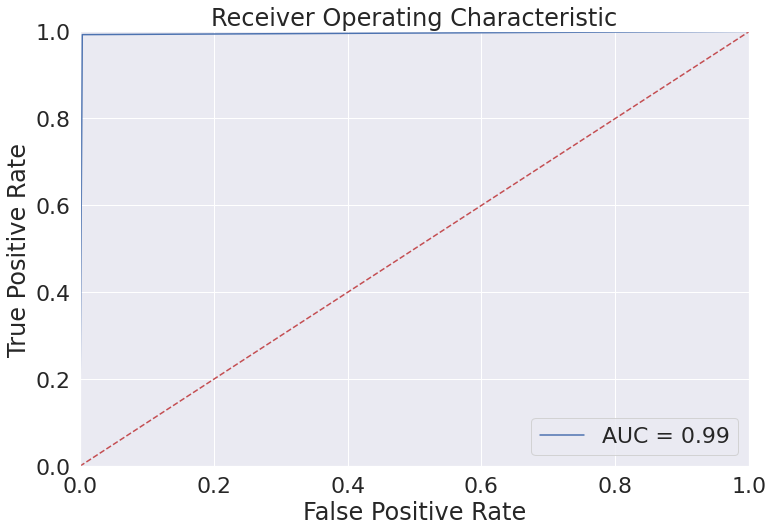

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00211374 0.00207365 0.00620241 ... 0.58795063 0.68808597 1.10501546]
Visualize quantization error


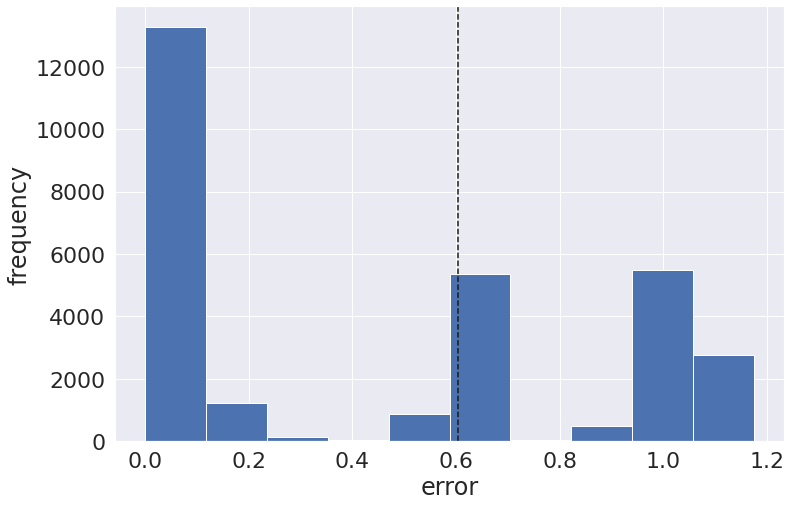

Outliers visualization


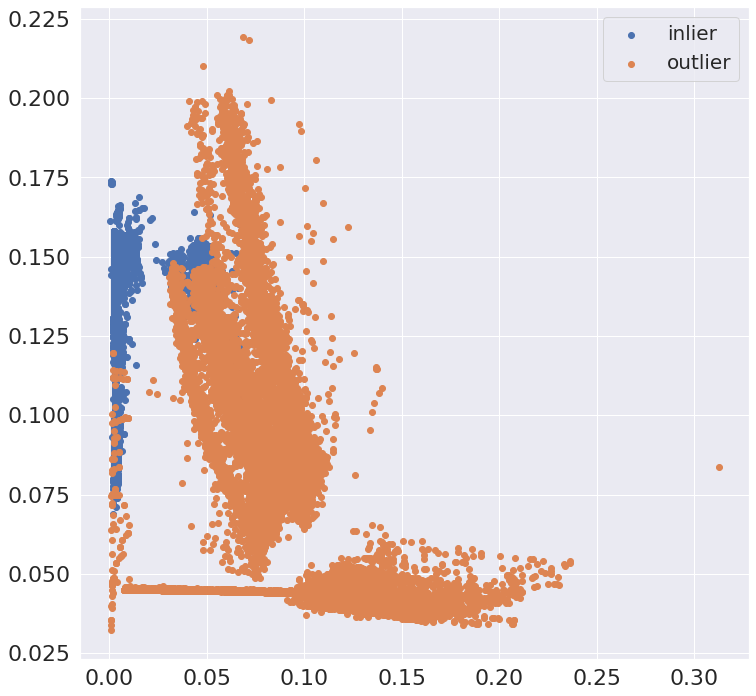

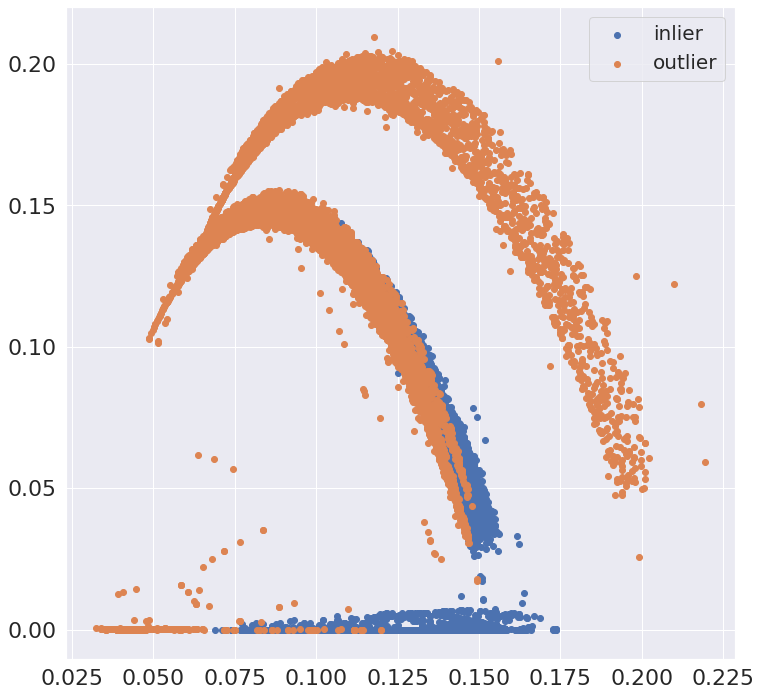

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     14865
           2      0.996     0.999     0.998     14865

    accuracy                          0.998     29730
   macro avg      0.998     0.998     0.998     29730
weighted avg      0.998     0.998     0.998     29730



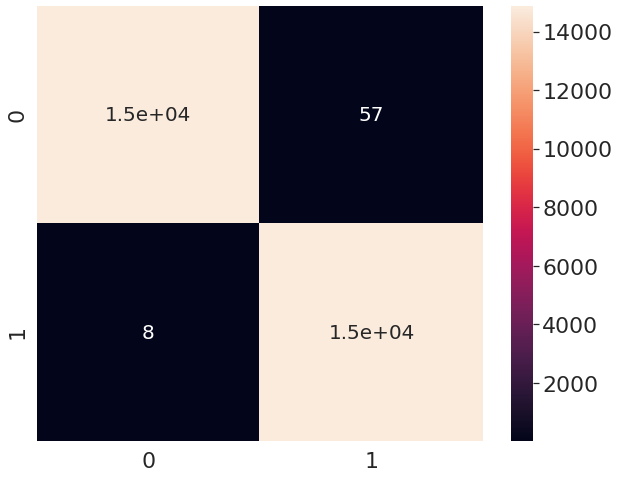

AUC score:  0.9978136562394888


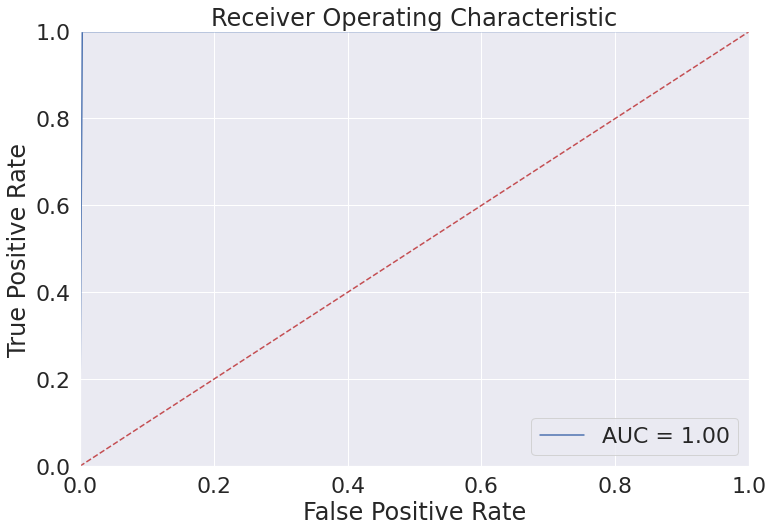

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [83]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.00597898e-03  1.09164688e-01  2.01135797e-09 ...  2.36187403e-16
  -6.55633047e-33 -2.05122539e-17]
 [ 1.49721134e-02  1.85579961e-01  8.53005126e-17 ...  0.00000000e+00
  -1.17695238e-34  0.00000000e+00]
 [ 3.00597902e-03  1.09164689e-01  2.34043672e-09 ...  1.77370306e-16
   4.23429676e-33  1.75450725e-17]
 ...
 [ 6.00986439e-03  1.85579961e-01  0.00000000e+00 ...  2.36187403e-16
  -3.20987013e-32 -1.00110120e-16]
 [ 3.00597921e-03  1.09164694e-01  4.08820673e-09 ...  1.24986330e-16
  -8.58241870e-34  0.00000000e+00]
 [ 3.00597876e-03  1.85579961e-01  0.00000000e+00 ...  0.00000000e+00
   3.00498480e-28  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00379608 0.00756254 0.00472242 ... 1.19574083 1.19574084 1.19574082]
Visualize quantization error


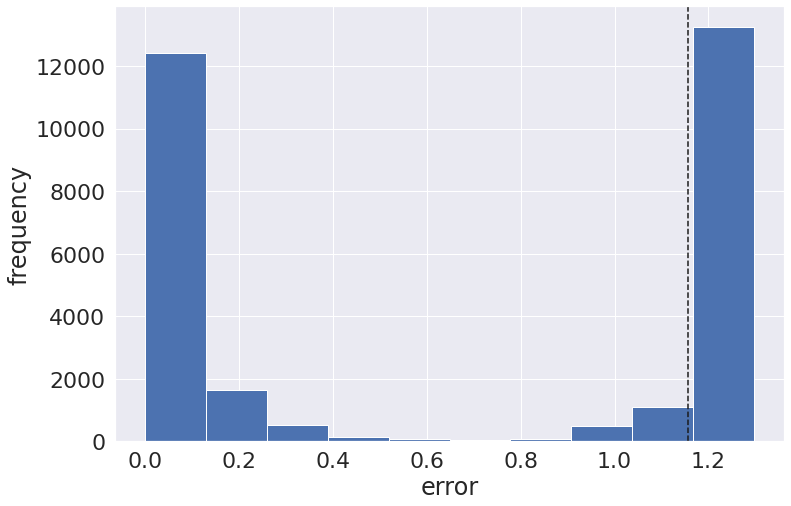

Outliers visualization


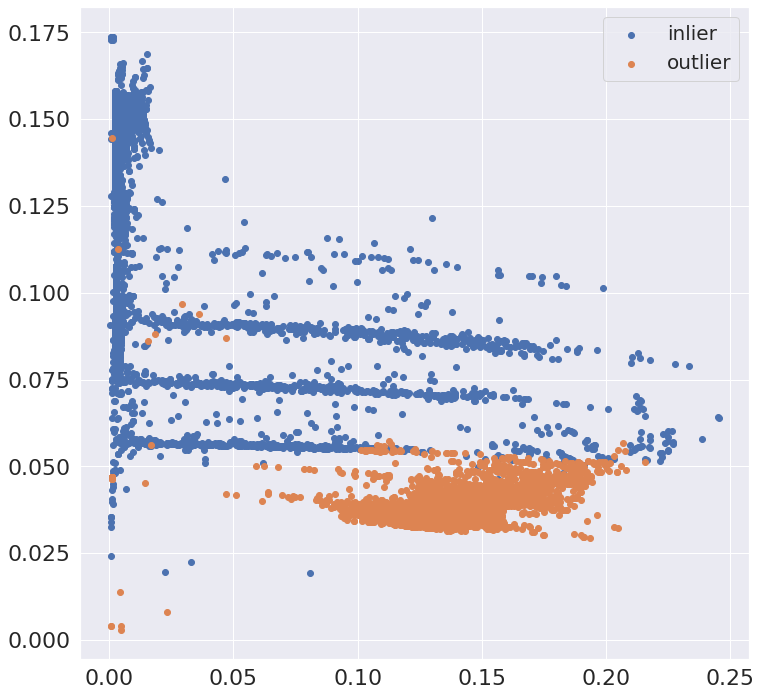

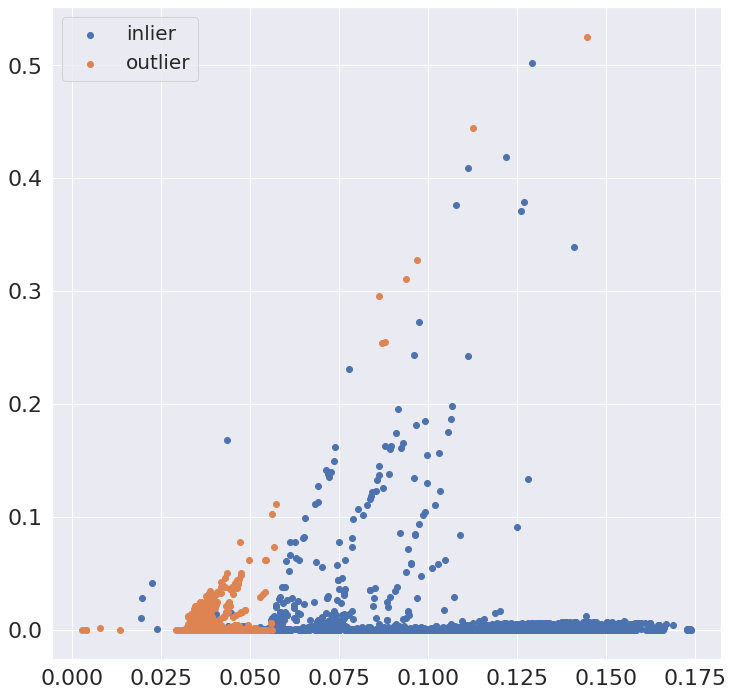

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.813     0.989     0.893     14865
           2      0.986     0.772     0.866     14865

    accuracy                          0.881     29730
   macro avg      0.900     0.881     0.879     29730
weighted avg      0.900     0.881     0.879     29730



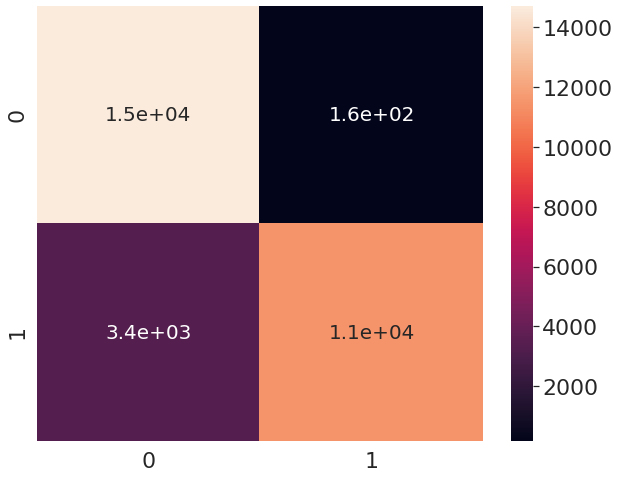

AUC score:  0.8808610830810628


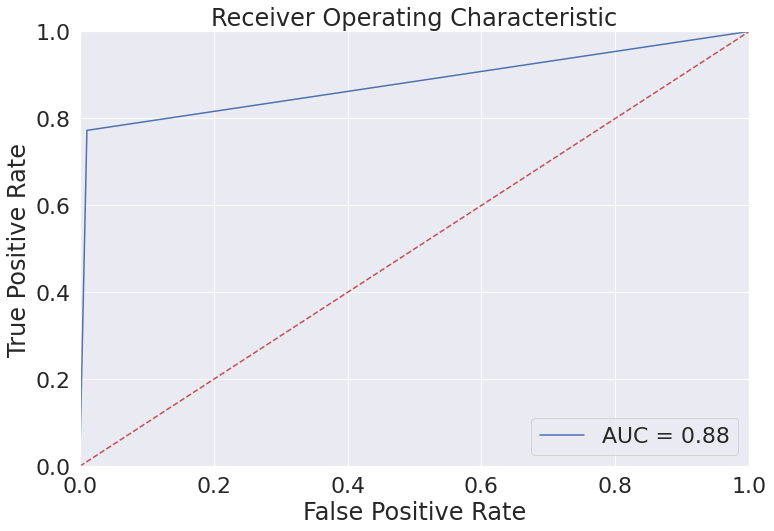

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [84]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (29730, 115) (29730,)
----------------------Test is starting----------------------
Scale data
Shape:  (29730, 115) (29730,)
Shape:  (29730, 115) (29730,)
Normalize data
Shape:  (29730, 115) (29730,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.00379608 0.00756254 0.00472242 ... 0.59483149 0.70232667 1.24667402]
Visualize quantization error


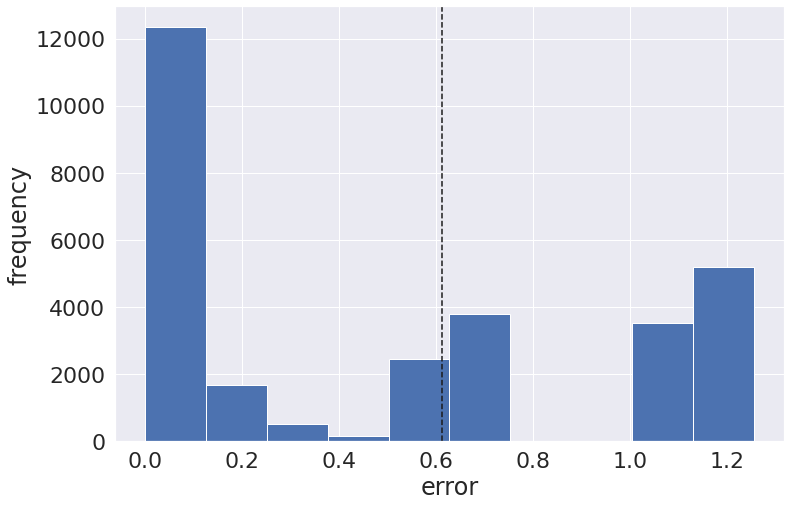

Outliers visualization


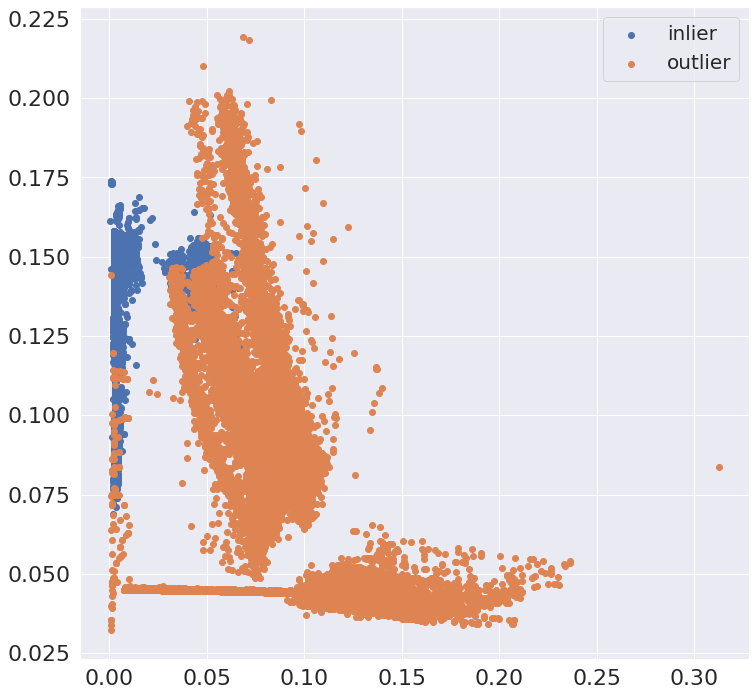

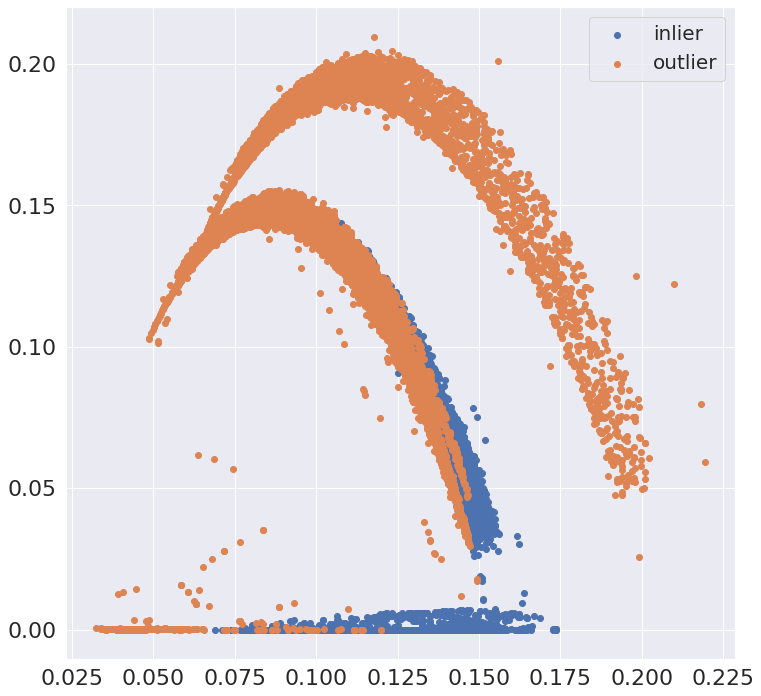

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.989     0.994     14865
           2      0.989     1.000     0.994     14865

    accuracy                          0.994     29730
   macro avg      0.994     0.994     0.994     29730
weighted avg      0.994     0.994     0.994     29730



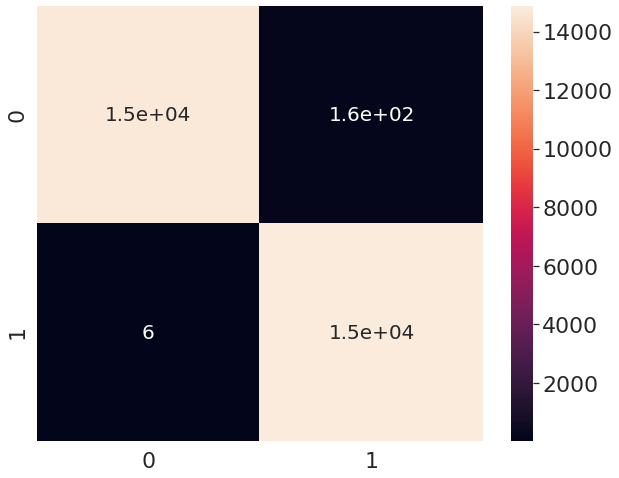

AUC score:  0.9944164143962327


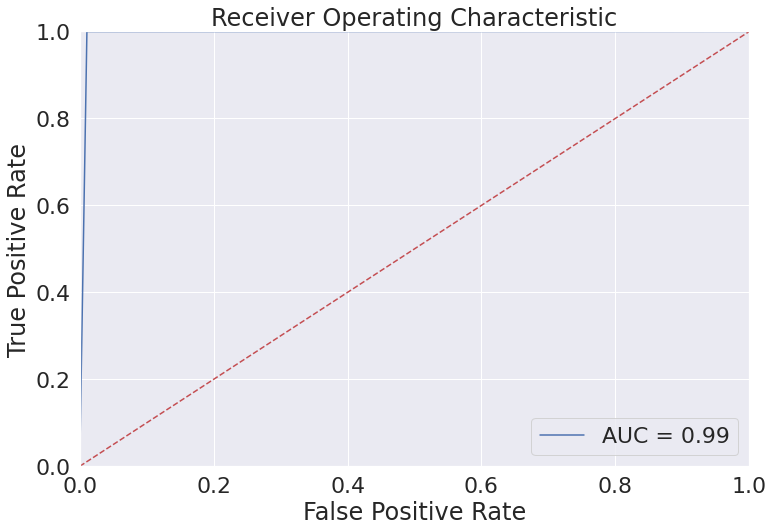

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

